![housepicture](housesbanner.png)

# Predicting Housing Prices
## W207 Fall 2021
## Stephen Chen, Jenny Conde, Andy Tertzakian

# Table of Contents

1. [Project Intro](#ProjectIntro)
2. [Import Packages](#ImportPackages)
3. [Load Data](#LoadData)
4. [Exploratory Data Analysis](#ExploratoryDataAnalysis)
    1. [Correlation Analysis](#CorrelationAnalysis)
    2. [Missing Values](#MissingValues)
    3. [Sample Plots](#SamplePlots)
    4. [SweetViz Report](#SweetVizReport)
    5. [EDA Conclusions](#EDAConclusions)
5. [Feature Selection & Engineering](#FeatureSelectionandEngineering)
    1. [Dependent Variable](#DependentVariable)
    2. [Best Covariates](#BestCovariates)
    3. [Okay Covariates](#OkayCovariates)
    4. [Normalize Quantitative Variables](#NormalizeQuantitativeVariables)
    5. [One Hot Encoding](#OneHotEncoding)
    6. [Additional Feature Engineering](#AdditionalFeatureEngineering)
    7. [Training and Development Sets](#TrainingandDevelopmentSets)
6. [Model Creation & Evaluation](#ModelCreationandEvaluation)
    1. [Linear Regression Models](#LinearRegressionModels)
    2. [Nonlinear Models](#NonlinearModels)
7. [Final Predictions](#NextSteps)
8. [Appendix](#Appendix)
    1. [Additional EDA](#AdditionalEDA)

<a id='ProjectIntro'></a>
## Project Intro

In this project, we predict the prices of homes sold in Ames, Iowa, from January 2006 through July 2010. This data was obtained from the [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview) Kaggle competition. The data contains 80 features about 1,460 houses sold in this time frame. The goal of this project is to utilize feature engineering and regressions to accurately predict the price of a house.

<a id='ImportPackages'></a>
## Import Packages

In [1]:
# IF SWEETVIZ NOT INSTALLED OR RUN FROM THE COMMAND LINE
# ! pip install sweetviz 

# Basics
import pandas as pd
import numpy as np
import random
import sys
import warnings
warnings.simplefilter(action='ignore')

# Plotting & EDA
import matplotlib.pyplot as plt
import seaborn as sns
import dtale
import pandas_profiling
import plotly.graph_objs as go
import sweetviz
import ppscore
from matplotlib.patches import Patch

# Data Transformation
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Model Building and Evaluation
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.datasets import make_regression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV

# Packages for Neural Networks
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Activation
# from tensorflow.keras.optimizers import Adam


%matplotlib inline

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

<a id='LoadData'></a>
## Load Data
Data Loaded from Kaggle.

In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [4]:
print('Training Data Shape:\t', train.shape)
print('Testing Data Shape:\t', test.shape)

Training Data Shape:	 (1460, 81)
Testing Data Shape:	 (1459, 80)


<a id='ExploratoryDataAnalysis'></a>
## Exploratory Data Analysis

We conducted an in-depth exploratory data analysis for this data set and have selected results to include in this report. We first start with a description of our covariates and focus on the dependent variable to get a sense of the distribution of housing prices. Then, we look closer at the missing values in our data set and what they mean. Next, we include a correlation analysis, which helps to inform us which variables might have the best explanatory power when conducting our regression analysis. This can also help us determine which covariates are highly correlated to each other and thus might not be good together to include in linear analyses. Finally, we include some select sample plots and the output from SweetViz, which helps to visualize each individual covariate.

In [5]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

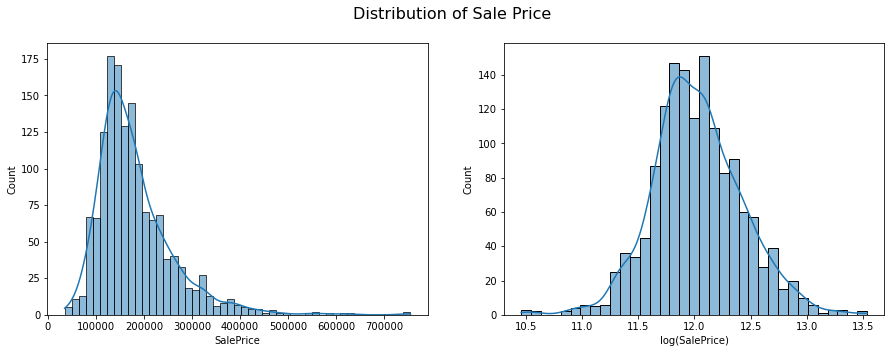

In [6]:
# Plot the dependent variable, SalePrice
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5));
sns.histplot(train['SalePrice'], kde = 'True', ax = axes[0]);
sns.histplot(np.log(train['SalePrice']), kde = 'True', ax = axes[1]);
plt.xlabel('log(SalePrice)')
plt.suptitle('Distribution of Sale Price', size = 16);

`SalePrice` is highly skewed, with a long right tail. We can log this variable to make the distribution approximately normal.

<a id='CorrelationAnalysis'></a>
### Correlation Analysis

We conduct a correlation analysis among our quantitative covariates to understand how they relate to the dependent variable. We can also determine which variables are highly correlated with each other. If two covariates are highly correlated with each other, we may choose to not include one of them in our regressions.

In [7]:
## Check to see if indices will be an issue
if isinstance(train, (pd.DatetimeIndex, pd.MultiIndex)):
    train = df.to_frame(index=False)

## Update columns to strings in case they are numbers
train.columns = [str(c) for c in train.columns]  

## Selected the columns we wish to see correlations for
corr_cols = [
    'SalePrice', 'Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
    'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
    'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
    'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
    'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'
]

## Select said columns, calculate the correlations, and display them
corr_data = train[corr_cols]
corr_data = corr_data.corr(method='pearson')
corr_data.index.name = str('column')
corr_data = corr_data.reset_index()
corr_data

column  SalePrice        Id  MSSubClass  LotFrontage   LotArea  \
0       SalePrice   1.000000 -0.021917   -0.084284     0.351799  0.263843   
1              Id  -0.021917  1.000000    0.011156    -0.010601 -0.033226   
2      MSSubClass  -0.084284  0.011156    1.000000    -0.386347 -0.139781   
3     LotFrontage   0.351799 -0.010601   -0.386347     1.000000  0.426095   
4         LotArea   0.263843 -0.033226   -0.139781     0.426095  1.000000   
5     OverallQual   0.790982 -0.028365    0.032628     0.251646  0.105806   
6     OverallCond  -0.077856  0.012609   -0.059316    -0.059213 -0.005636   
7       YearBuilt   0.522897 -0.012713    0.027850     0.123349  0.014228   
8    YearRemodAdd   0.507101 -0.021998    0.040581     0.088866  0.013788   
9      MasVnrArea   0.477493 -0.050298    0.022936     0.193458  0.104160   
10     BsmtFinSF1   0.386420 -0.005024   -0.069836     0.233633  0.214103   
11     BsmtFinSF2  -0.011378 -0.005968   -0.065649     0.049900  0.111170   
12      BsmtUnfSF   0.214479 -0.007940   -0.140759     0.132644 -0.002618   
13    TotalBsmtSF   0.613581 -0.015415   -0.238518     0.392075  0.260833   
14       1stFlrSF   0.605852  0.010496   -0.251758     0.457181  0.299475   
15       2ndFlrSF   0.319334  0.005590    0.307886     0.080177  0.050986   
16   LowQualFinSF  -0.025606 -0.044230    0.046474     0.038469  0.004779   
17      GrLivArea   0.708624  0.008273    0.074853     0.402797  0.263116   
18   BsmtFullBath   0.227122  0.002289    0.003491     0.100949  0.158155   
19   BsmtHalfBath  -0.016844 -0.020155   -0.002333    -0.007234  0.048046   
20       FullBath   0.560664  0.005587    0.131608     0.198769  0.126031   
21       HalfBath   0.284108  0.006784    0.177354     0.053532  0.014259   
22   BedroomAbvGr   0.168213  0.037719   -0.023438     0.263170  0.119690   
23   KitchenAbvGr  -0.135907  0.002951    0.281721    -0.006069 -0.017784   
24   TotRmsAbvGrd   0.533723  0.027239    0.040380     0.352096  0.190015   
25     Fireplaces   0.466929 -0.019772   -0.045569     0.266639  0.271364   
26    GarageYrBlt   0.486362  0.000072    0.085072     0.070250 -0.024947   
27     GarageCars   0.640409  0.016570   -0.040110     0.285691  0.154871   
28     GarageArea   0.623431  0.017634   -0.098672     0.344997  0.180403   
29     WoodDeckSF   0.324413 -0.029643   -0.012579     0.088521  0.171698   
30    OpenPorchSF   0.315856 -0.000477   -0.006100     0.151972  0.084774   
31  EnclosedPorch  -0.128578  0.002889   -0.012037     0.010700 -0.018340   
32      3SsnPorch   0.044584 -0.046635   -0.043825     0.070029  0.020423   
33    ScreenPorch   0.111447  0.001330   -0.026030     0.041383  0.043160   
34       PoolArea   0.092404  0.057044    0.008283     0.206167  0.077672   
35        MiscVal  -0.021190 -0.006242   -0.007683     0.003368  0.038068   
36         MoSold   0.046432  0.021172   -0.013585     0.011200  0.001205   
37         YrSold  -0.028923  0.000712   -0.021407     0.007450 -0.014261   

    OverallQual  OverallCond  YearBuilt  YearRemodAdd  ...  GarageArea  \
0      0.790982    -0.077856   0.522897      0.507101  ...    0.623431   
1     -0.028365     0.012609  -0.012713     -0.021998  ...    0.017634   
2      0.032628    -0.059316   0.027850      0.040581  ...   -0.098672   
3      0.251646    -0.059213   0.123349      0.088866  ...    0.344997   
4      0.105806    -0.005636   0.014228      0.013788  ...    0.180403   
5      1.000000    -0.091932   0.572323      0.550684  ...    0.562022   
6     -0.091932     1.000000  -0.375983      0.073741  ...   -0.151521   
7      0.572323    -0.375983   1.000000      0.592855  ...    0.478954   
8      0.550684     0.073741   0.592855      1.000000  ...    0.371600   
9      0.411876    -0.128101   0.315707      0.179618  ...    0.373066   
10     0.239666    -0.046231   0.249503      0.128451  ...    0.296970   
11    -0.059119     0.040229  -0.049107     -0.067759  ...   -0.018227   
12     0.308159    -0.136841   0.149040      

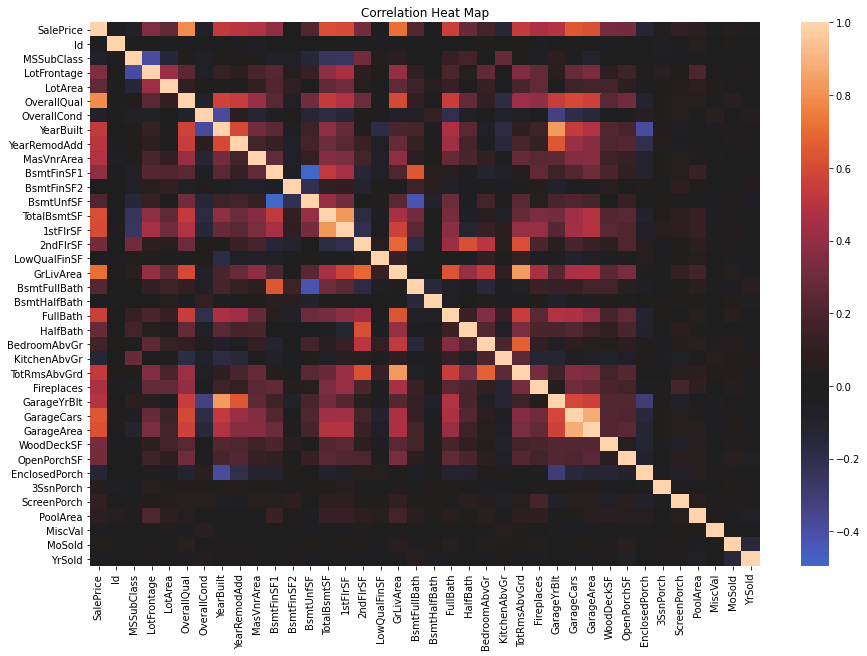

In [8]:
plt.subplots(figsize=(15,10))
sns.heatmap(train[corr_cols].corr(), annot = False, center = 0);
plt.title('Correlation Heat Map');

Variables that are highly correlated with `SalePrice` include `OverallQual`, `TotalBsmtSF`, `1stFlrSF`, `GrLivArea`, `GarageCars`, and `GarageArea`. However, `GarageCars` and `GarageArea` are highly correlated, so we should be cautious to include both in our analysis.

Based on this analysis, we can additionally define both qualitative and quantitative variables.

In [9]:
quantitative_vars = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
                     'TotalBsmtSF', 'SalePrice', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 
                     'FullBath', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'MasVnrArea', 'HalfBath', 
                     'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'WoodDeckSF', 'OpenPorchSF', 
                     'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'BedroomAbvGr', 'KitchenAbvGr', 
                     'Fireplaces', 'GarageCars', 'MiscVal', 'BsmtFullBath', 'BsmtHalfBath']
qualitative_vars = list(train.drop(columns = quantitative_vars).columns)

<a id='MissingValues'></a>
### Missing Values

We analyze the missing values in our data set. We use the documentation for the data to determine which values are actually missing versus which NA values have a different meaning.

In [10]:
na_counts = train.isna().sum()
print("GET NUMBER OF NAs PER COLUMN")
for col in range(train.shape[1]):
    col_name = train.columns[col]
    if na_counts[col] != 0:
        if len(col_name) <= 7:
            print(train.columns[col] + '\t\t\t' + str(na_counts[col]))
        else:
            print(train.columns[col] + '\t\t' + str(na_counts[col]))

GET NUMBER OF NAs PER COLUMN
LotFrontage		259
Alley			1369
MasVnrType		8
MasVnrArea		8
BsmtQual		37
BsmtCond		37
BsmtExposure		38
BsmtFinType1		37
BsmtFinType2		38
Electrical		1
FireplaceQu		690
GarageType		81
GarageYrBlt		81
GarageFinish		81
GarageQual		81
GarageCond		81
PoolQC			1453
Fence			1179
MiscFeature		1406


There are a number of columns that appear to have missing data. However, upon further inspection, many of these missing values actually have meaning. We analyzed each of these variables in conjunction with their documentation and came up with the following analysis:

- LotFrontage: NaNs correspond to 0 values
- Alley: NaNs correspond to no alley access
- MasVnrType: NaNs correspond to no masonry veneer
- MasVnrArea: NaNs correspond to no masonry veneer
- BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1: NaNs correspond to no basement
- BsmtFinType2: NaNs correspond to no basement or only one type of finish
- Electrical: house at index 1379 is NaN, does not have meaning
- FireplaceQu: NaNs correspond to no fireplace
- GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond: NaNs correspond to no garage
- PoolQC: NaNs correspond to no pool
- Fence: NaNs correspond to no fence
- MiscFeature: NaNs correspond to no miscellaneous features (i.e. elevator, second garage, shed, tennis court, other)

We can replace the "NaN" values in our data set with the appropriate values.

In [11]:
# Fill the training data with 0's for missing quantitative values and "None" for missing qualitative values
train[quantitative_vars] = train[quantitative_vars].fillna(0)
train[qualitative_vars] = train[qualitative_vars].fillna('None')

# Remove SalePrice from the list of quantitative vars so we can also transform the testing set
# Removing SalePrice now will also ensure that we do not fit a model with SalePrice as an explanatory variable
quantitative_vars.remove('SalePrice')
# Fill the testing data with 0's or "None"
test[quantitative_vars] = test[quantitative_vars].fillna(0)
test[qualitative_vars] = test[qualitative_vars].fillna('None')

# We also don't want to include ID in the regression, so we'll remove that variable too
qualitative_vars.remove('Id')

<a id='SamplePlots'></a>
### Sample Plots

Although we did a much more extended EDA of this data set, we have included a few sample plots below as examples of how we analyzed the data. Below, both `1stFlrSF` and `OverallQual` were determined to have a high correlation with `SalePrice`. Perhaps surprisingly, `YrSold` was not found to be highly correlated with `SalePrice`, and we wanted to better understand how this variable was distributed with the dependent variable as well.

In [12]:
## Create a Scatter Plot for the size of the first floor and sales price
chart_data = pd.concat([
    train['1stFlrSF'],
    train['SalePrice'],
], axis=1)
chart_data = chart_data.sort_values(['1stFlrSF'])
chart_data = chart_data.rename(columns={'1stFlrSF': 'x'})
chart_data_median = chart_data.groupby(['x'])[['SalePrice']].median()
chart_data_median.columns = ['SalePrice|median']
chart_data = chart_data_median.reset_index()
chart_data = chart_data.dropna()

chart = go.Scattergl(
    x=chart_data['x'], y=chart_data['SalePrice|median'], mode='markers', opacity=0.7, name='all',
    marker={'size': 15, 'line': {'width': 0.5, 'color': 'white'}}
)

figure = go.Figure(data=[chart], layout=go.Layout({
    'legend': {'orientation': 'h'},
    'title': {'text': 'Median of SalePrice by 1stFlrSF'},
    'xaxis': {'tickformat': '0:g', 'title': {'text': '1stFlrSF'}},
    'yaxis': {'title': {'text': 'Median of SalePrice'}, 'type': 'linear'}
}))

figure.show()

In [13]:
## Create a Scatter Plot for the size of the overall quality and sales price
chart_data = pd.concat([
    train['OverallQual'],
    train['SalePrice'],
], axis=1)
chart_data = chart_data.sort_values(['OverallQual'])
chart_data = chart_data.rename(columns={'OverallQual': 'x'})
chart_data_median = chart_data.groupby(['x'])[['SalePrice']].median()
chart_data_median.columns = ['SalePrice|median']
chart_data = chart_data_median.reset_index()
chart_data = chart_data.dropna()

chart = go.Scattergl(
    x=chart_data['x'], y=chart_data['SalePrice|median'], mode='markers', opacity=0.7, name='all',
    marker={'size': 15, 'line': {'width': 0.5, 'color': 'white'}}
)

figure = go.Figure(data=[chart], layout=go.Layout({
    'legend': {'orientation': 'h'},
    'title': {'text': 'Median of SalePrice by OverallQual'},
    'xaxis': {'tickformat': '0:g', 'title': {'text': 'OverallQual'}},
    'yaxis': {'title': {'text': 'Median of SalePrice'}, 'type': 'linear'}
}))

figure.show()

In [14]:
chart_data = pd.concat([
    train['YrSold'],
    train['SalePrice'],
], axis=1)
chart_data = chart_data.sort_values(['YrSold'])
chart_data = chart_data.rename(columns={'YrSold': 'x'})
chart_data_mean = chart_data.groupby(['x'])[['SalePrice']].mean()
chart_data_mean.columns = ['SalePrice|mean']
chart_data = chart_data_mean.reset_index()
chart_data = chart_data.dropna()
chart_data = chart_data[chart_data['SalePrice|mean'] > 0]  # can't represent negatives in a funnel

chart = go.Funnel(x=chart_data['SalePrice|mean'], y=chart_data['x'])

figure = go.Figure(data=[chart], layout=go.Layout({
    'legend': {'orientation': 'h'}, 'title': {'text': 'Mean of SalePrice by YrSold'}
}))
figure.show()

Additionally, to analyze the qualitative variables and understand how housing prices varied according to the values of these qualitative variables, we created many boxplots. Again, we have included a subset below. To view all the plots we created, please reference the [Additional EDA](#AdditionalEDA) section of our [Appendix](#Appendix)

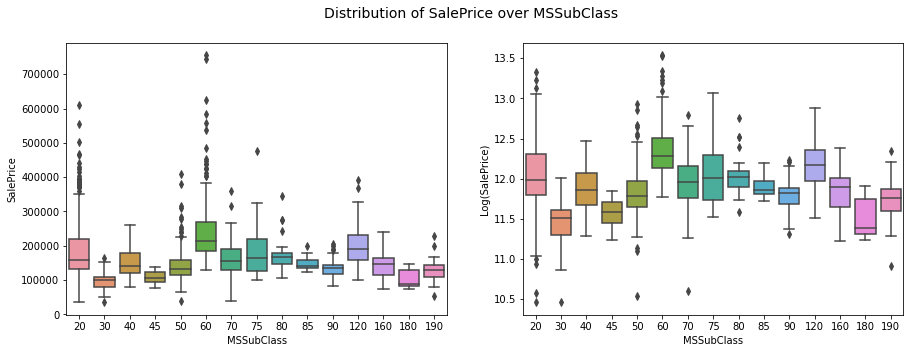

In [15]:
# Plot boxplots of SalePrice according to MSSubClass
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["MSSubClass"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["MSSubClass"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over MSSubClass', size = 14);

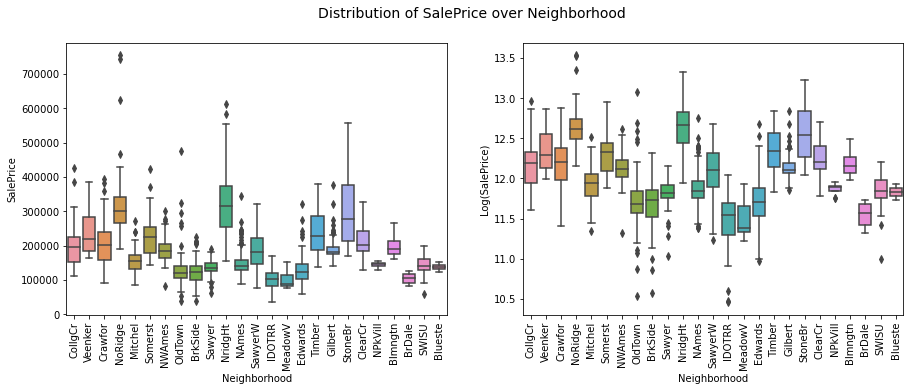

In [16]:
# Plot boxplots of SalePrice according to Neighborhood
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["Neighborhood"], y=train["SalePrice"], ax = axes[0]);
axes[0].tick_params(axis = 'x', rotation = 90)
sns.boxplot(x=train["Neighborhood"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].tick_params(axis = 'x', rotation = 90)
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over Neighborhood', size = 14);

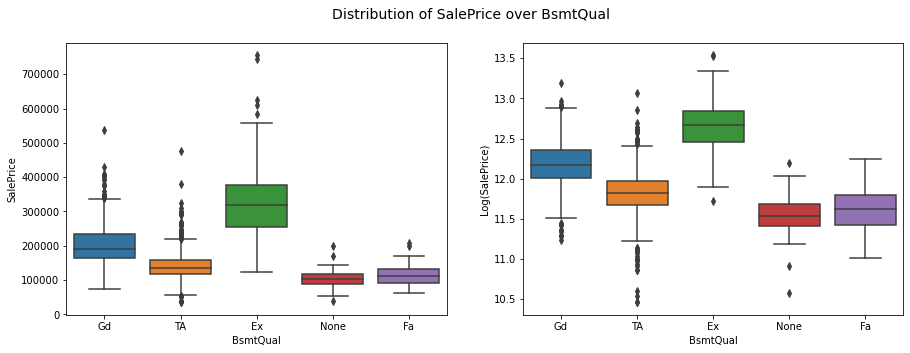

In [17]:
# Plot boxplots of SalePrice according to BsmtQual
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["BsmtQual"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["BsmtQual"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over BsmtQual', size = 14);

We analyzed the quantitative variables too, including `GrLivArea` shown below. It appears that `GrLivArea` has several outliers, which stand out less when `GrLivArea` is logged. Therefore, we will log this variable in our analysis.

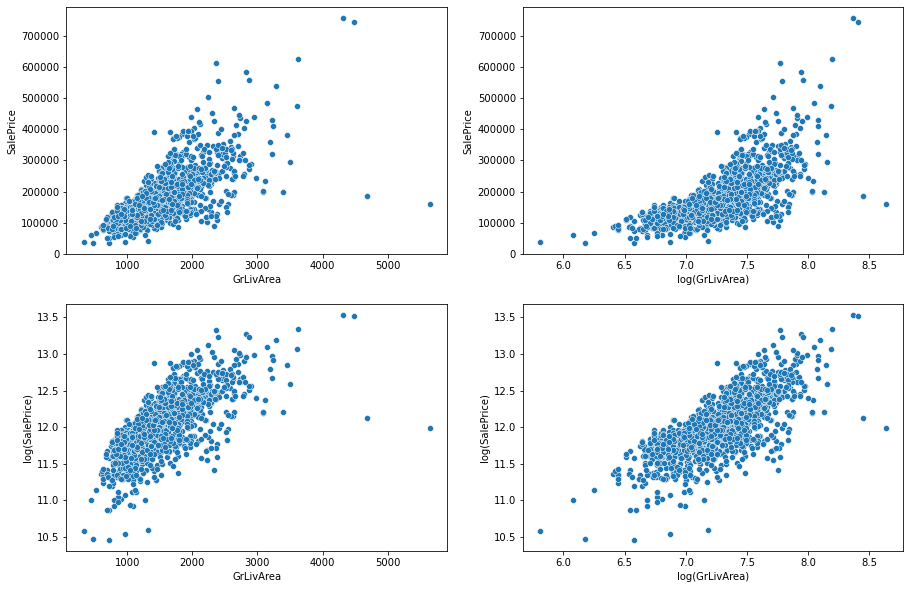

In [18]:
# Plot scatterplots of SalePrice vs GrLivArea
fig, axes = plt.subplots(2, 2, figsize = (15, 10));
sns.scatterplot(x = train['GrLivArea'], y = train['SalePrice'], ax = axes[0][0]);
sns.scatterplot(x = np.log(train['GrLivArea']), y = train['SalePrice'], ax = axes[0][1]);
axes[0][1].set_xlabel('log(GrLivArea)');
sns.scatterplot(x = train['GrLivArea'], y = np.log(train['SalePrice']), ax = axes[1][0]);
axes[1][0].set_ylabel('log(SalePrice)');
sns.scatterplot(x = np.log(train['GrLivArea']), y = np.log(train['SalePrice']), ax = axes[1][1]);
plt.xlabel('log(GrLivArea)');
plt.ylabel('log(SalePrice)');

<a id='SweetVizReport'></a>
### SweetViz Report

In this convenient Python package, we easily plotted an analysis of each covariate in the data set.

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:08 -> (00:00 left)



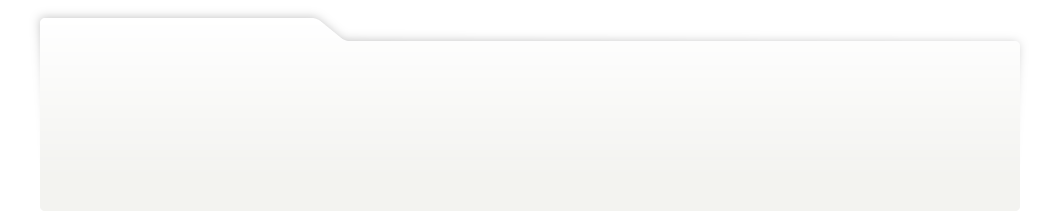
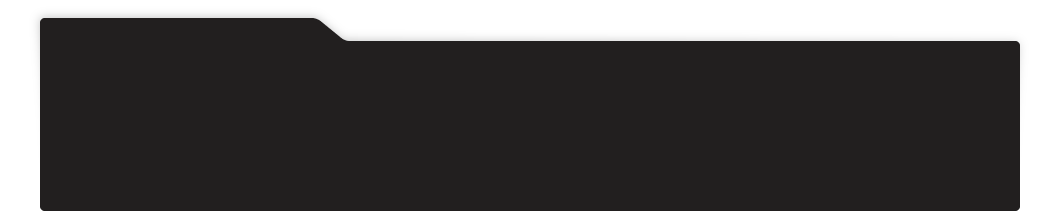
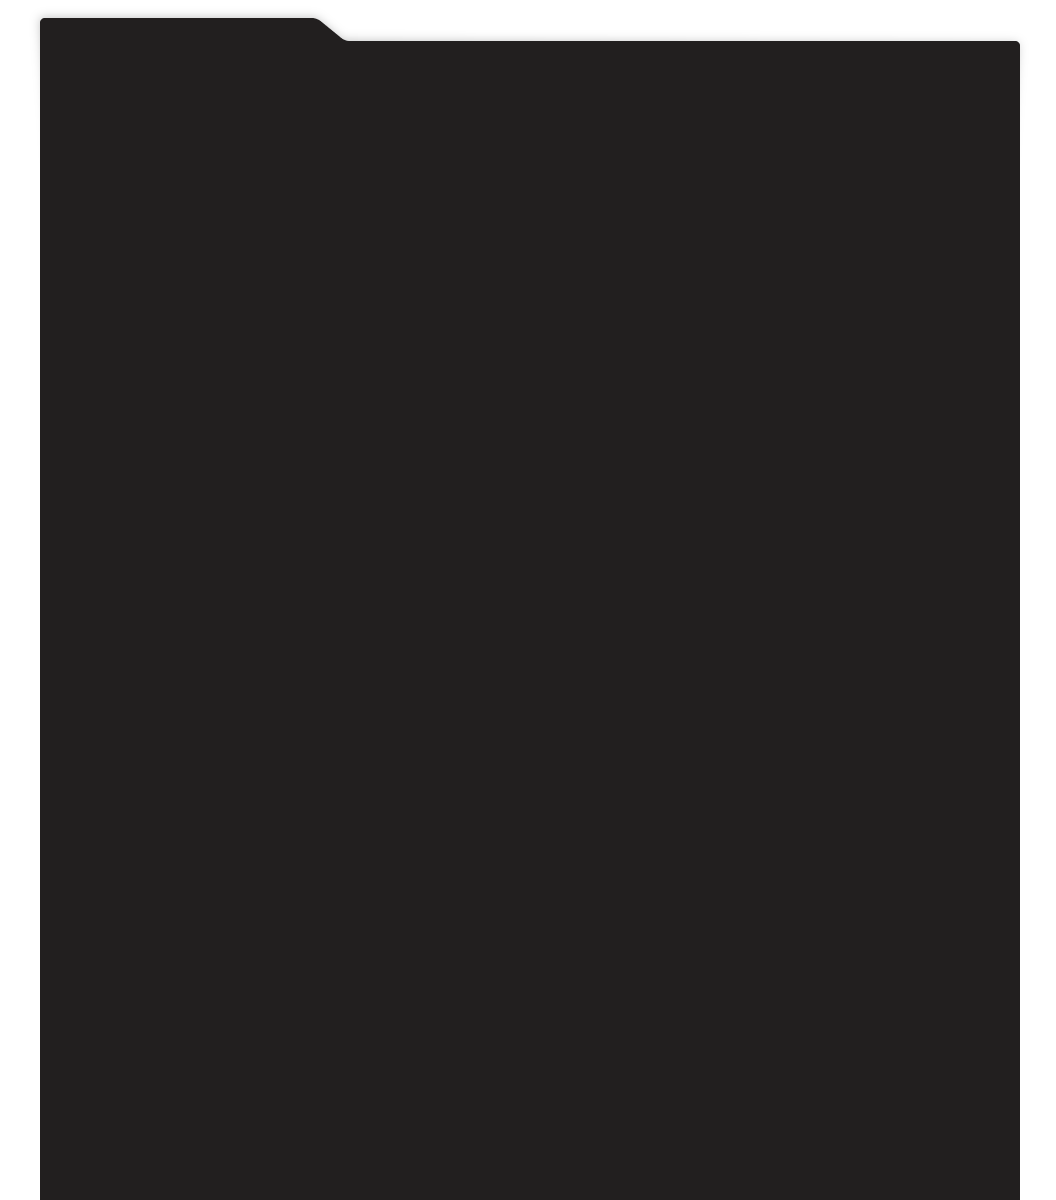
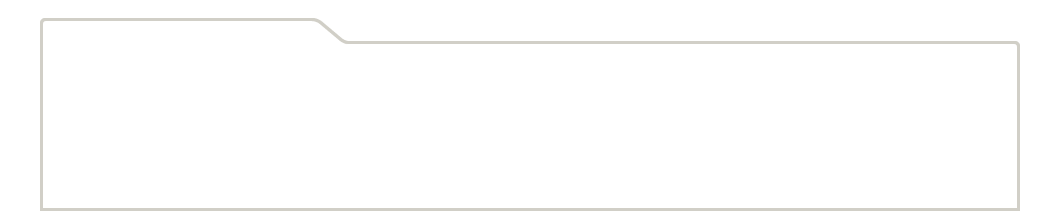
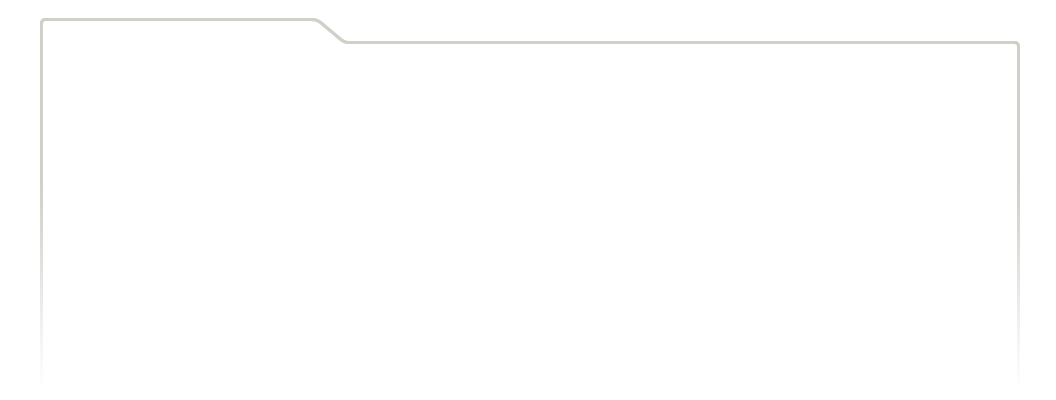
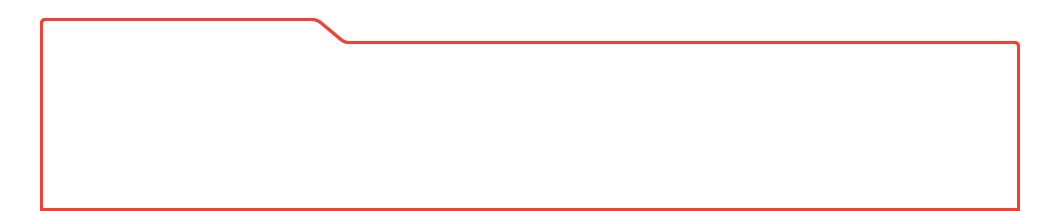
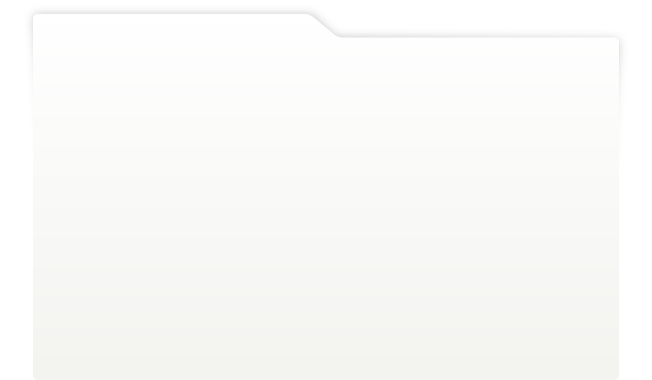
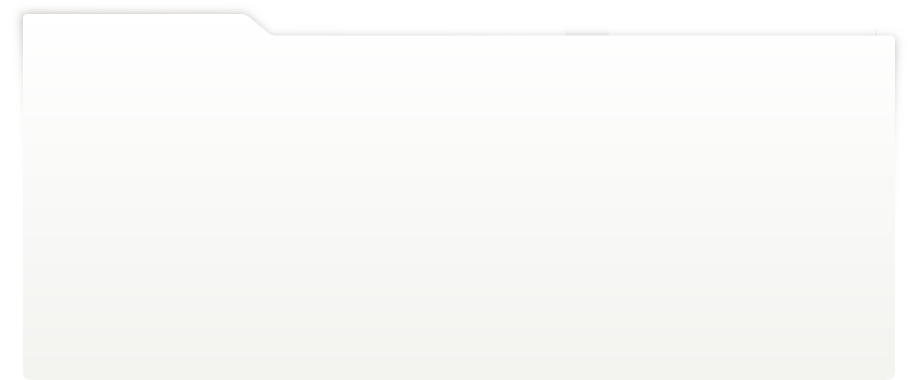
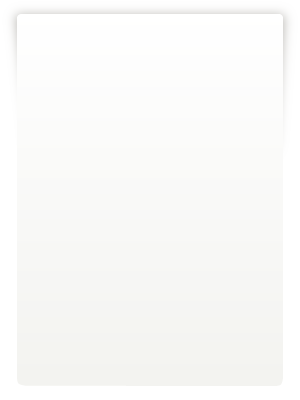
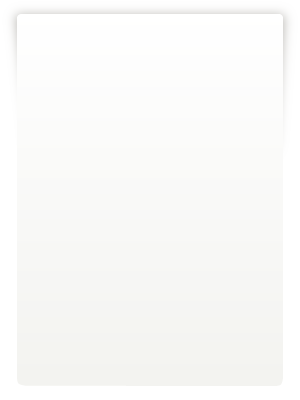
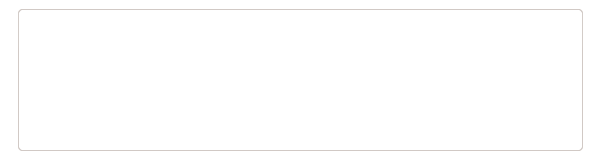
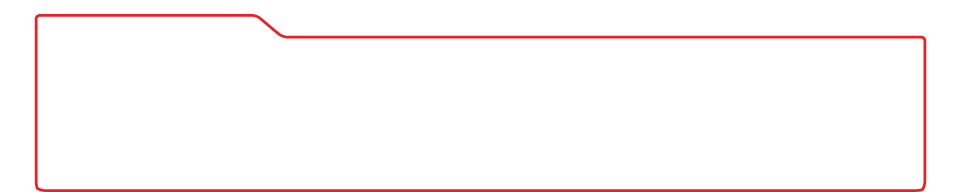
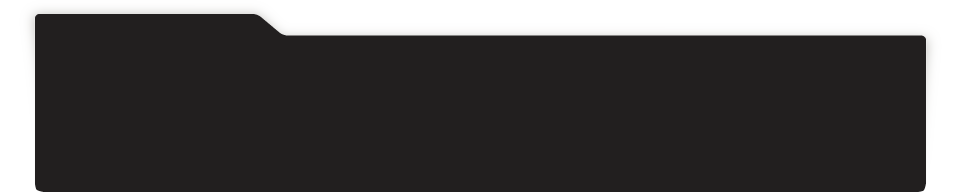
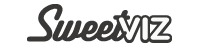
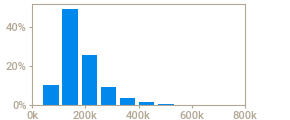
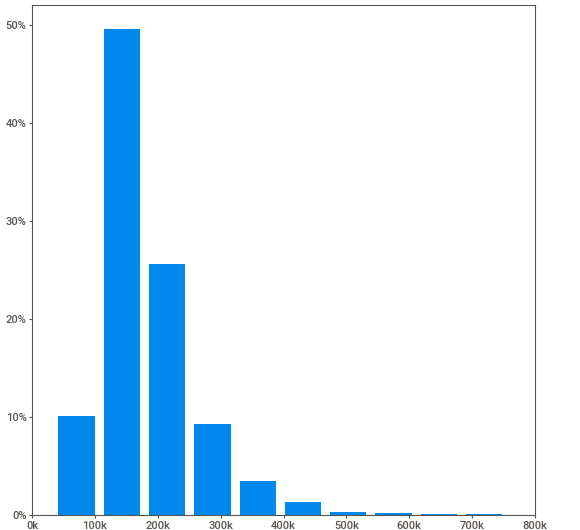
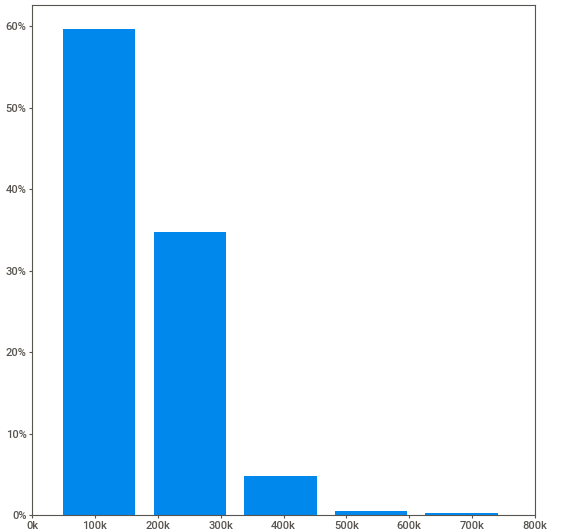
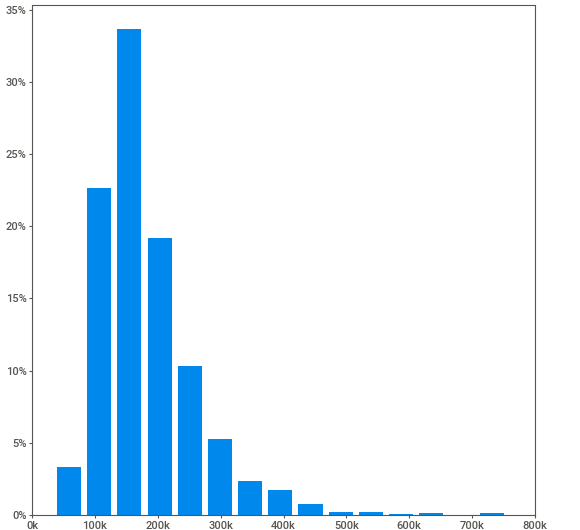
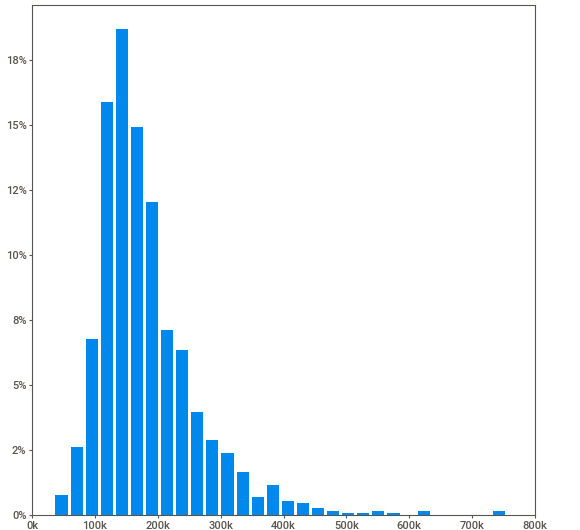
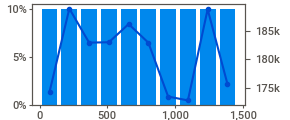
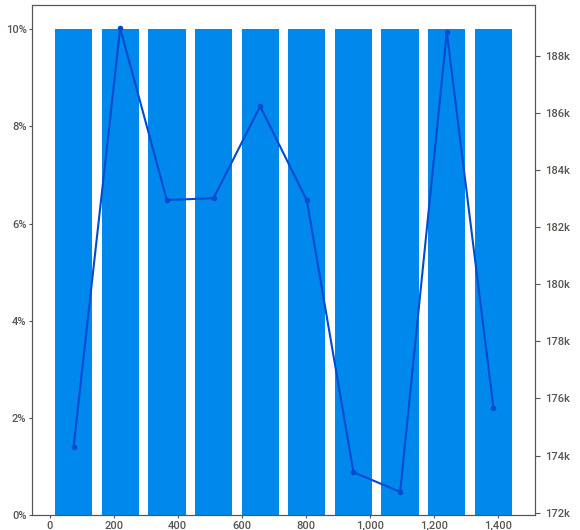
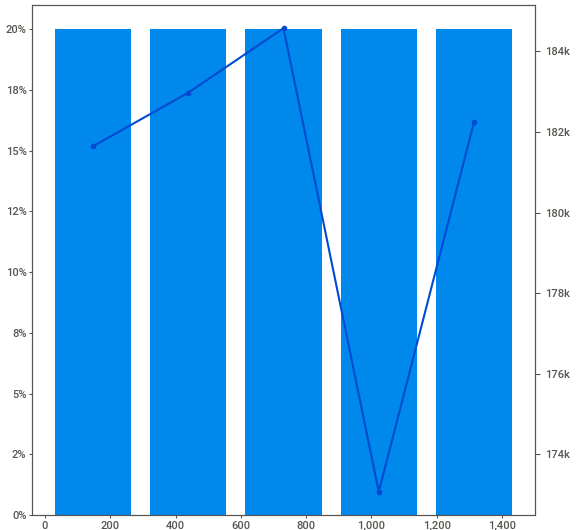
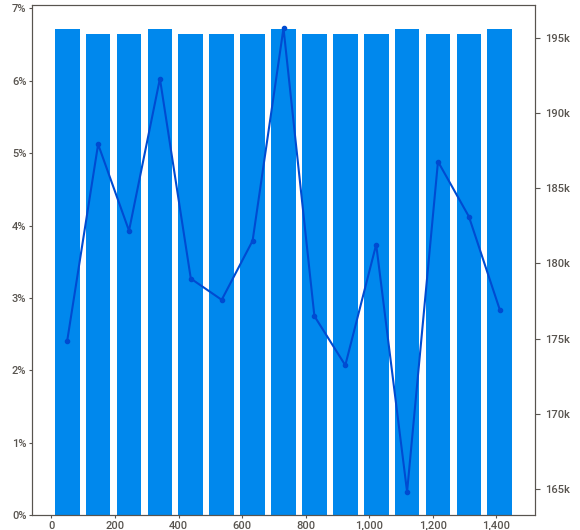
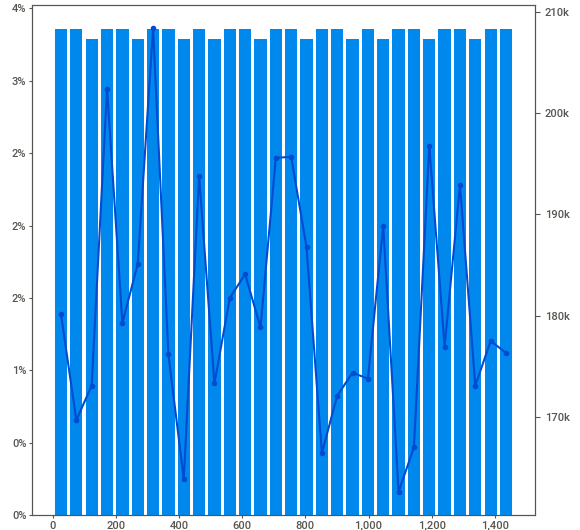
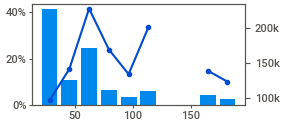
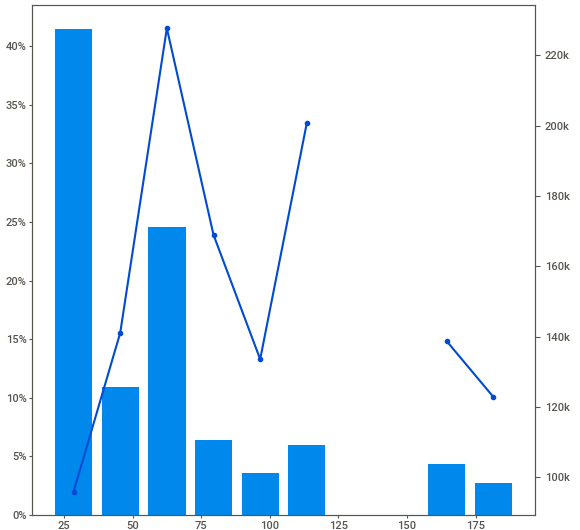
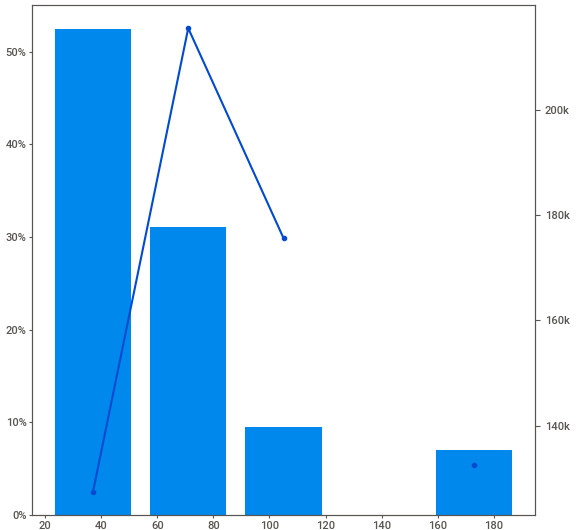
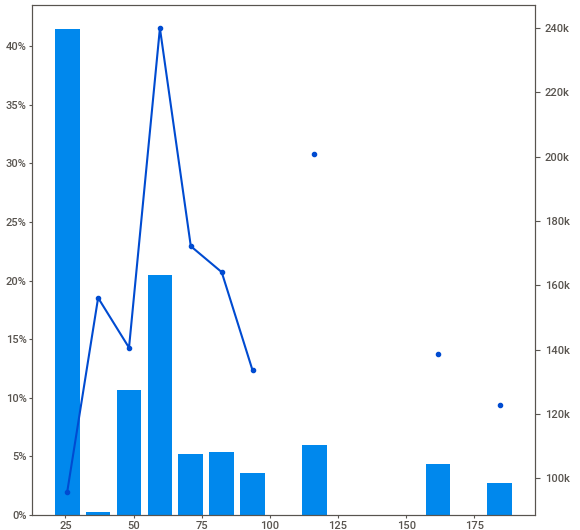
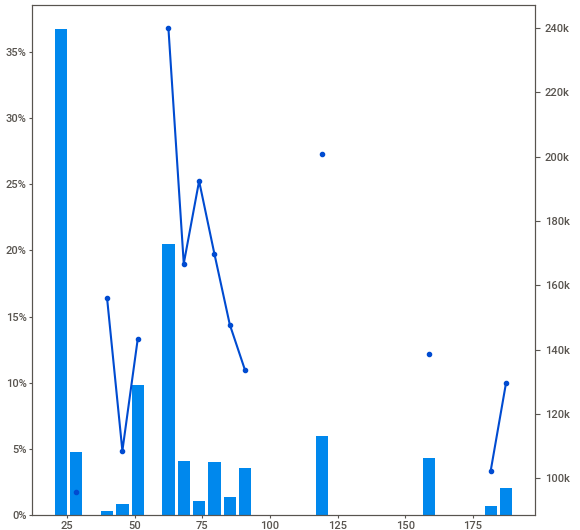
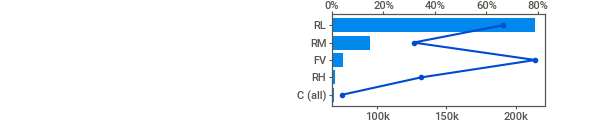
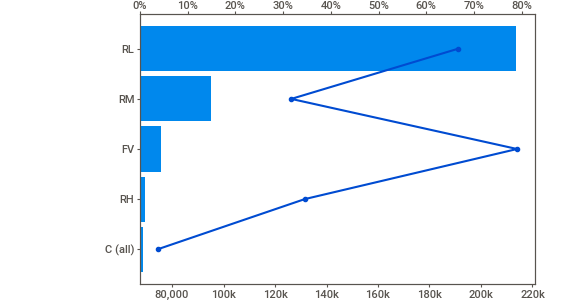
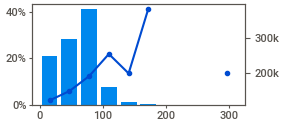
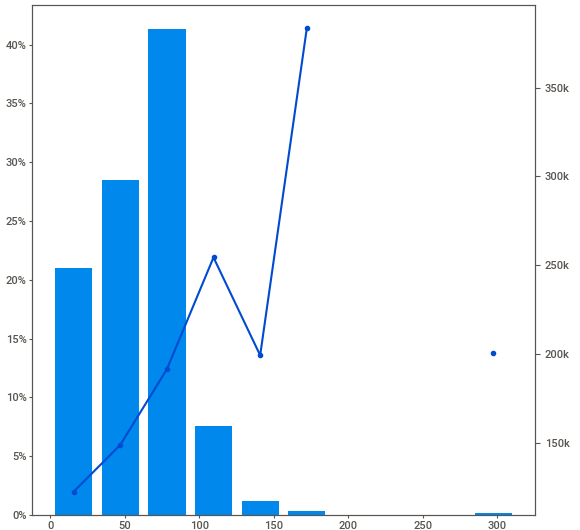
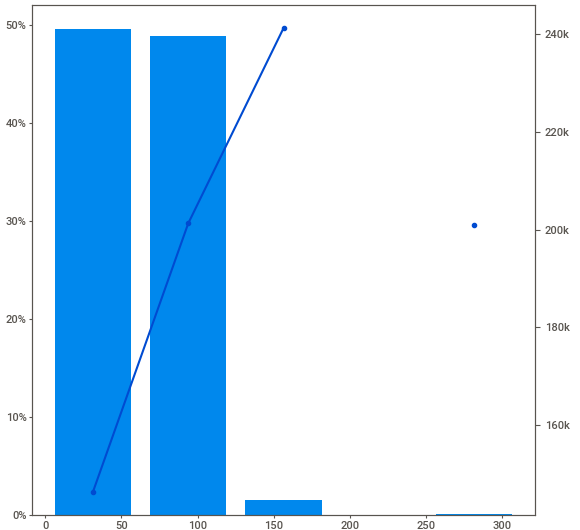
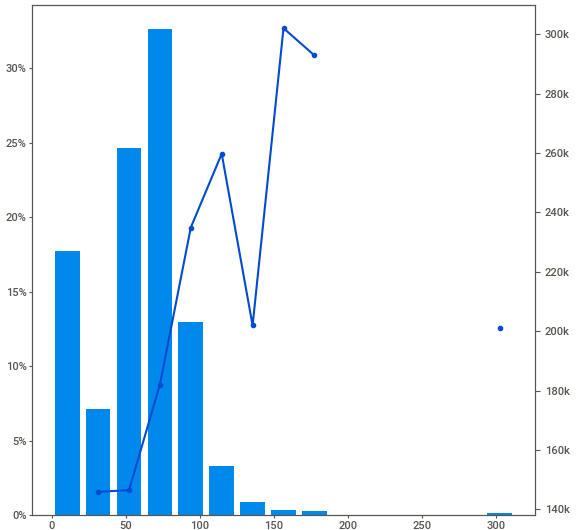
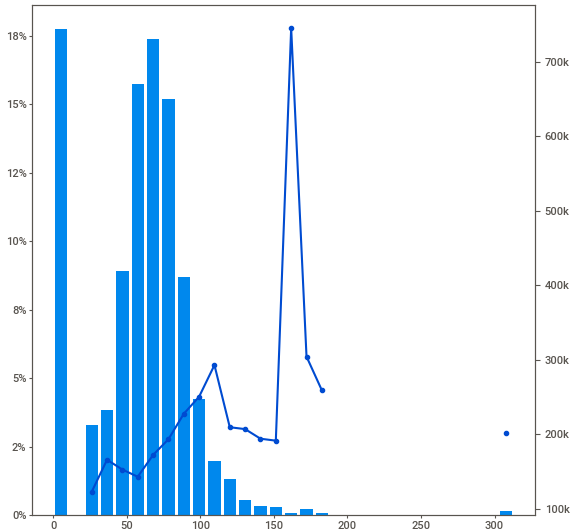
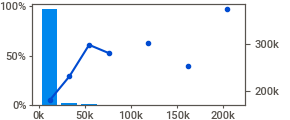
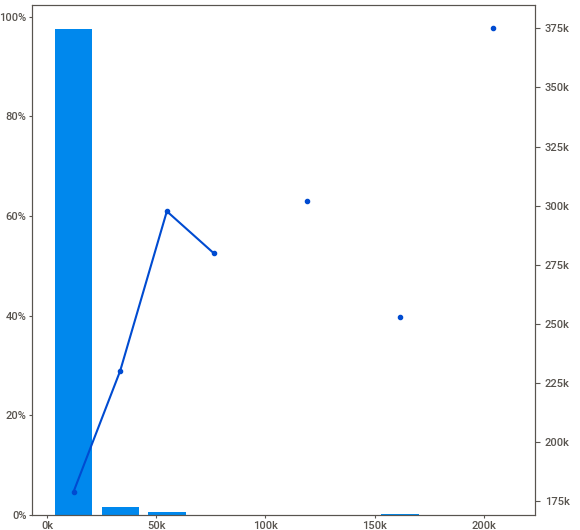
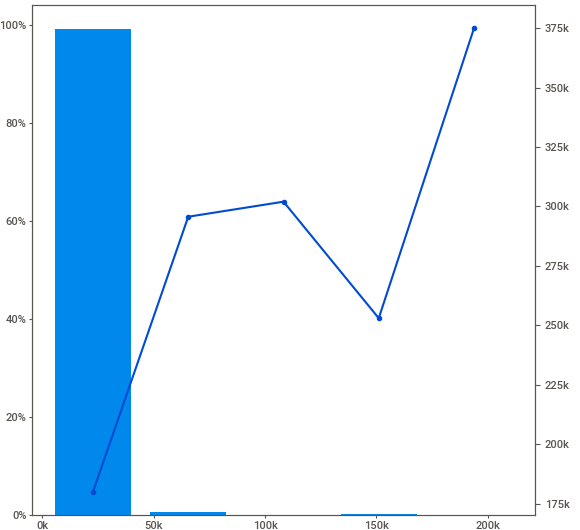
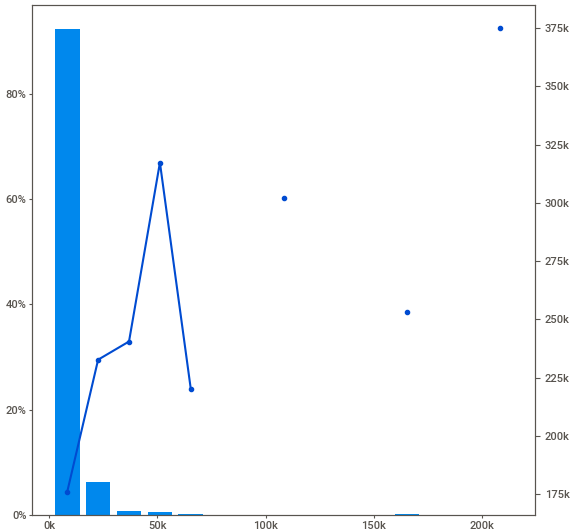
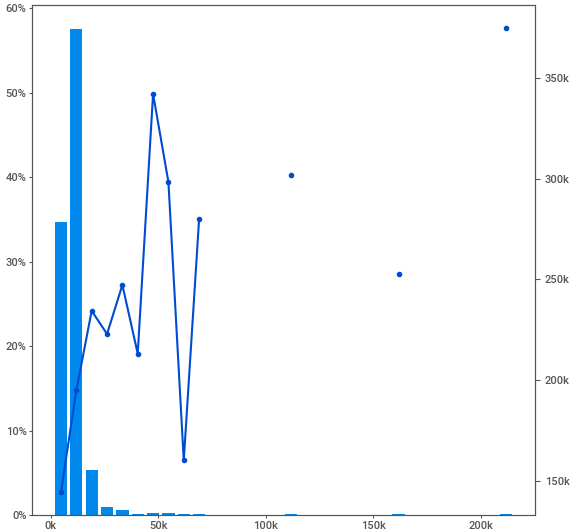
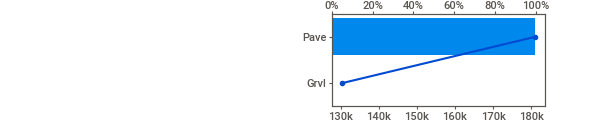
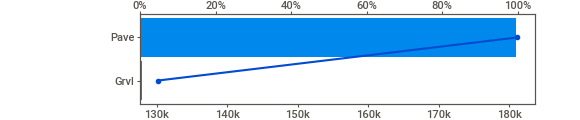
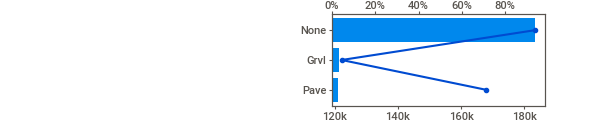
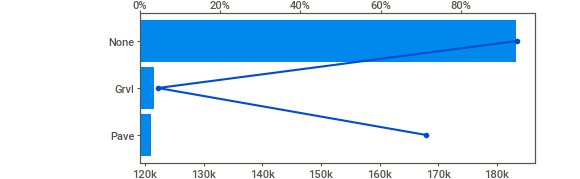
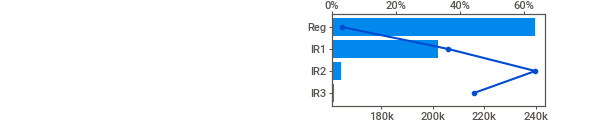
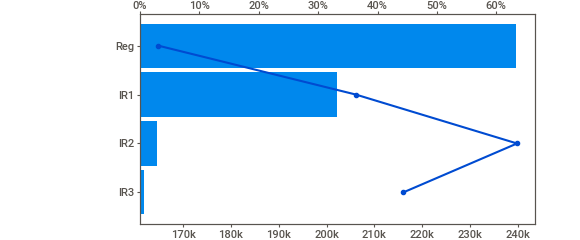
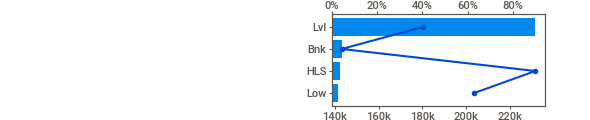
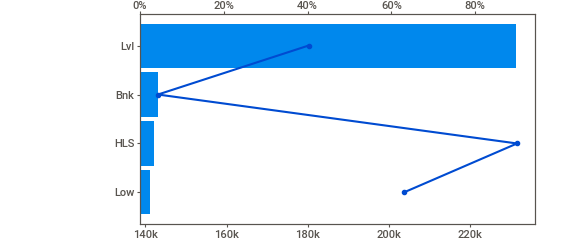
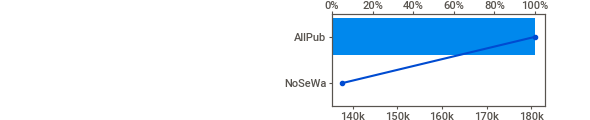
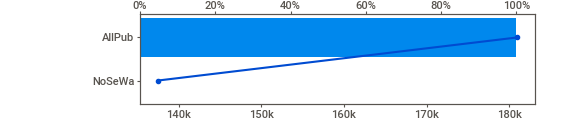
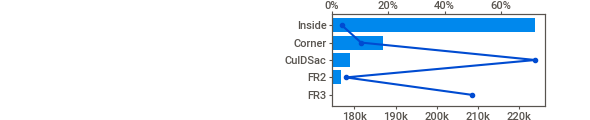
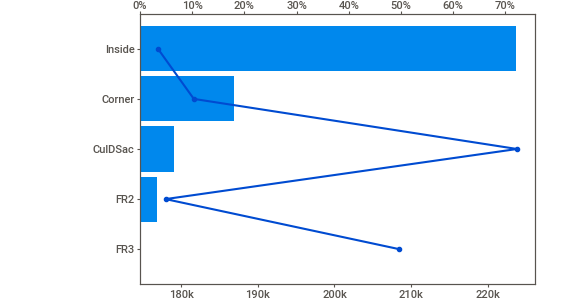
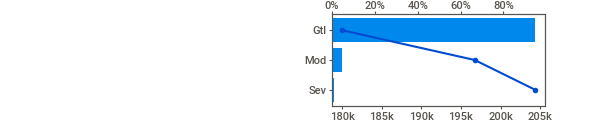
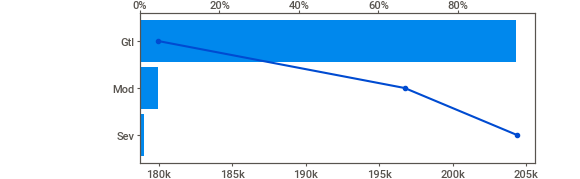
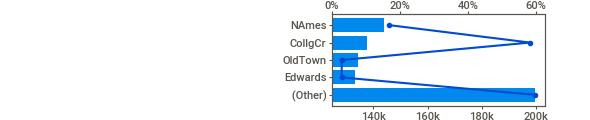
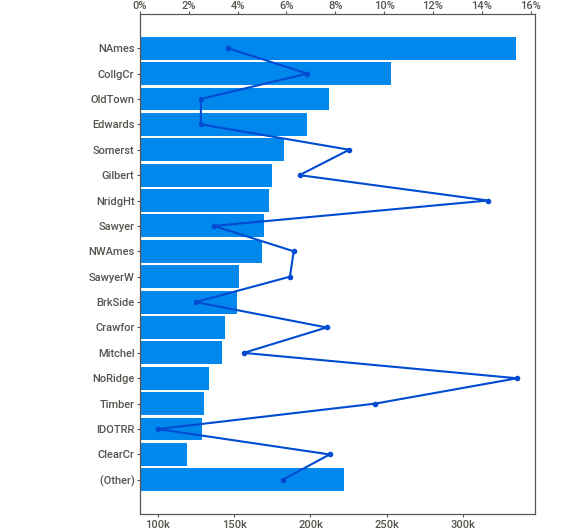
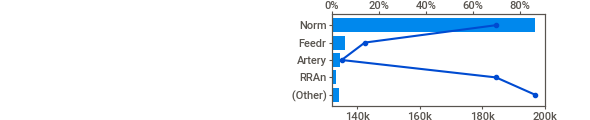
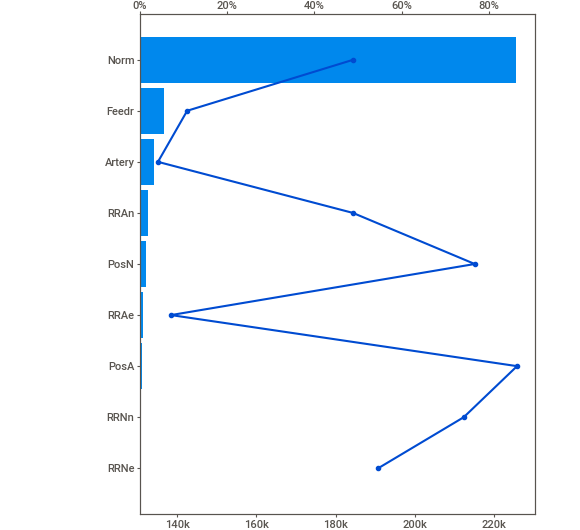
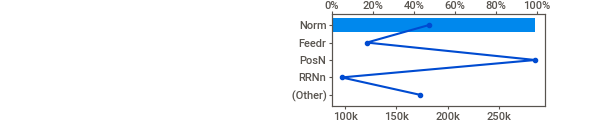
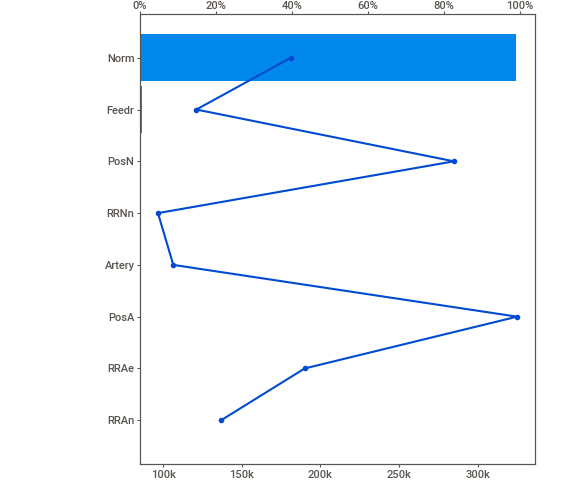
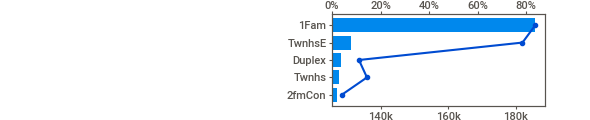
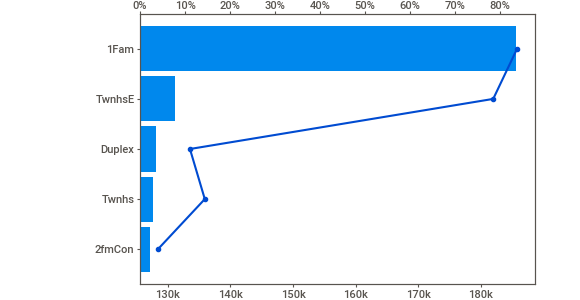
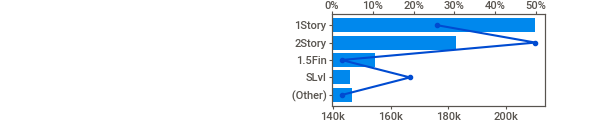
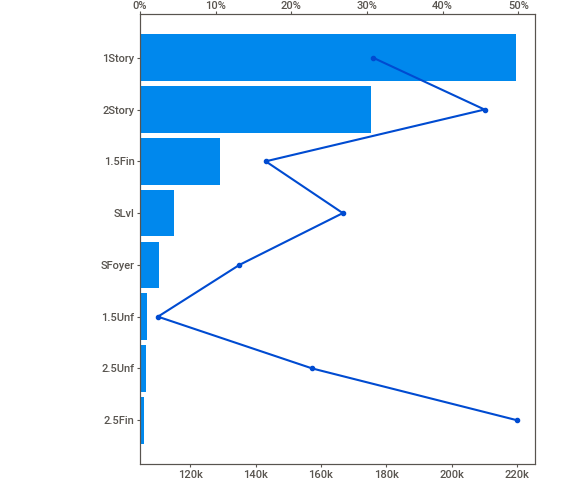
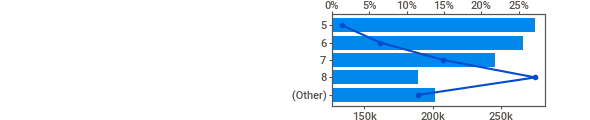
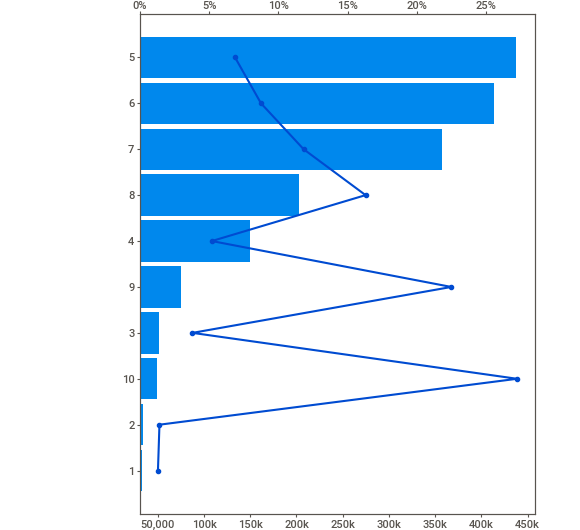
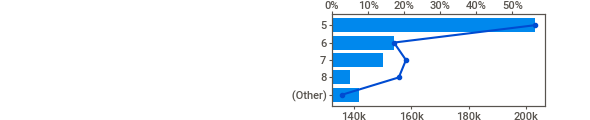
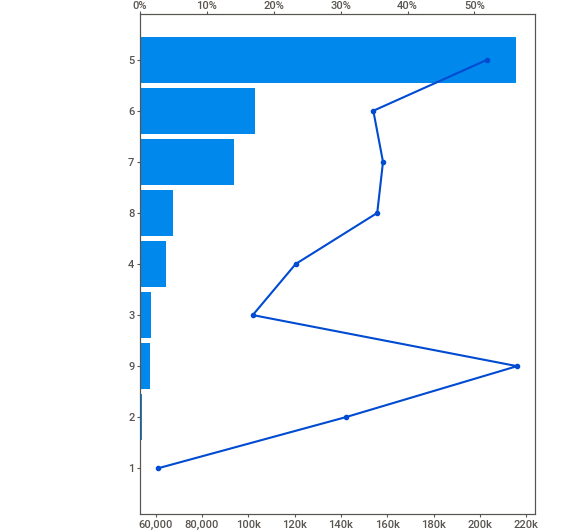
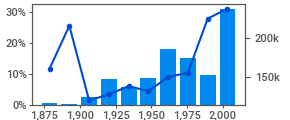
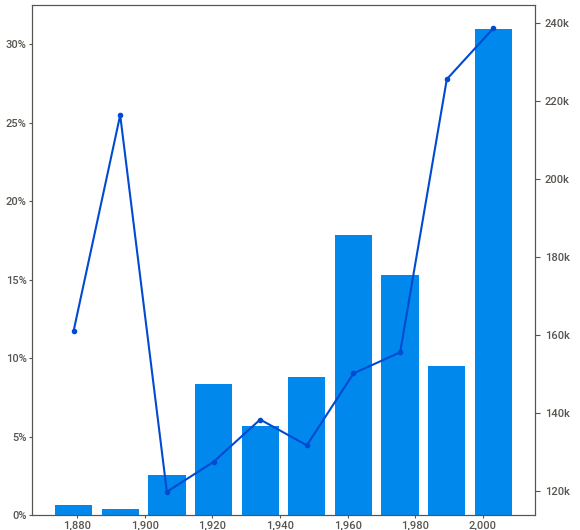
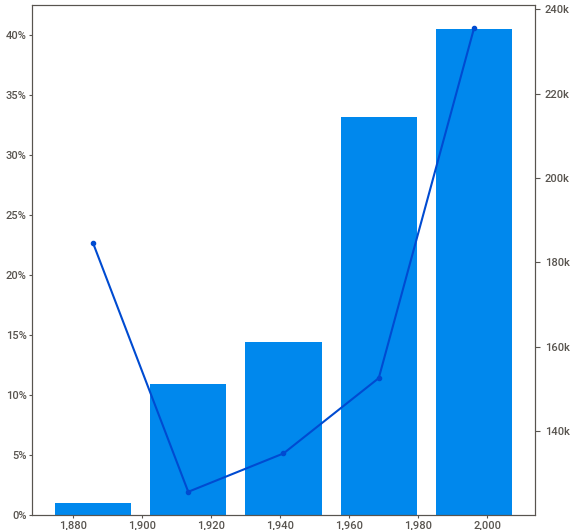
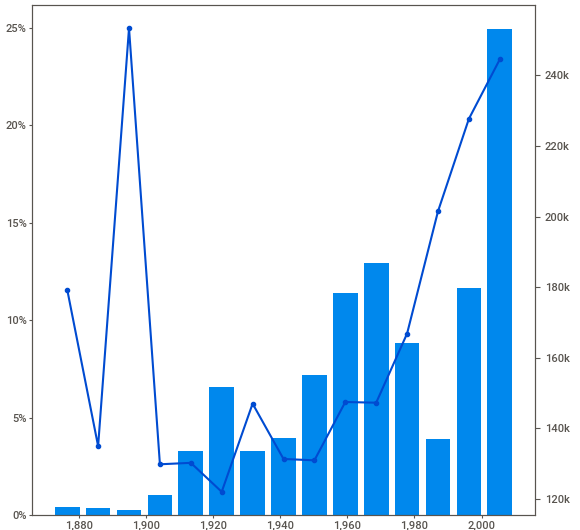
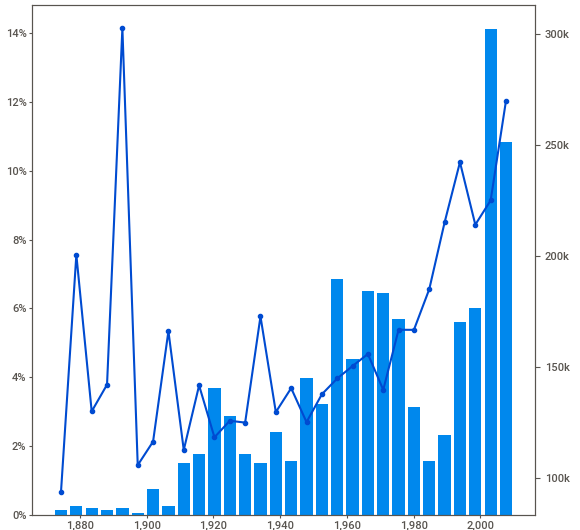
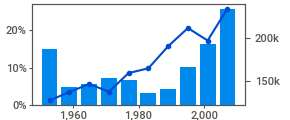
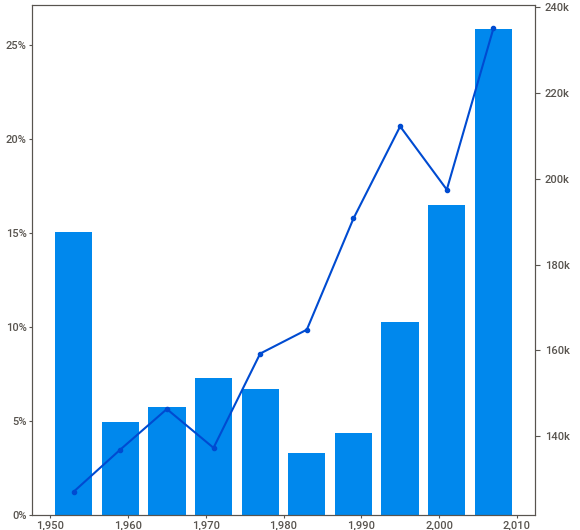
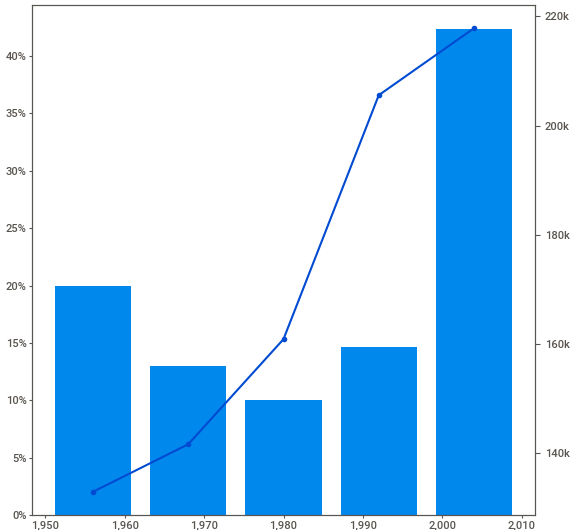
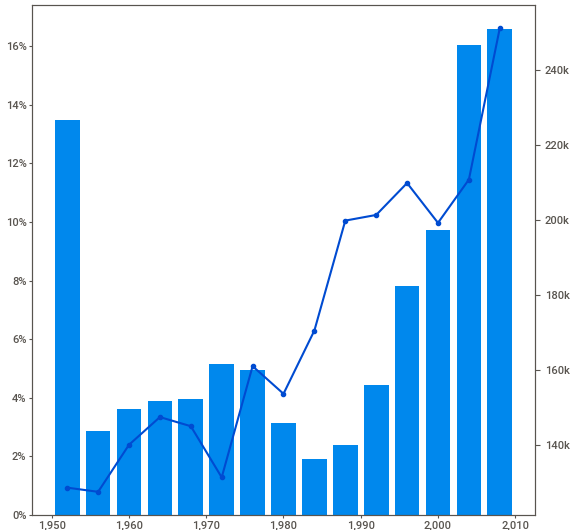
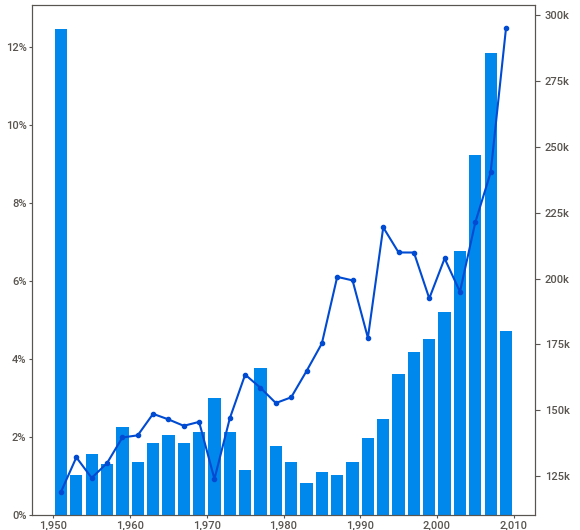
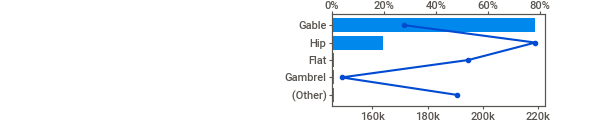
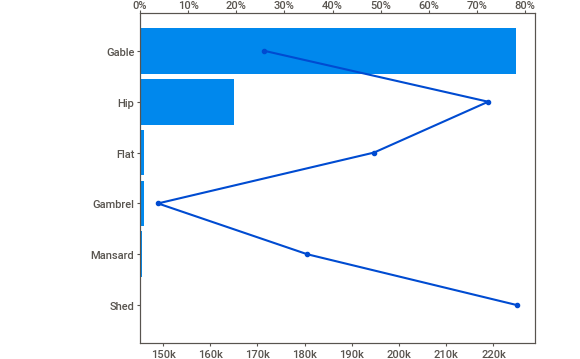
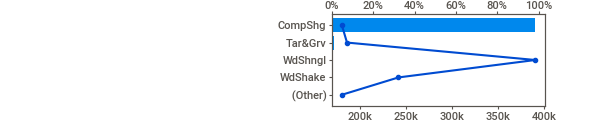
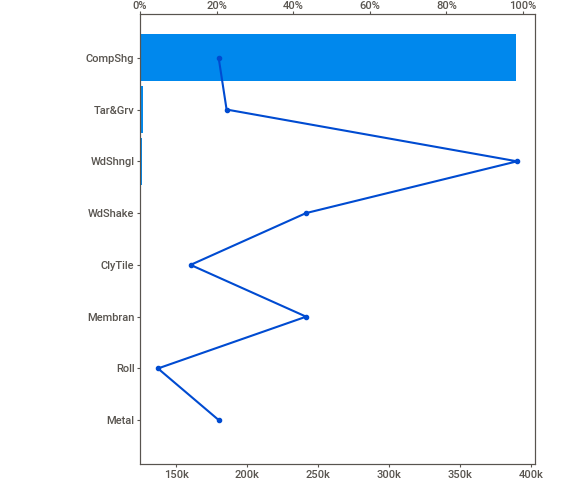
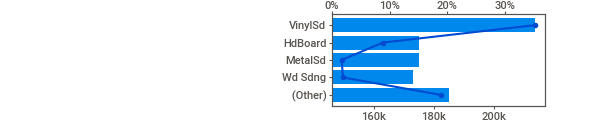
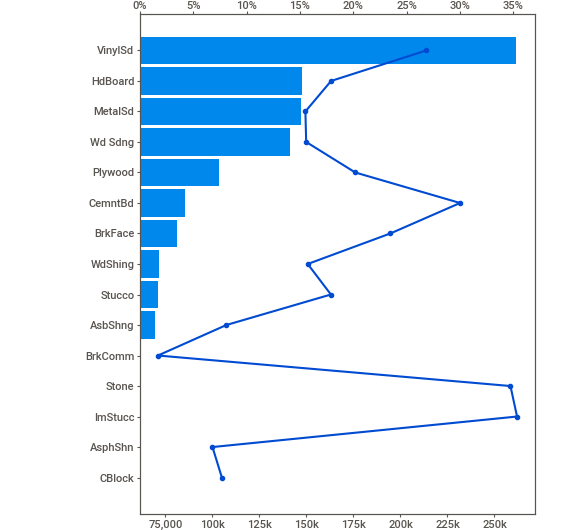
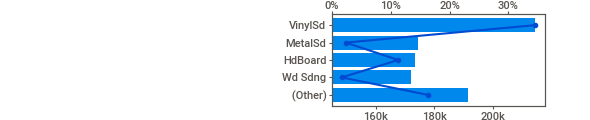
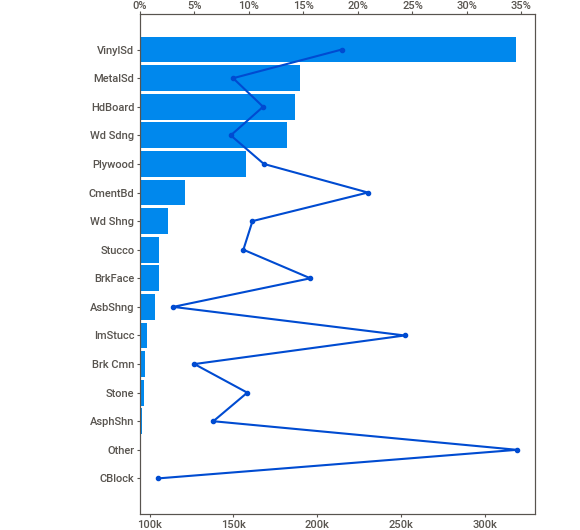
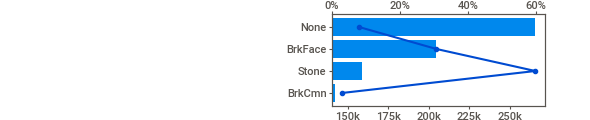
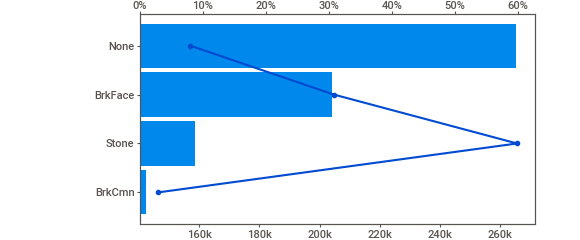
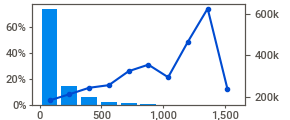
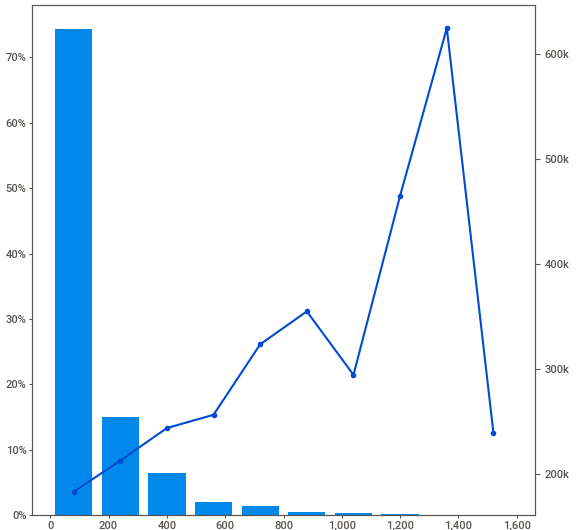
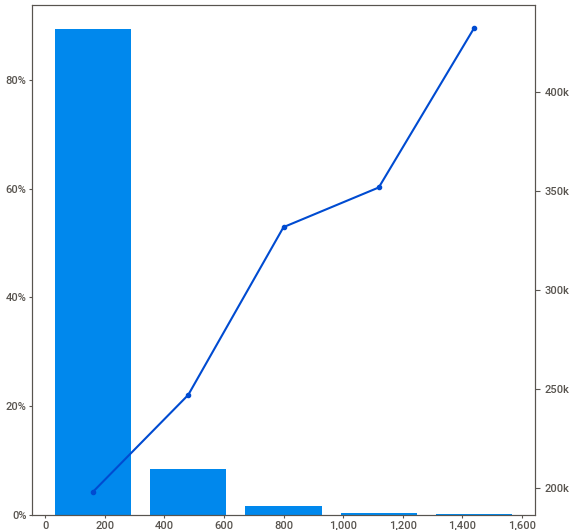
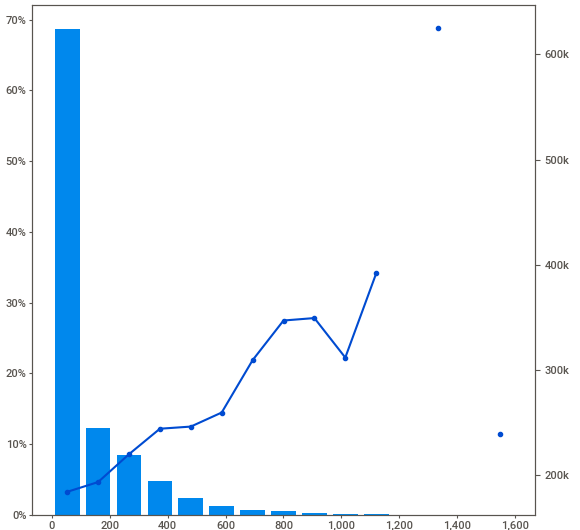
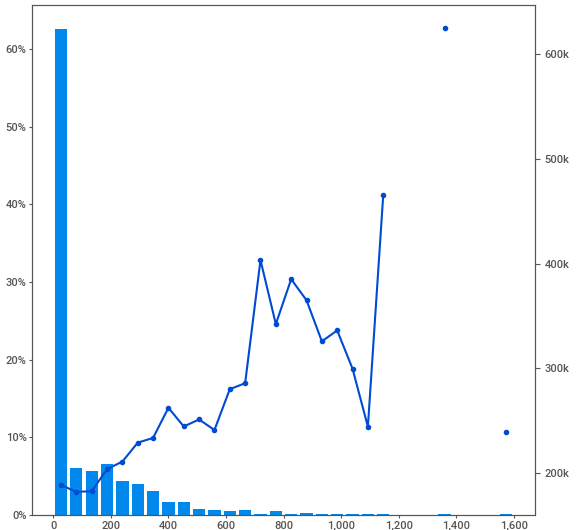
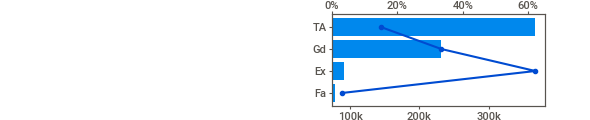
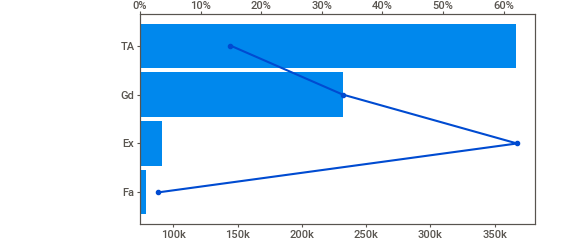
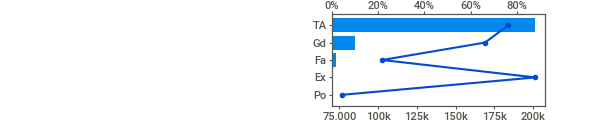
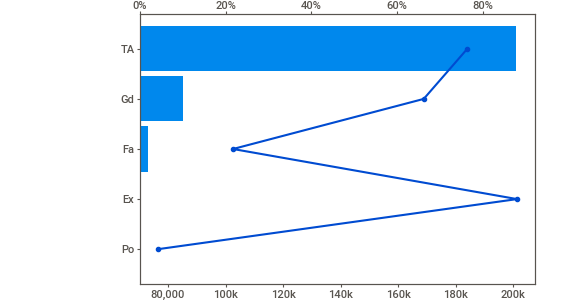
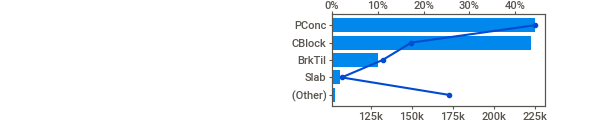
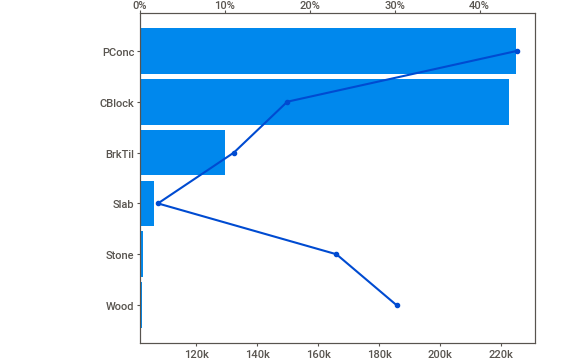
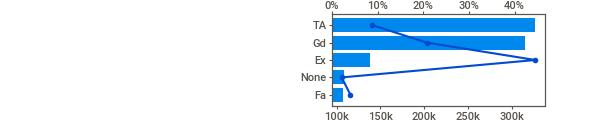
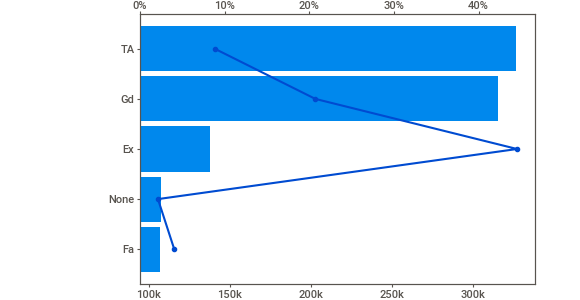
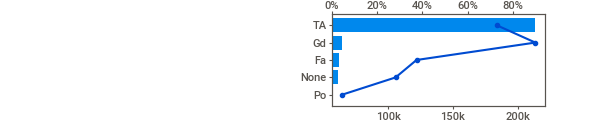
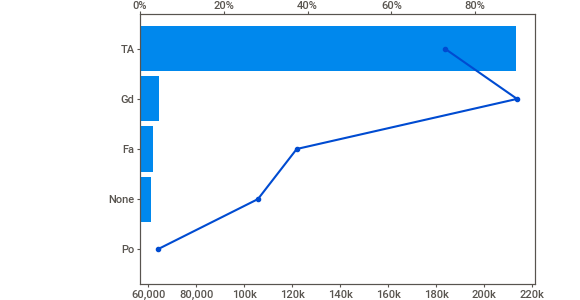
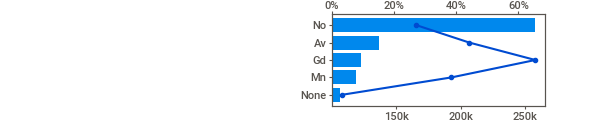
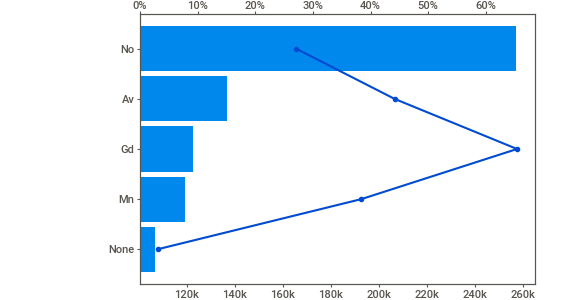
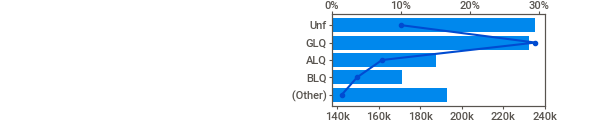
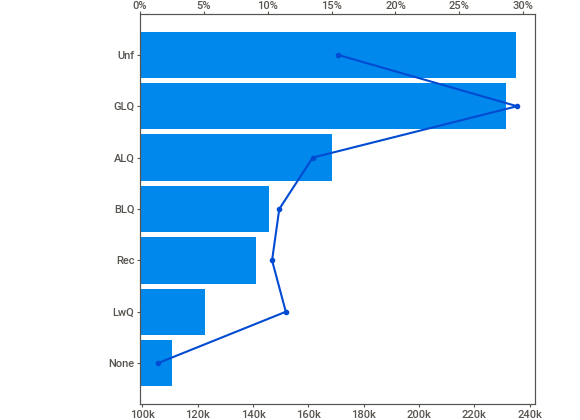
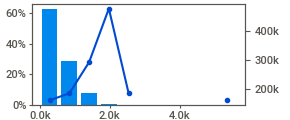
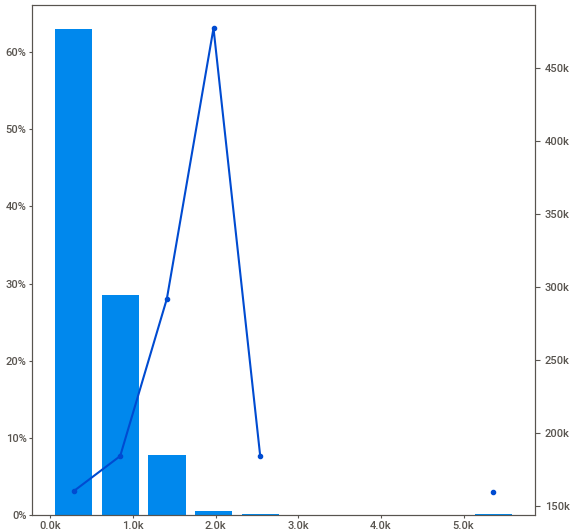
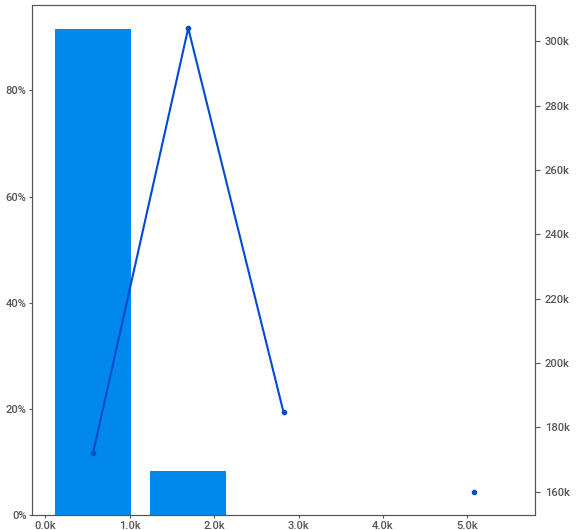
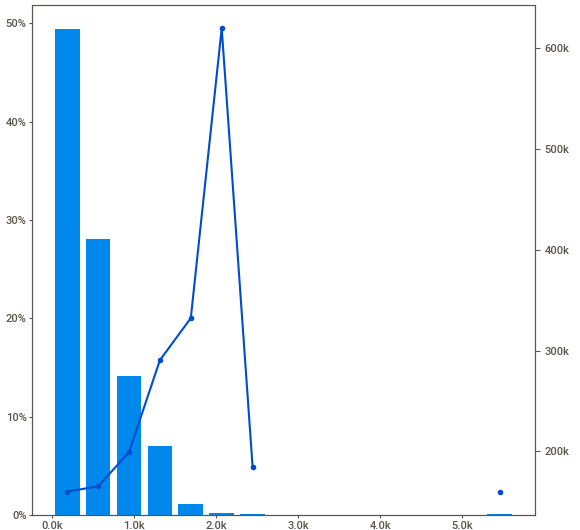
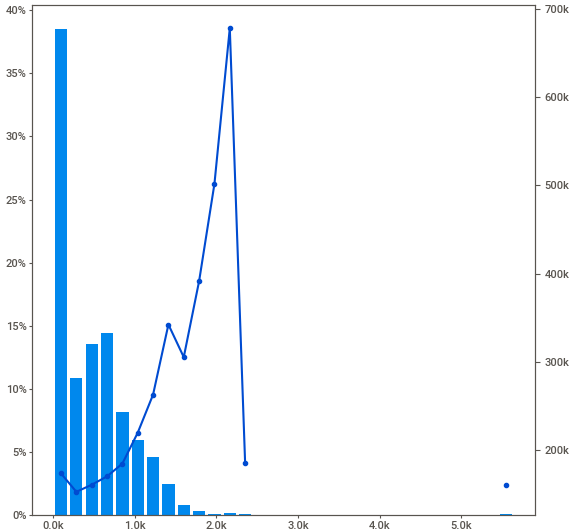
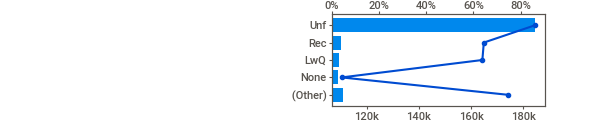
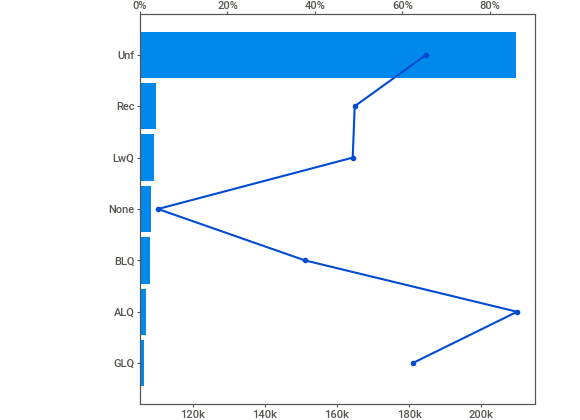
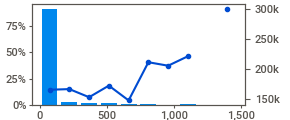
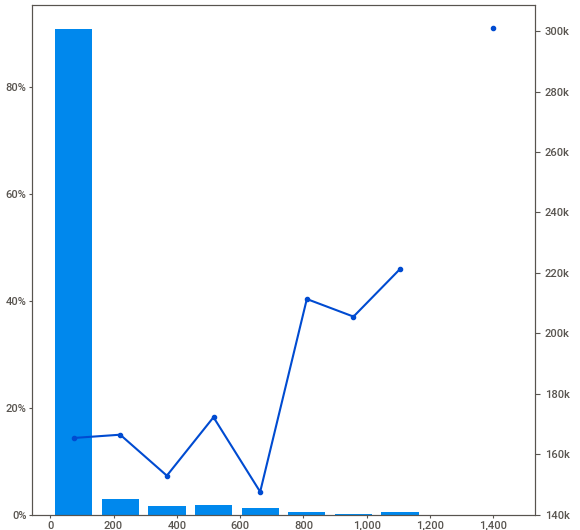
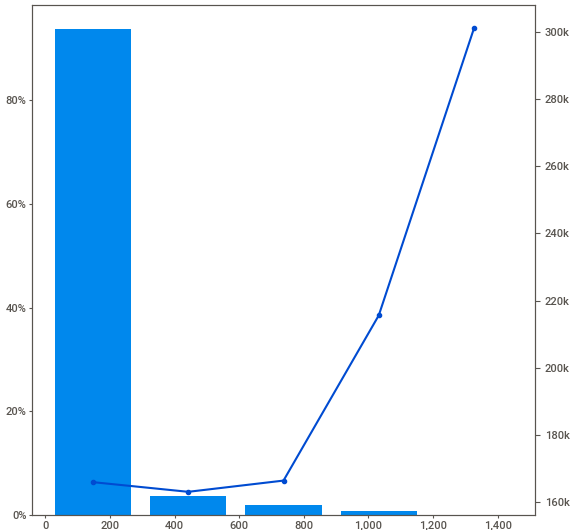
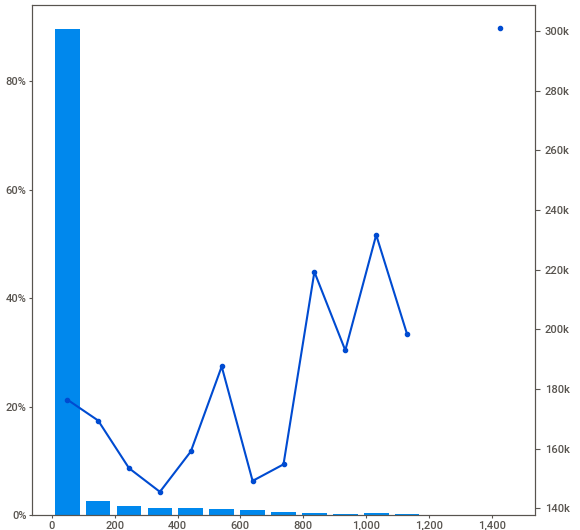
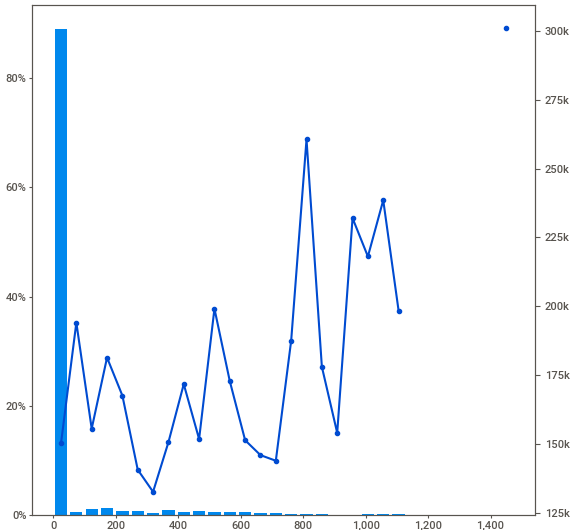
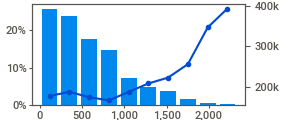
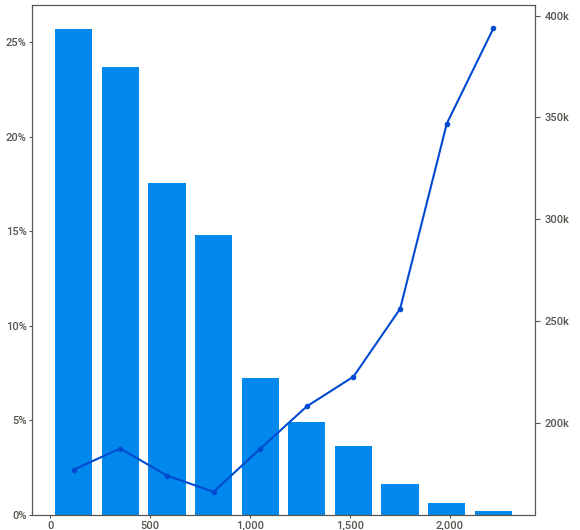
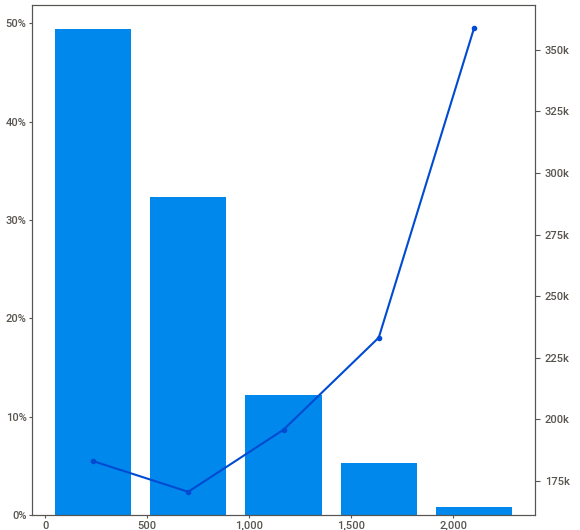
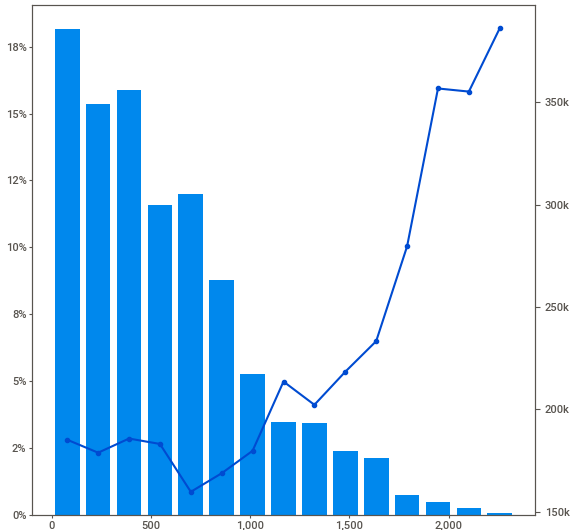
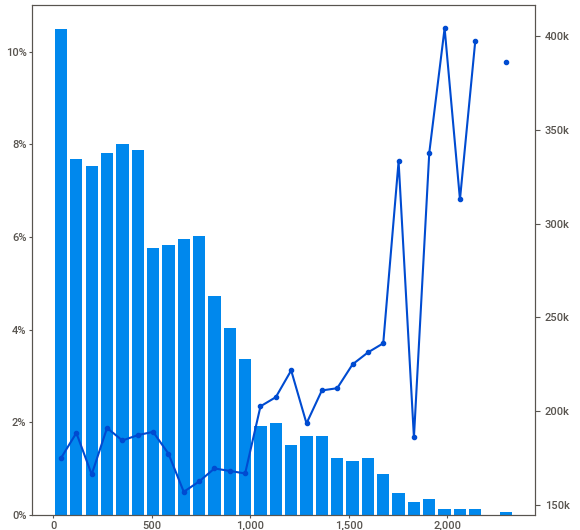
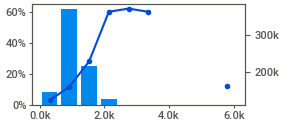
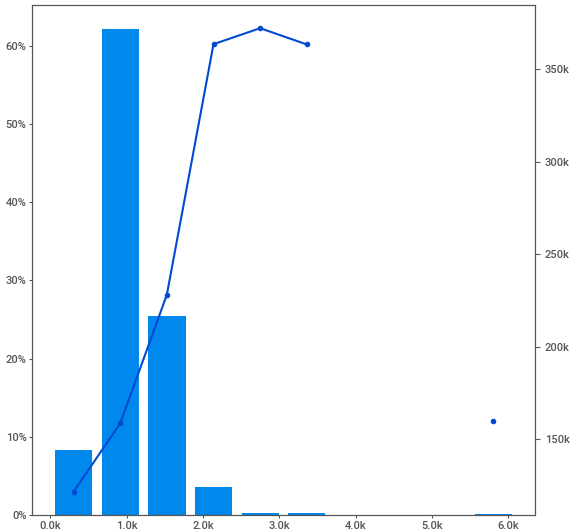
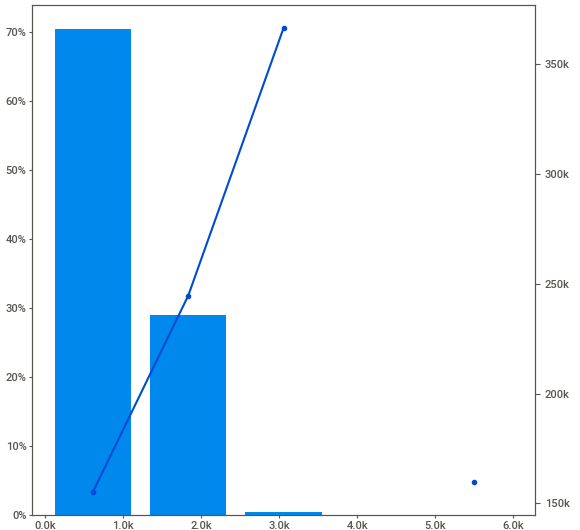
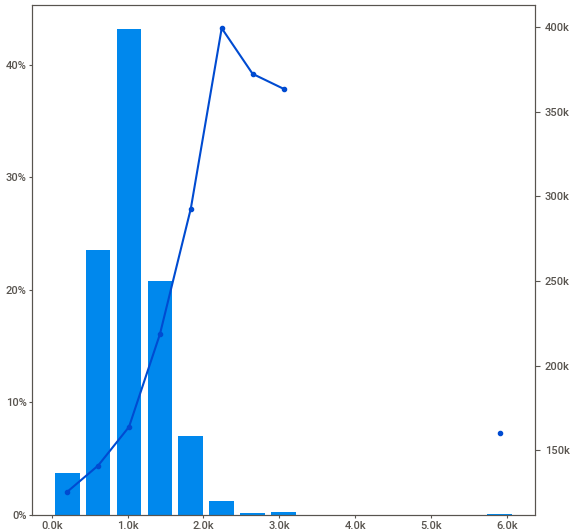
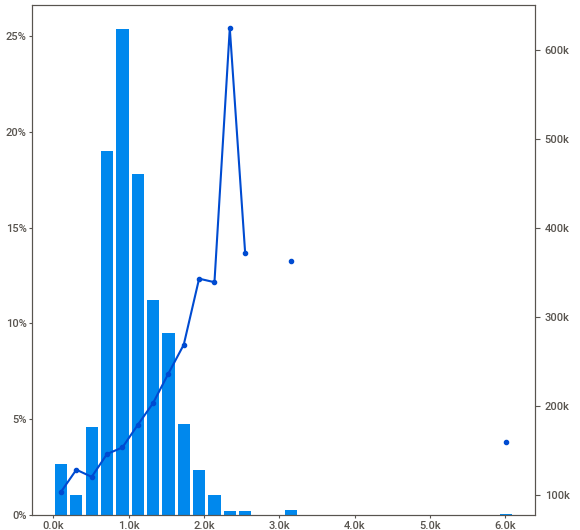
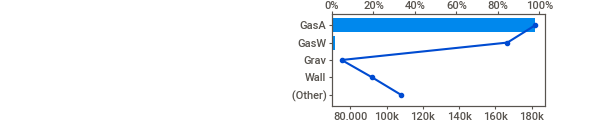
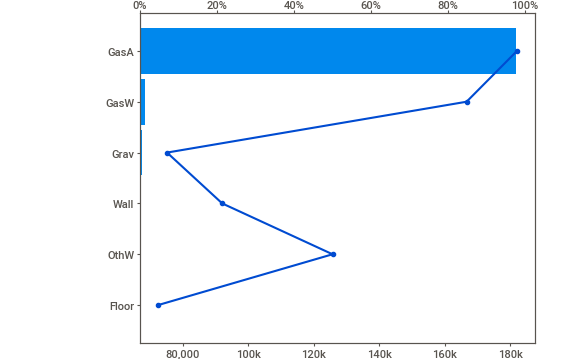
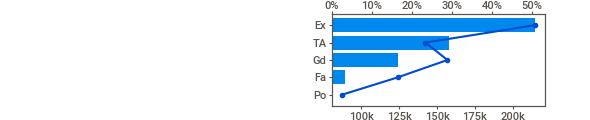
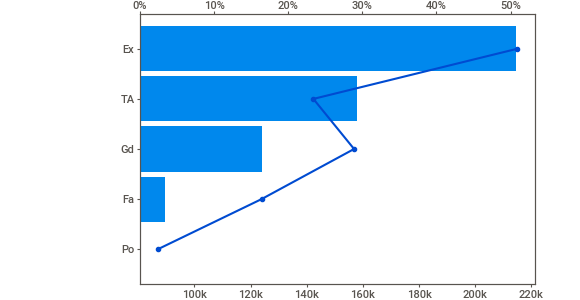
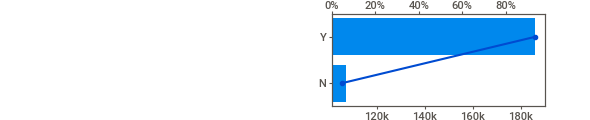
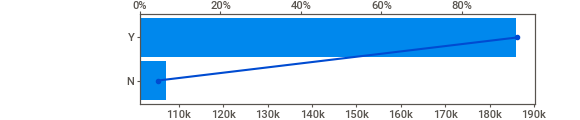
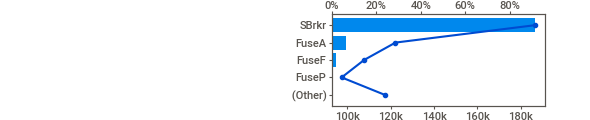
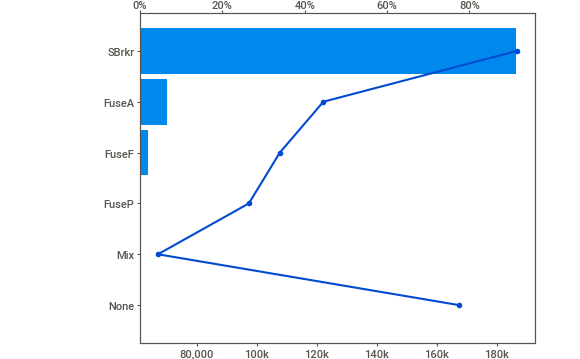
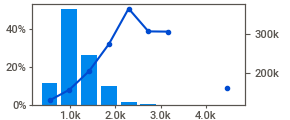
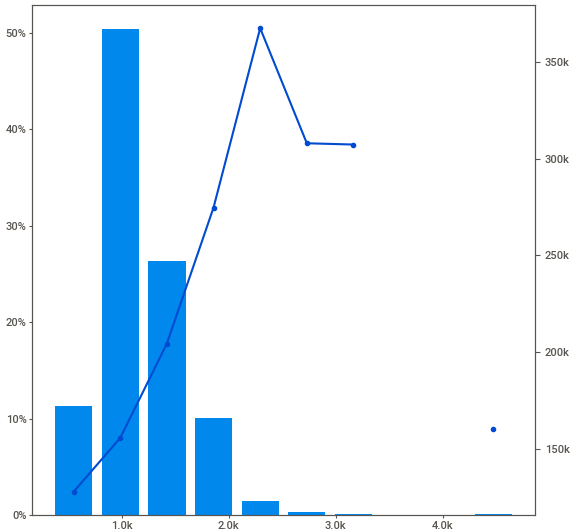
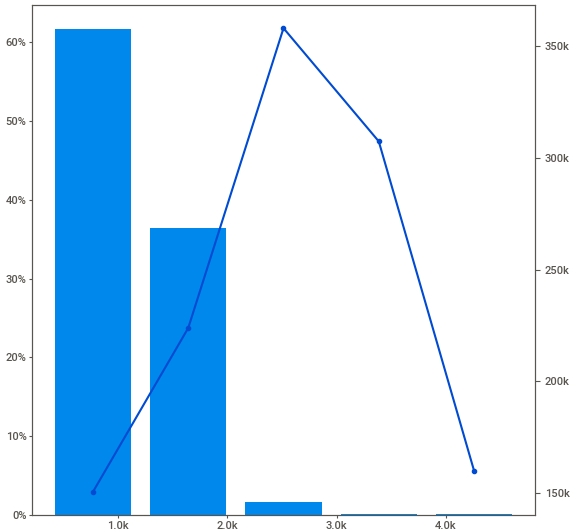
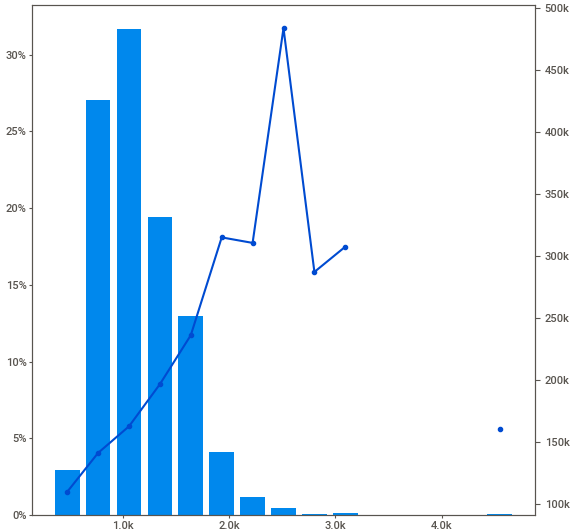
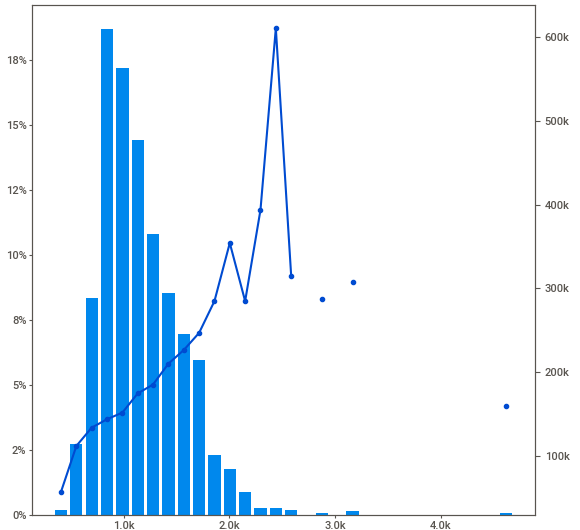
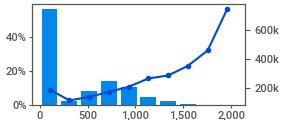
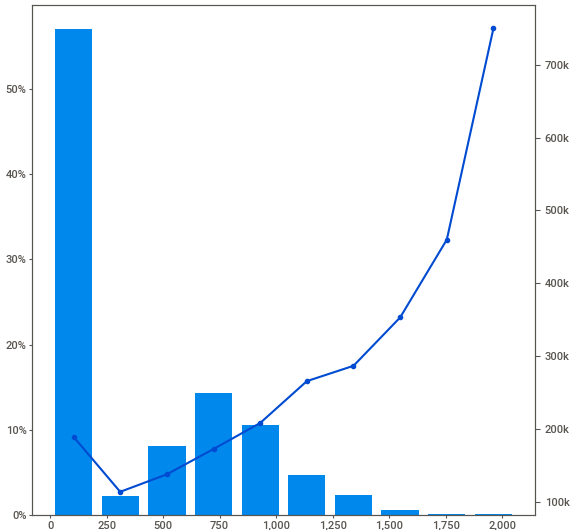
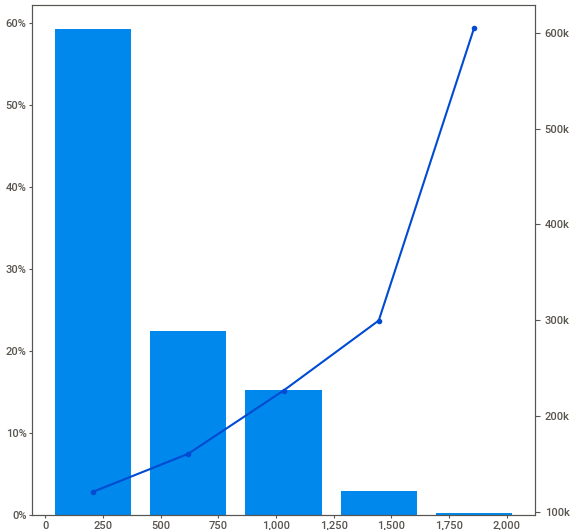
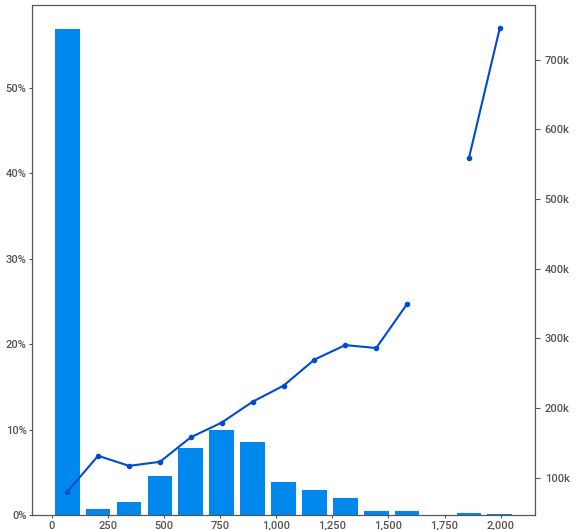
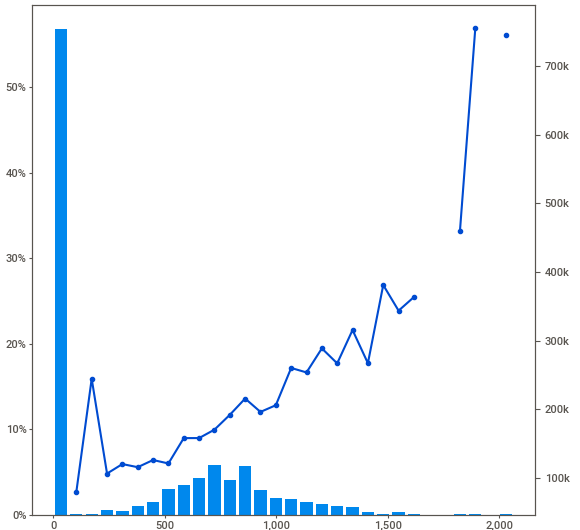
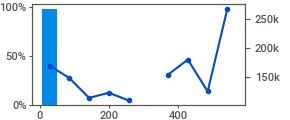
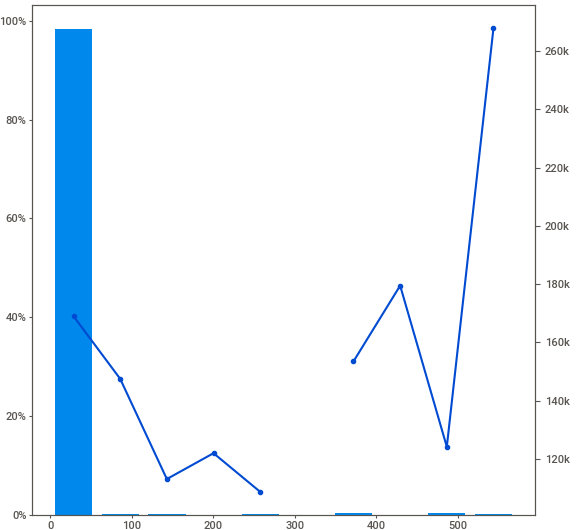
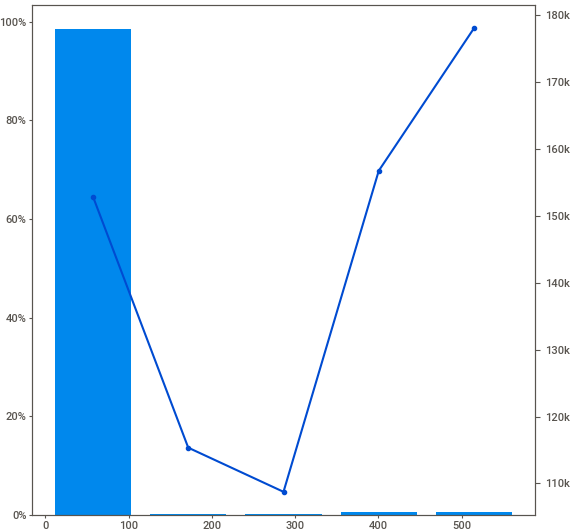
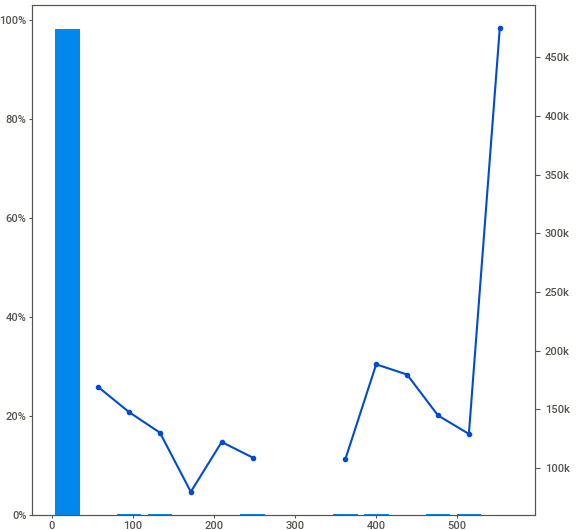
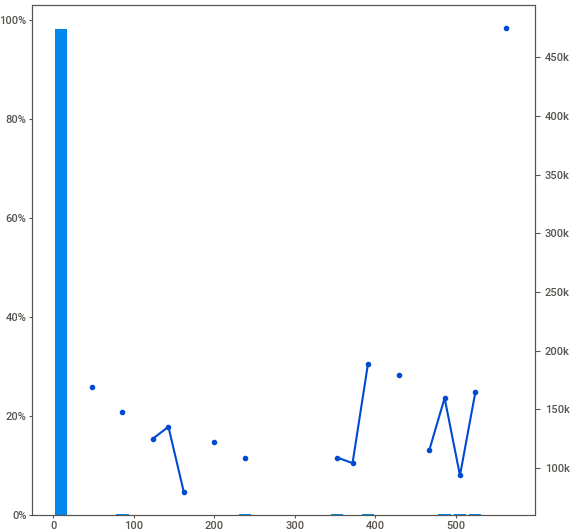
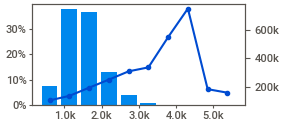
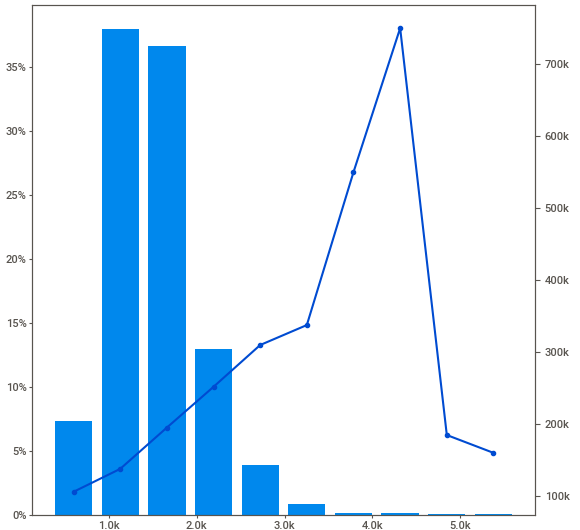
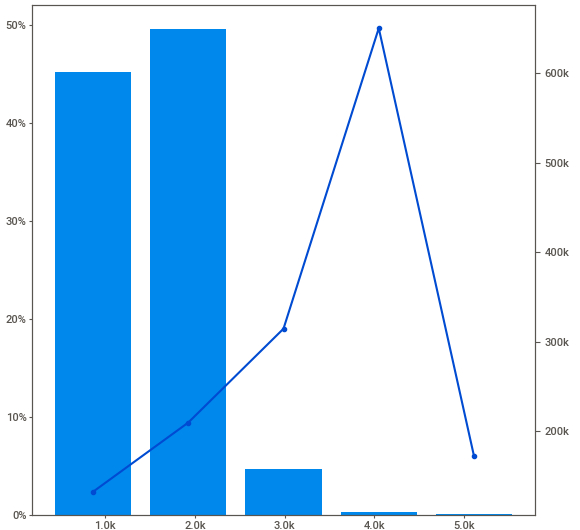
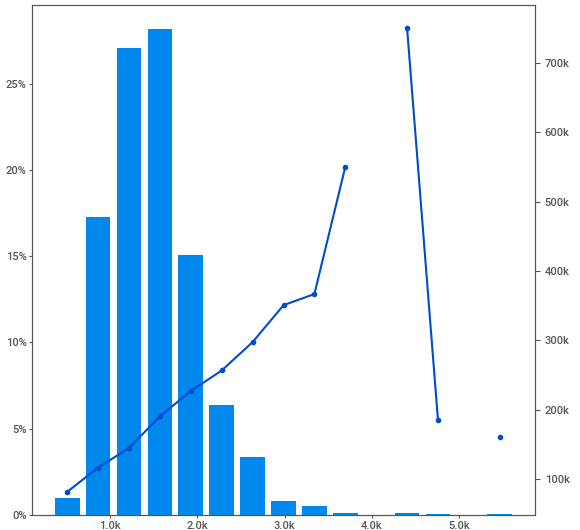
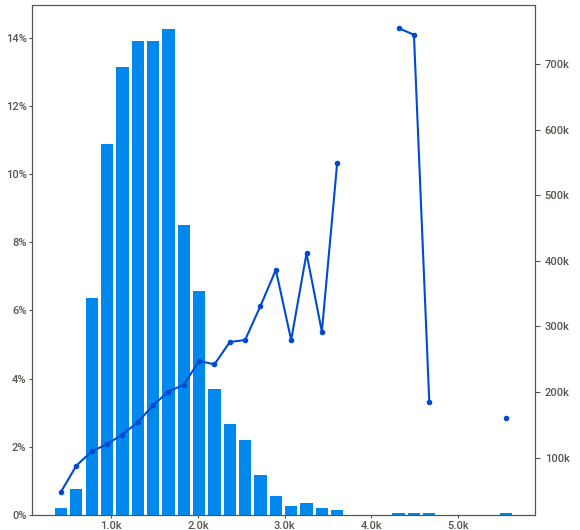
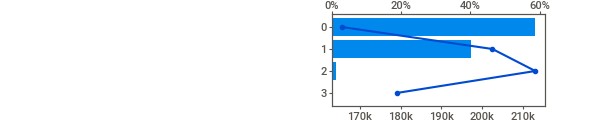
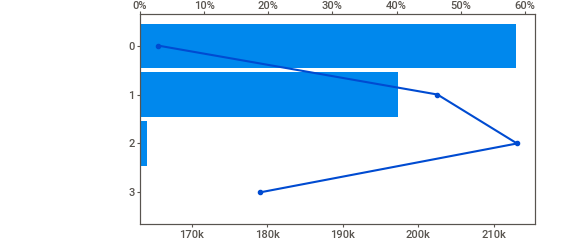
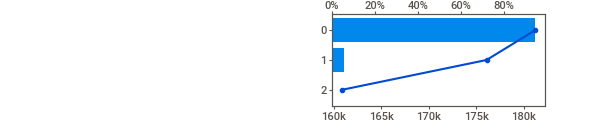
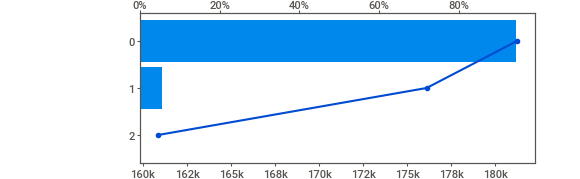
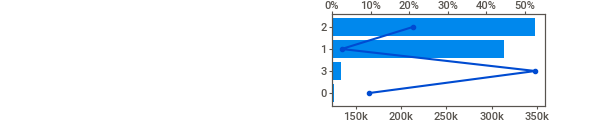
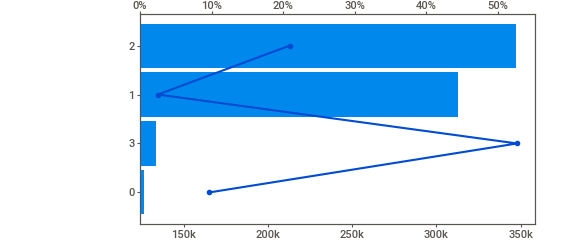
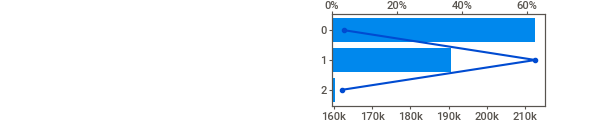
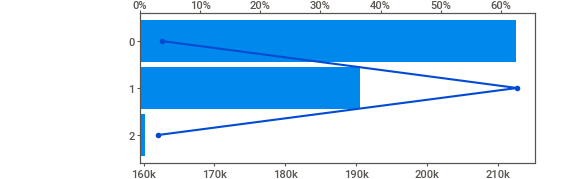
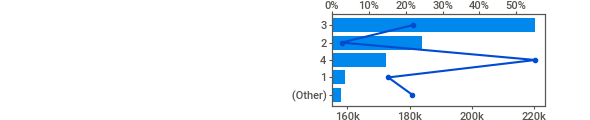
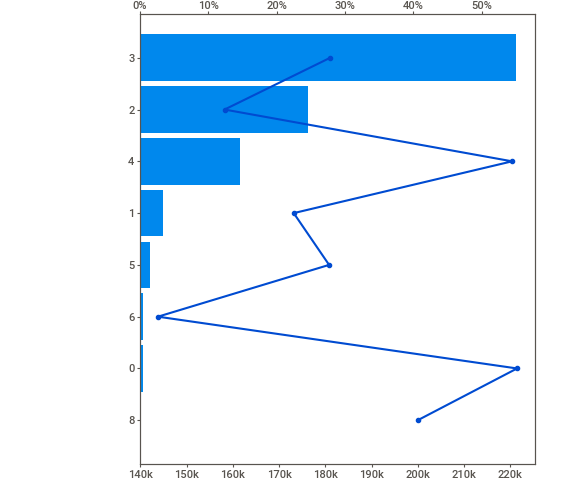
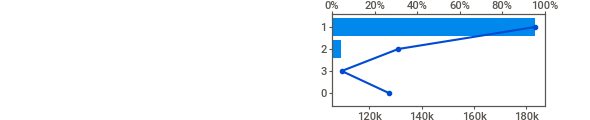
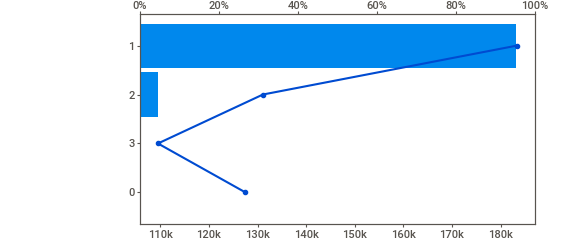
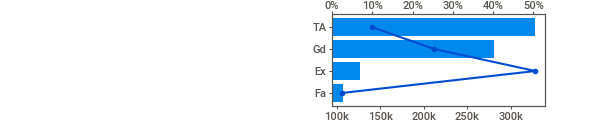
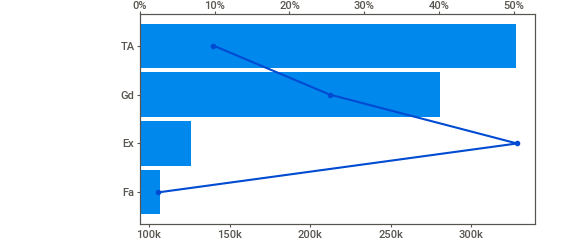
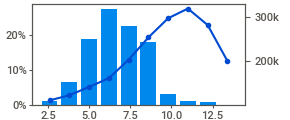
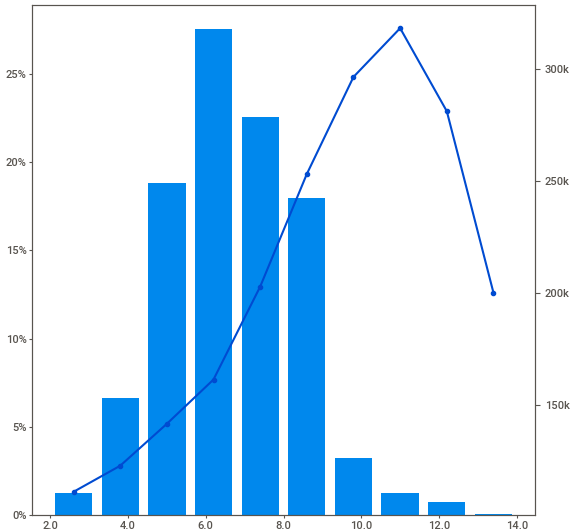
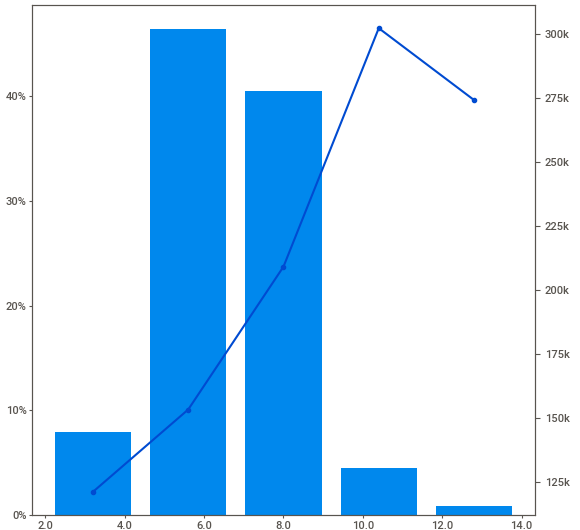
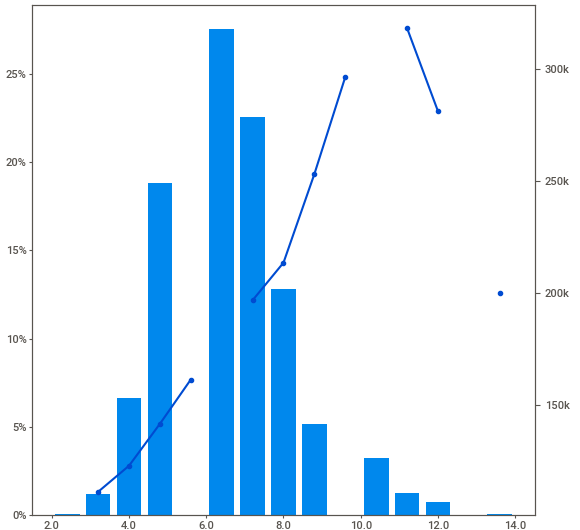
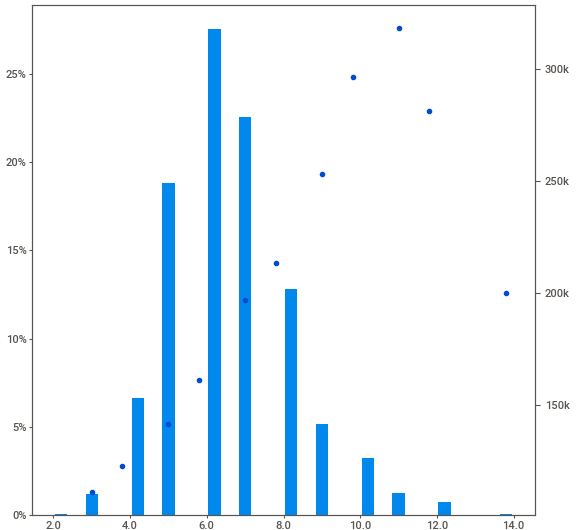
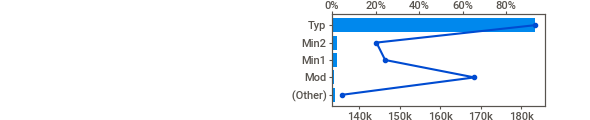
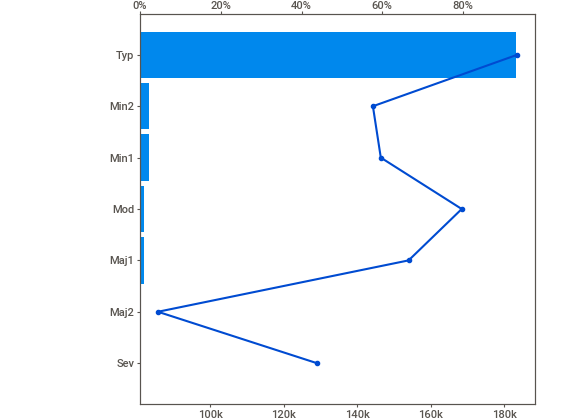
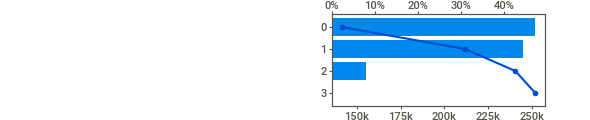
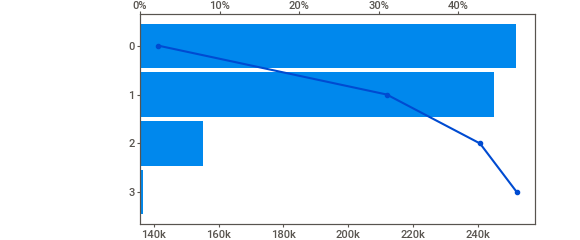
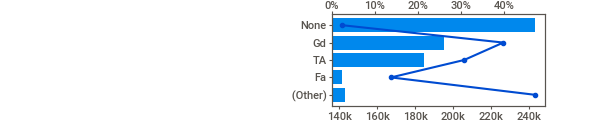
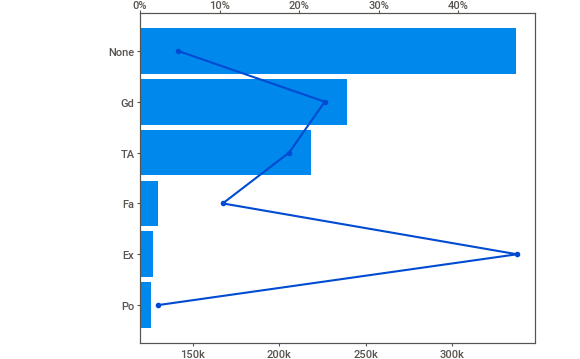
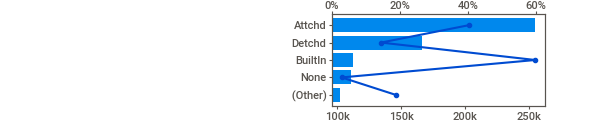
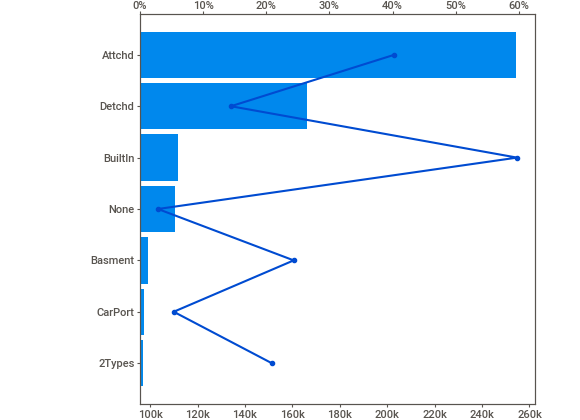
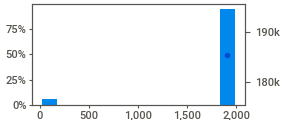
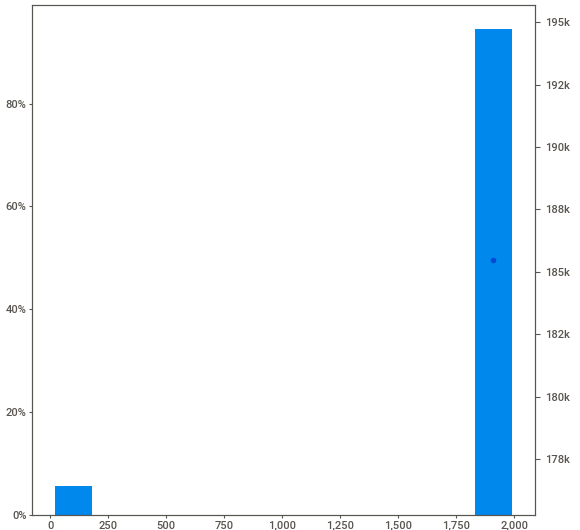
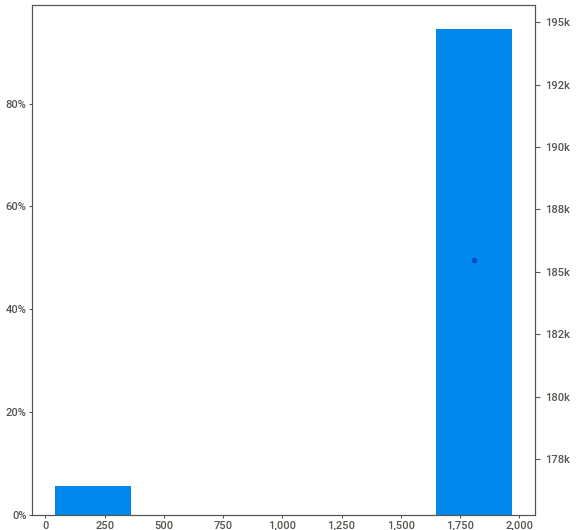
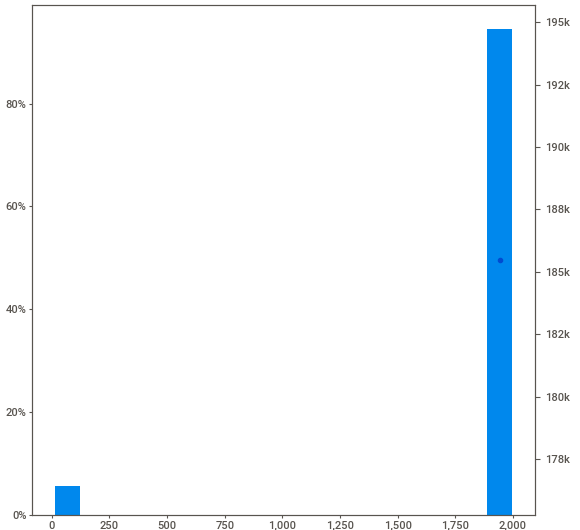
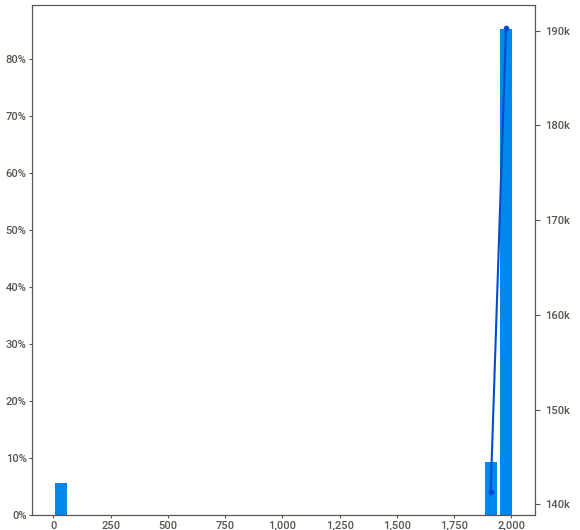
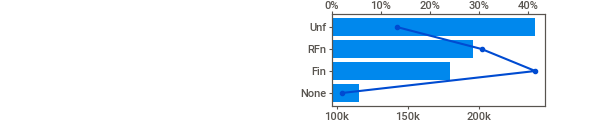
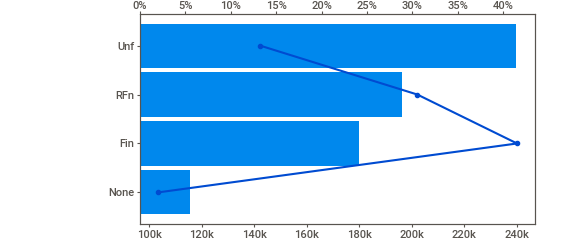
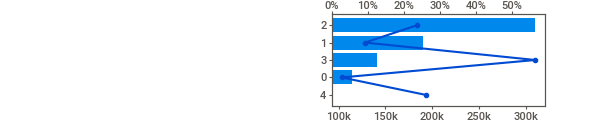
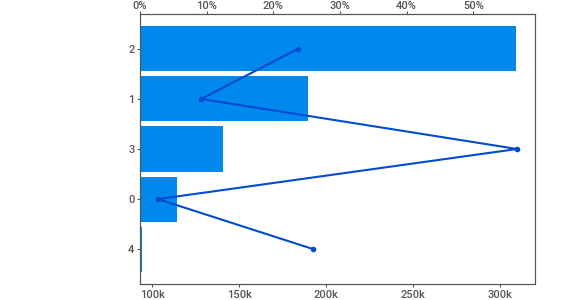
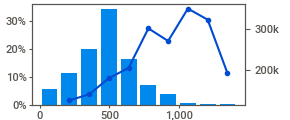
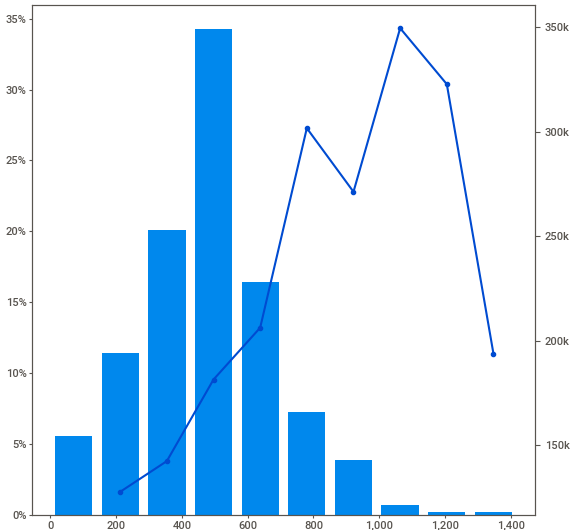
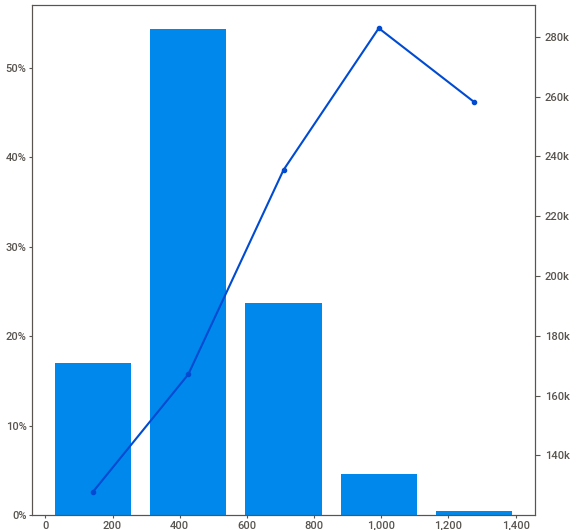
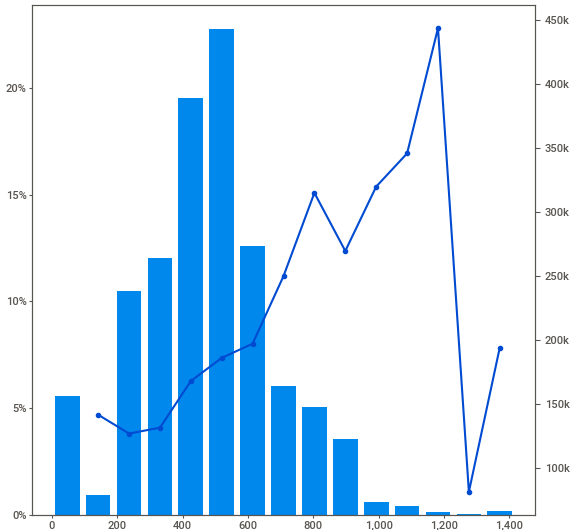
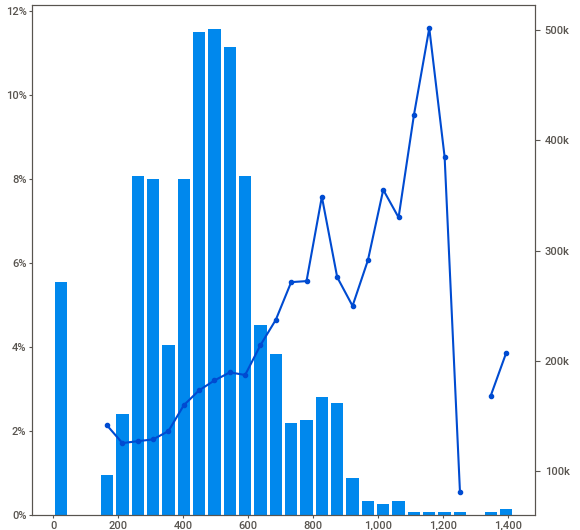
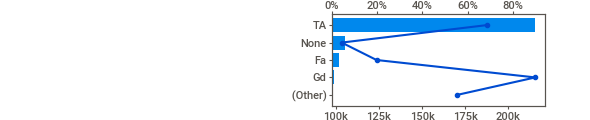
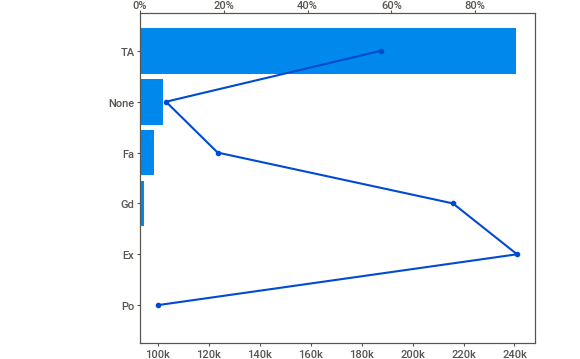
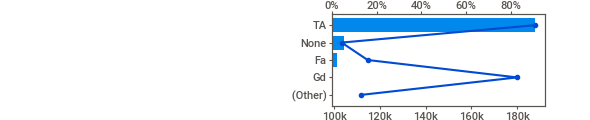
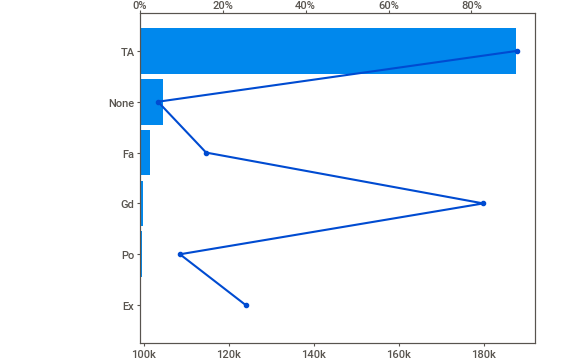
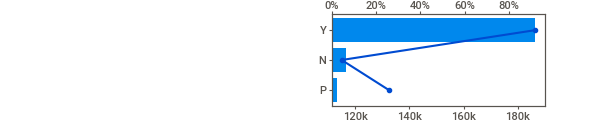
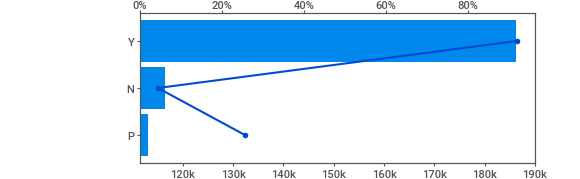
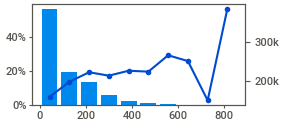
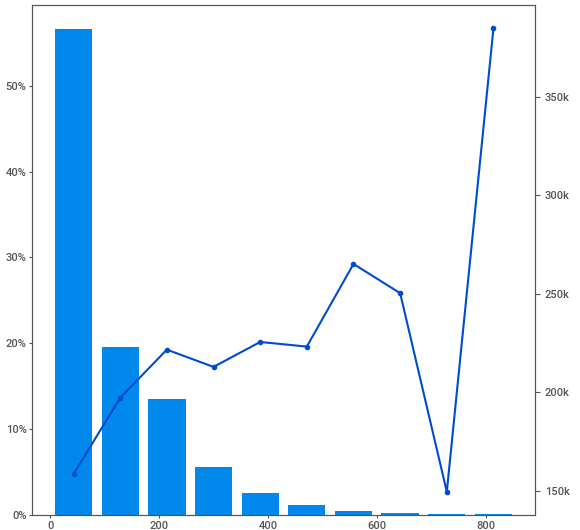
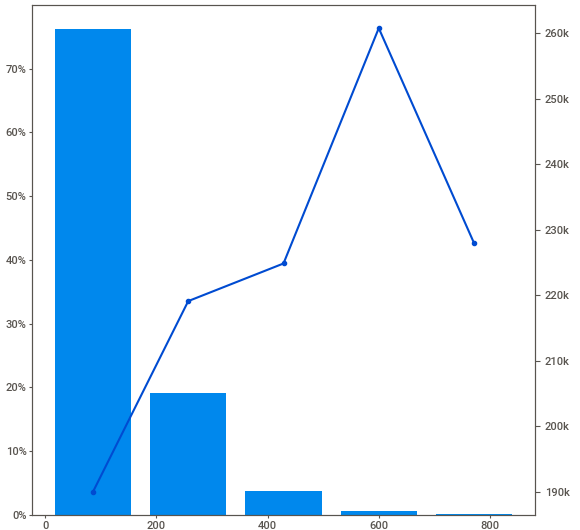
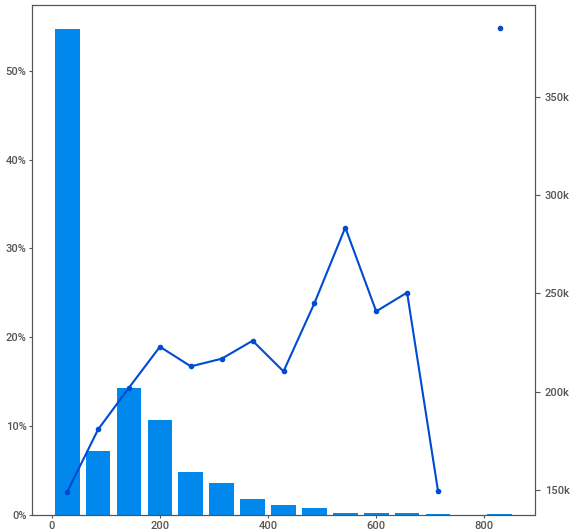
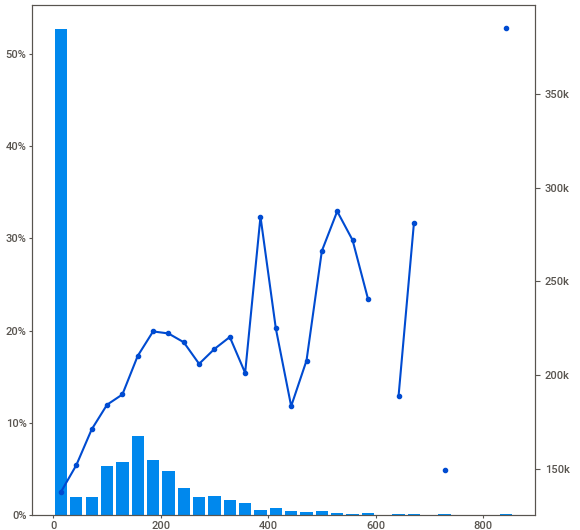
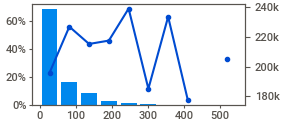
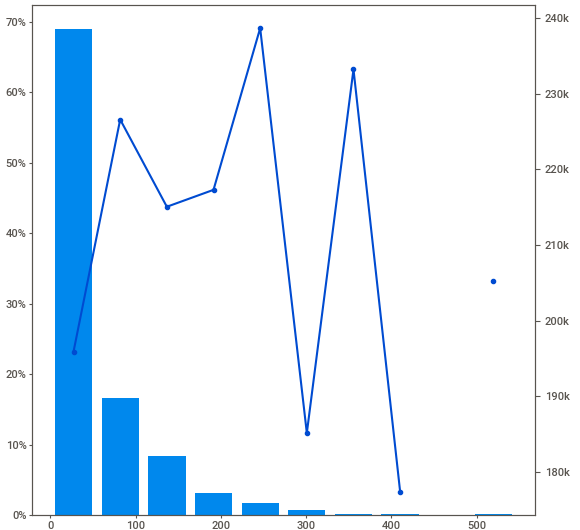
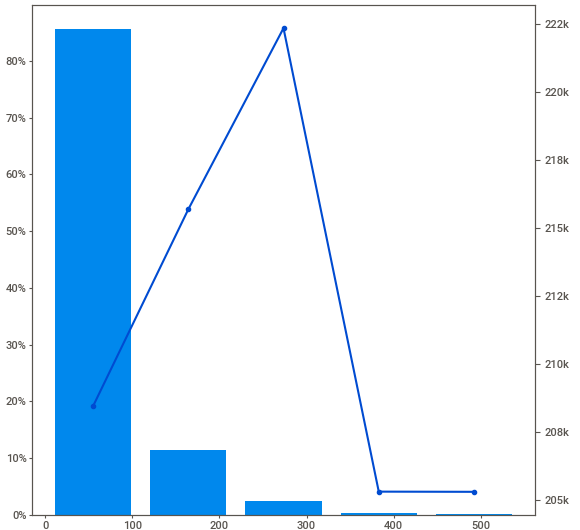
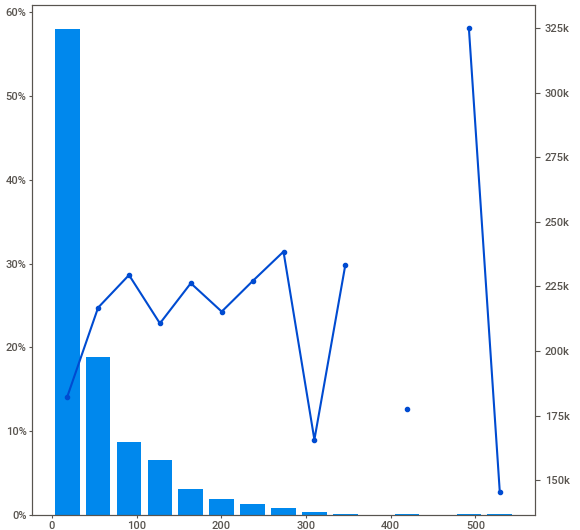
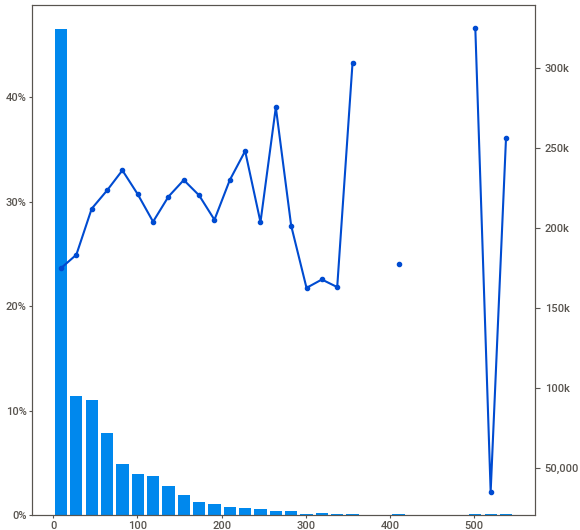
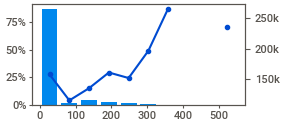
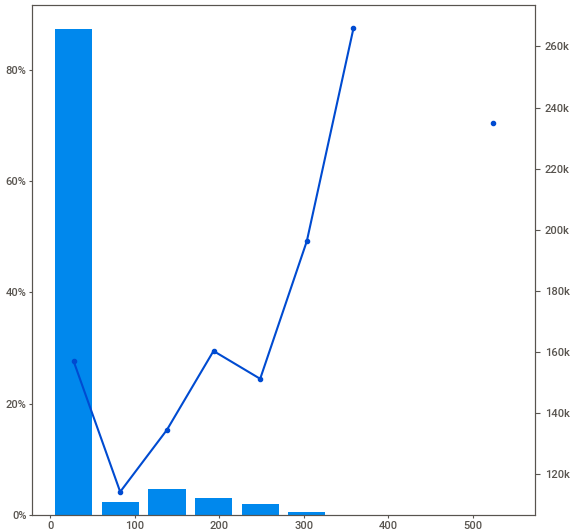
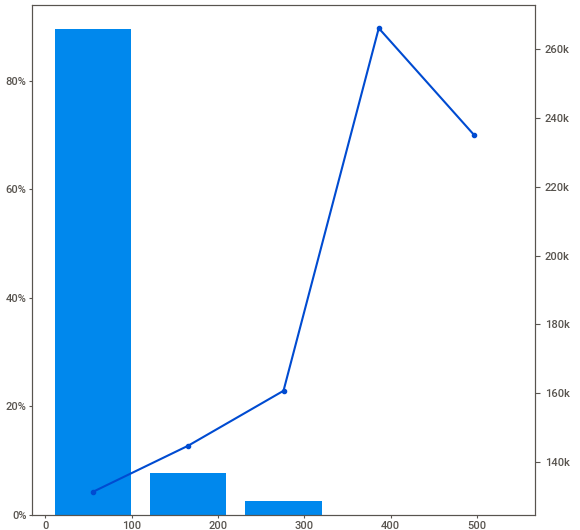
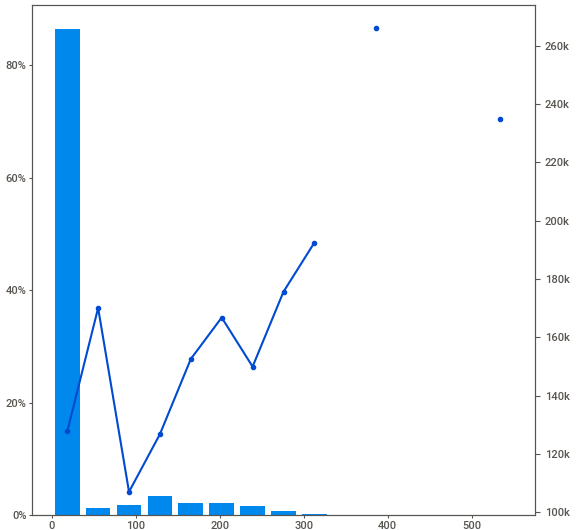
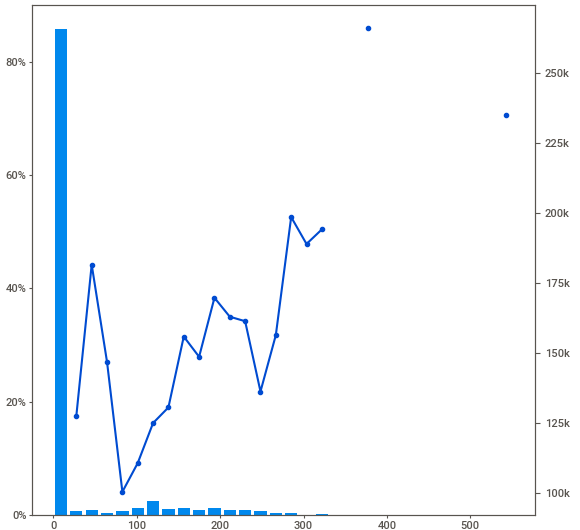
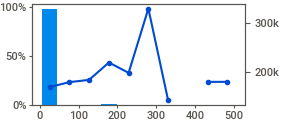
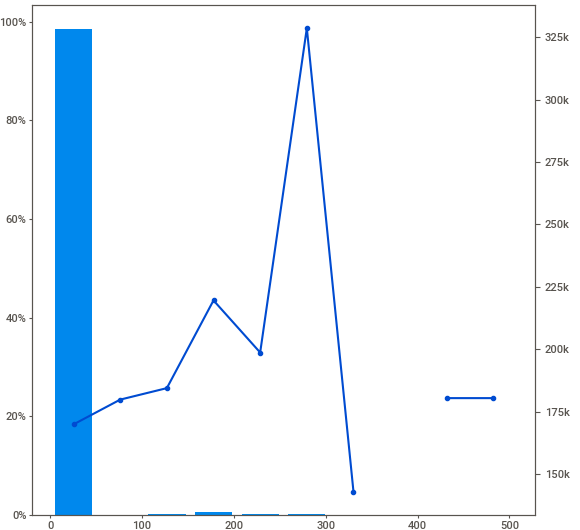
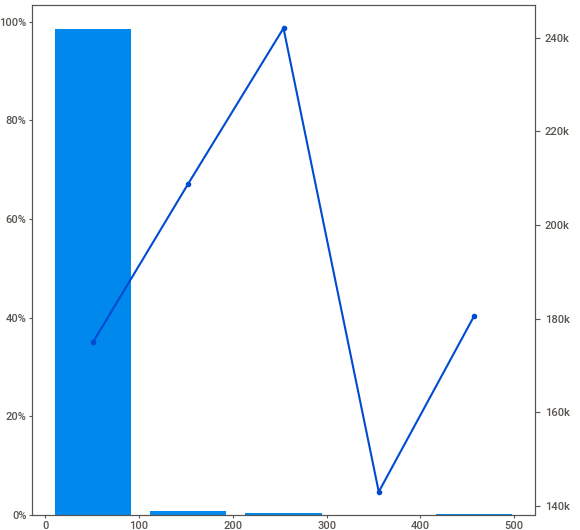
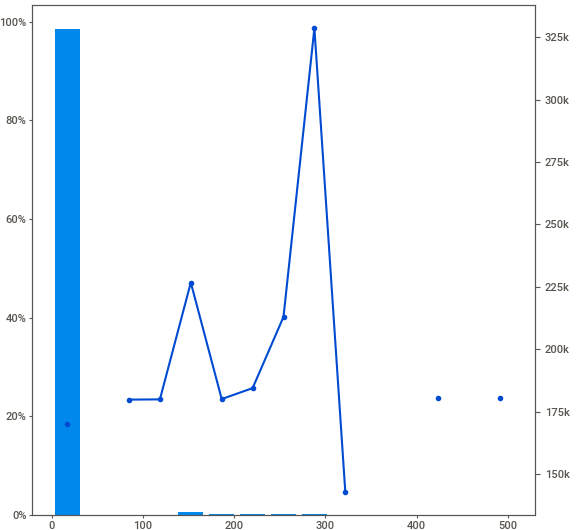
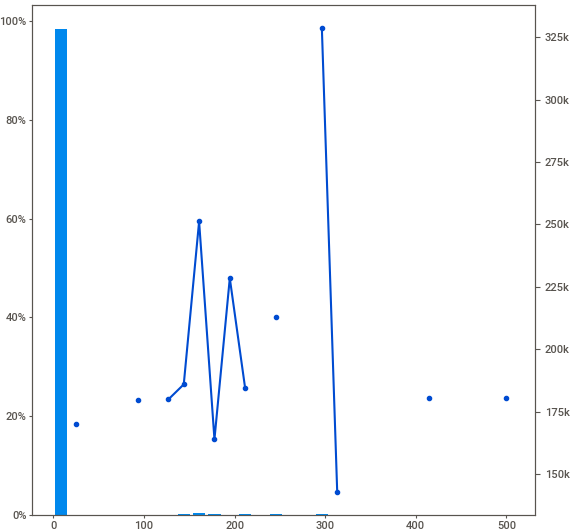
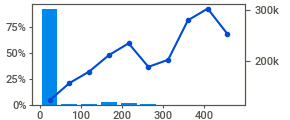
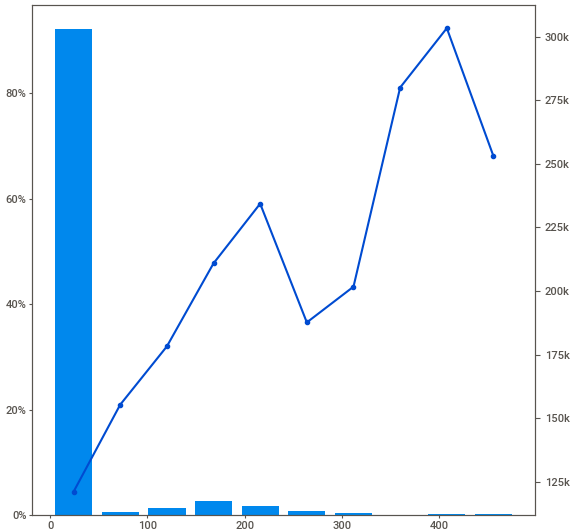
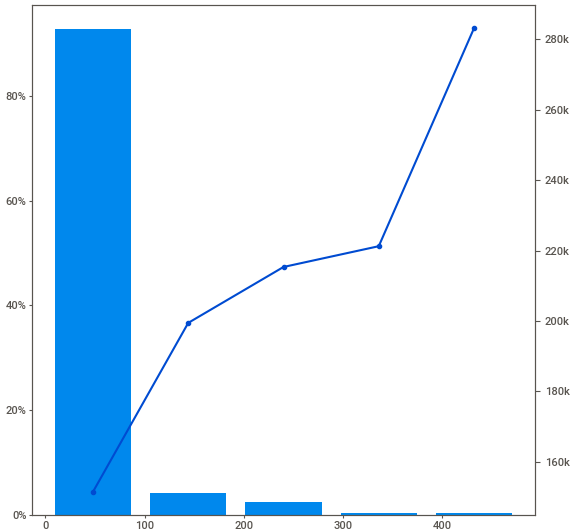
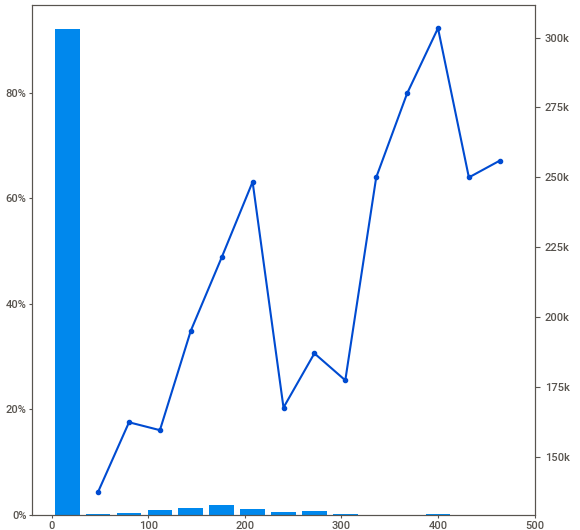
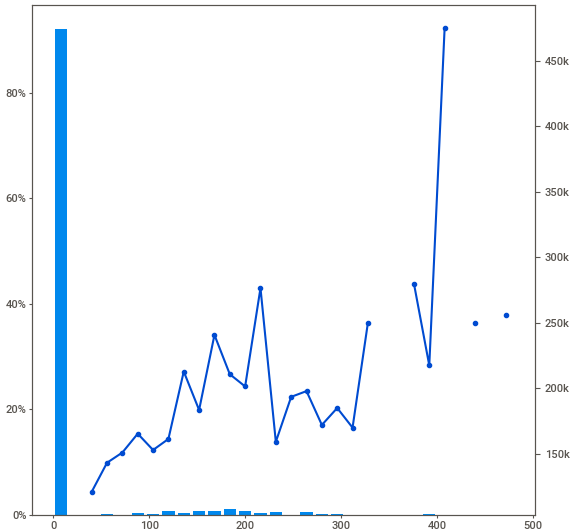
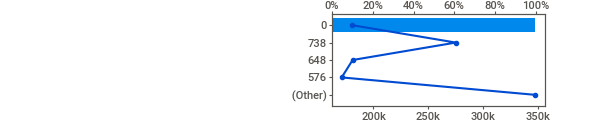
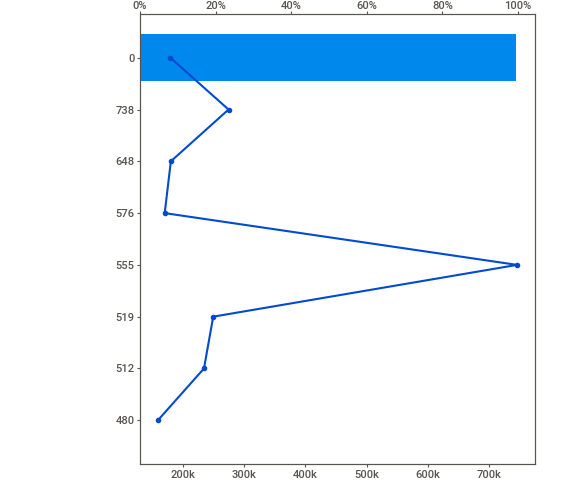
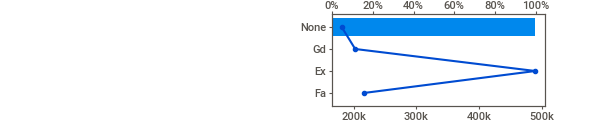
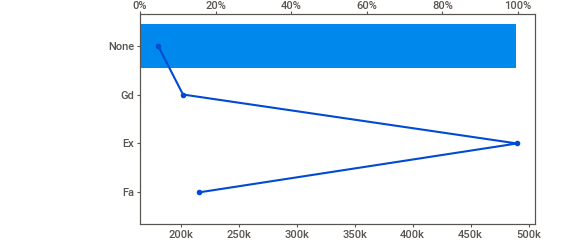
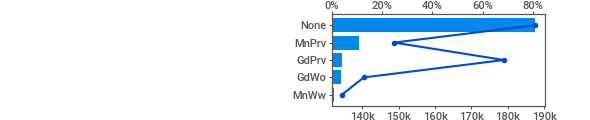
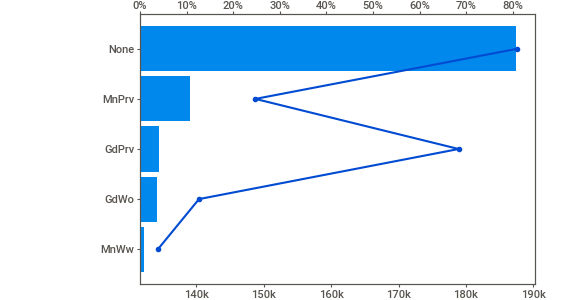
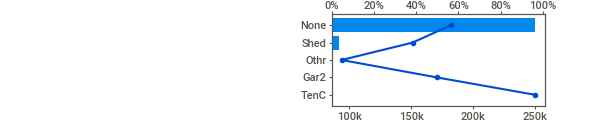
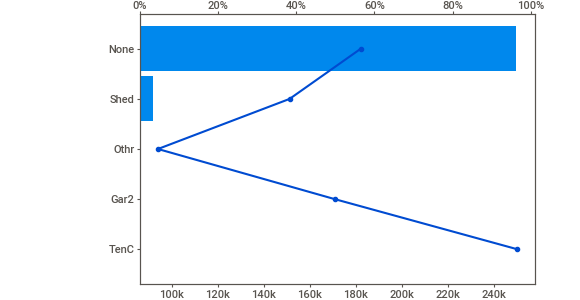
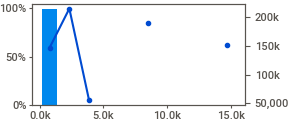
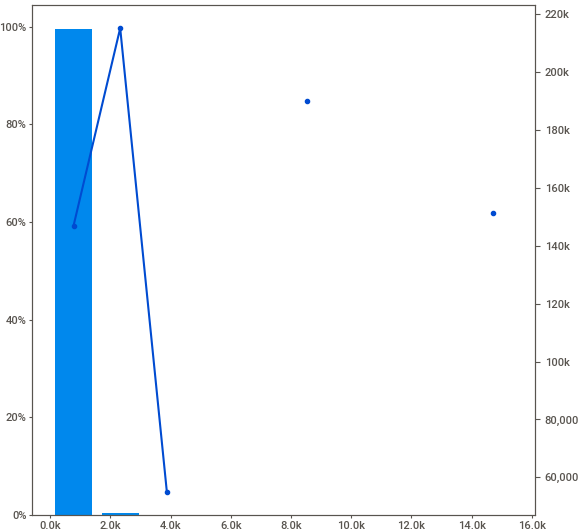
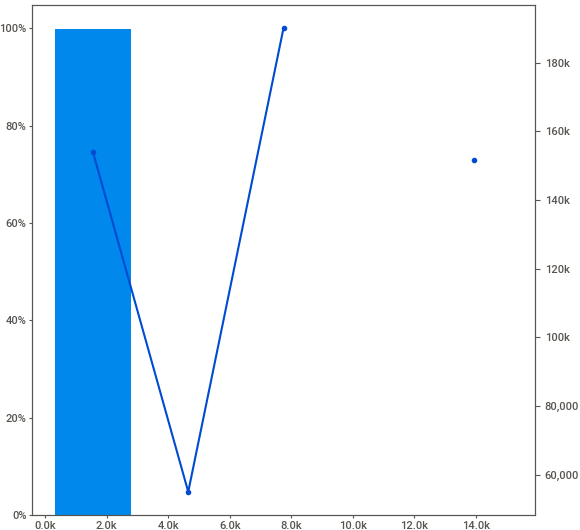
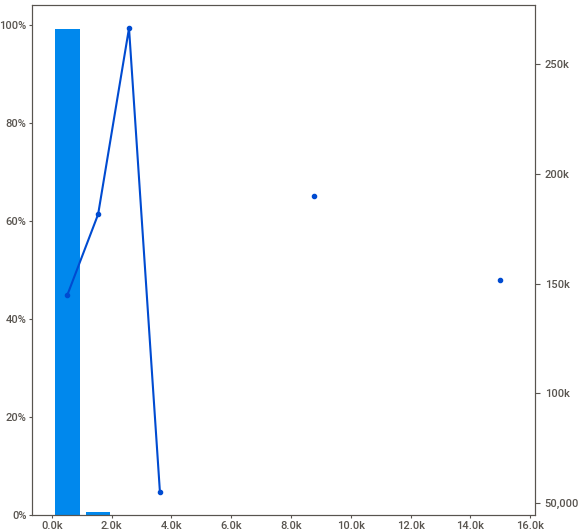
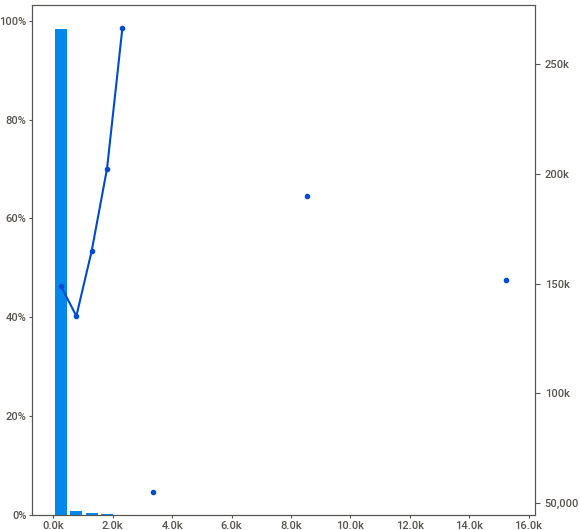
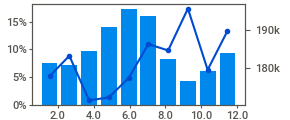
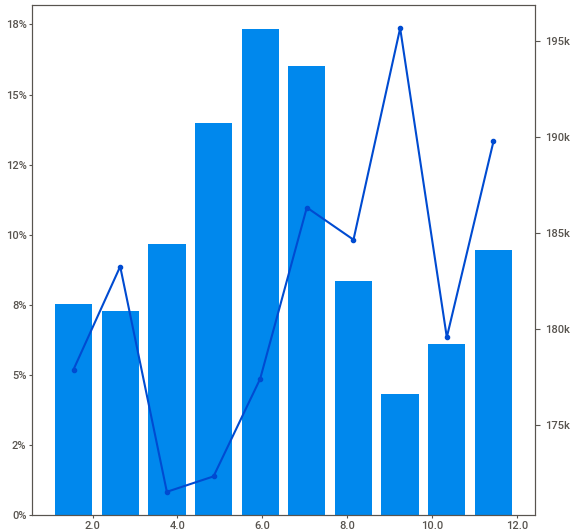
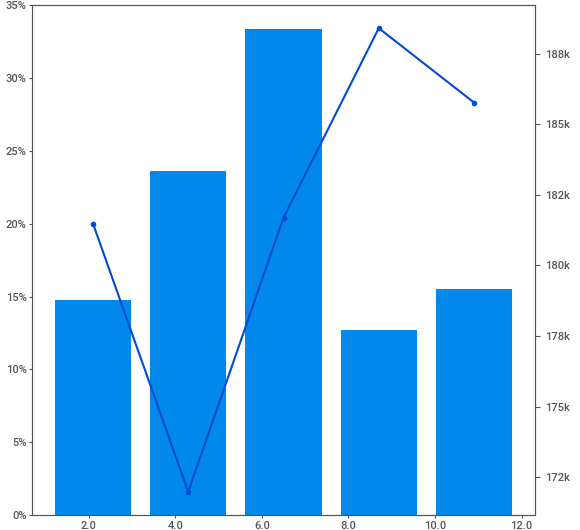
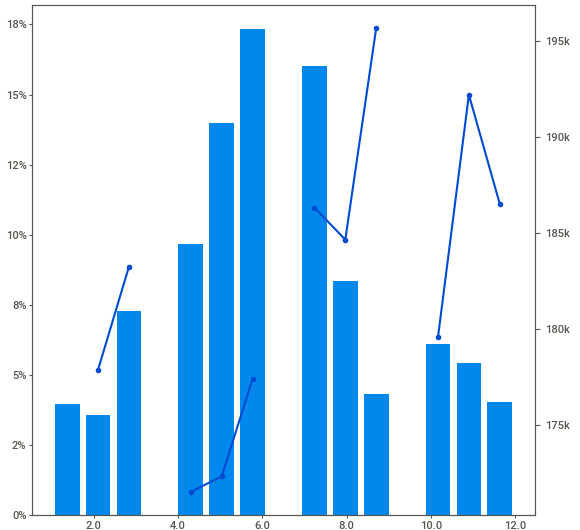
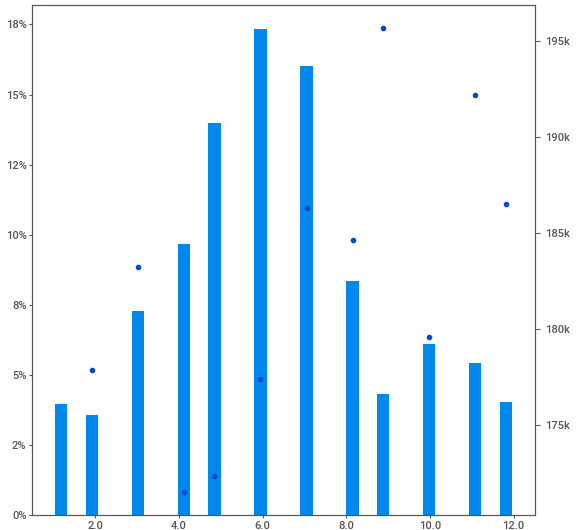
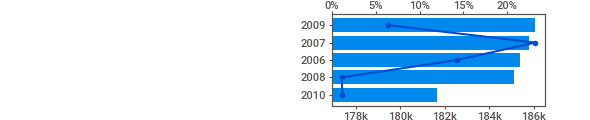
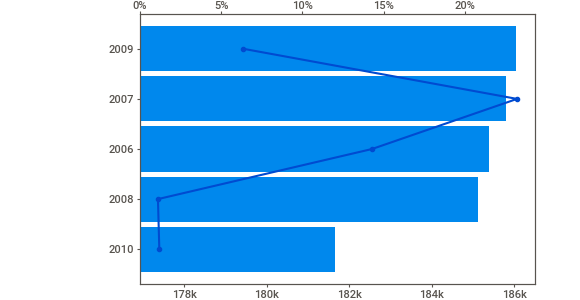
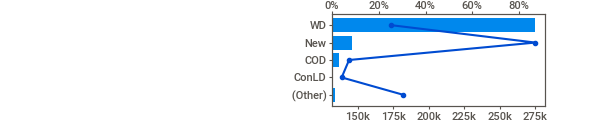
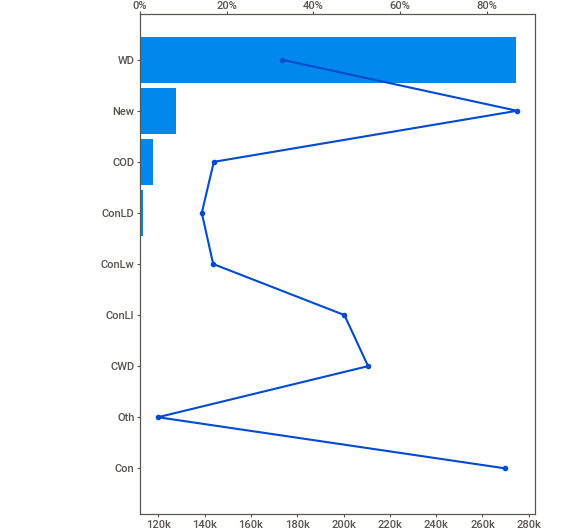
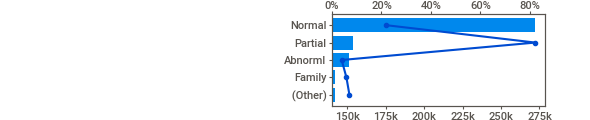
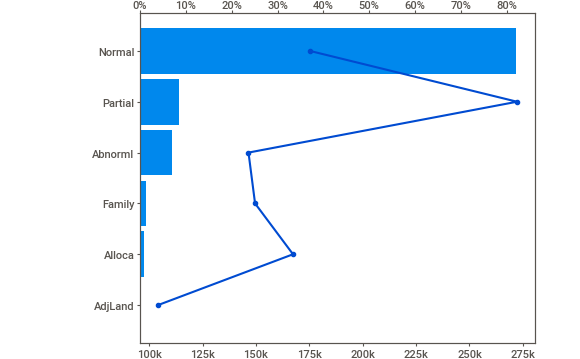
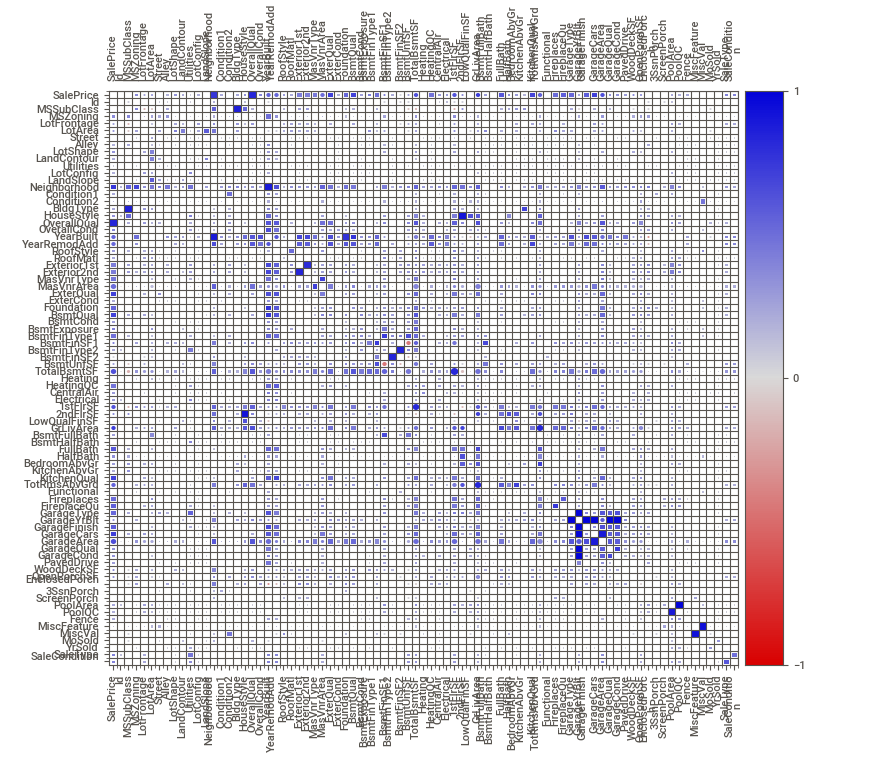
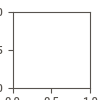

In [19]:
## Produce report from sweetviz
report  = sweetviz.analyze([train,'Train'], target_feat='SalePrice')
report.show_notebook()

<a id='EDAConclusions'></a>
### EDA Conclusions

From our EDA, we have seen the following observations:

1. Our data consists of 1460 houses sold between 2006 and 2010. Each house is described by 81 features, including `SalePrice`, our dependent variable.
2. `SalePrice` has a mean of 180921 but is significantly skewed, with a long right tail. Taking the log of `SalePrice` helps to make this distribution more normal.
3. Many feature have `NaN` values, including but not limited to `Alley`, `MasVnrType`, `BsmtQual`, `GarageType`, `MiscFeature`. Frequently these `NaN` values do not represent missing data but rather indicate additional information about the sold house. For instance, `NaN` value in `BsmtQual` indicate that the house does not have a basement.
4. Some variables are more highly correlated with `SalePrice` than others. For instance, `OverallQual`, `TotalBsmtSF`, `1stFlrSF`, `GrLivArea`, `GarageCars`, and `GarageArea` are highly correlated with `SalePrice` and will likely play a large role in our models. 
5. Some variables are highly correlated with each other, including `GarageCars` and `GarageArea`. We should be careful about multicollinearity when including both of these in our models.
6. `GrLivArea` should be logged when we perform our analysis in order to strengthen the linear relationship with `SalePrice`. This helps to reduce the extremity of several outliers.

<a id='FeatureSelectionandEngineering'></a>
## Feature Selection and Engineering

Based on our explanatory data analysis, we came up with a list of variables that likely have the most explanatory power in predicting housing prices. We also came up with a secondary list of variables that have some explanatory power but not as much as the original list.

<a id='DependentVariable'></a>
### Dependent Variable

Because the `SalePrice` variable is significantly skewed with a long right tail, taking the log of this variable will likely produce better regression results. When this variable is logged, its distribution is approximately normal. We can create models using both the logged and non-logged versions but expect the regressions with `log(Saleprice)` to perform significantly better.

<a id='BestCovariates'></a>
### Best Covariates
* MSSubClass
* MSZoning
* LotArea (quantitative)
* Neighborhood **
* HouseStyle
* OverallQual ** (quantitative or qualitative)
* OverallCond (quantitative or qualitative)
* ExterQual (quantitative or qualitative)
* BsmtQual (quantitative or qualitative)
* TotalBsmtSF (quantitative)
* HeatingQC
* CentralAir
* 1stFlrSF (quantitative)
* GrLivArea (logged) (quantitative)
* FullBath (qualitative or quantitative)
* GarageArea (quantitative)
* KitchenQual (quantitative or qualitative)
* TotRmsAbvGrd (quantitative or qualitative)

These variables are a mix between qualitative and quantitative variables. Some variables, like OverallQual and OverallCond are on a numeric scale but could be considered as ordinal qualitative variables. In our regressions, we will experiment with using the variables like this in both ways. Additionally, the variables marked with ** likely have a great amount of predictive power and should definitely be used in any analysis.

<a id='OkayCovariates'></a>
### Okay Covariates
* LotFrontage
* BldgType
* YearBuilt
* YearRemodAdd
* Exterior1st
* MasVnrType
* ExterCond
* Foundation
* BsmtCond
* Heating
* Electrical
* 2ndFlrSF
* Fireplaces
* GarageYrBlt
* GarageCars 
* SaleType

In [20]:
selected_vars = ['MSSubClass', 'MSZoning', 'LotArea', 'Neighborhood', 'HouseStyle', 'OverallQual',
                'OverallCond', 'ExterQual', 'BsmtQual', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', '1stFlrSF',
                'GrLivArea', 'FullBath', 'GarageArea', 'KitchenQual', 'TotRmsAbvGrd']

<a id='NormalizeQuantitativeVariables'></a>
### Normalize Quantitative Variables

Many of the models we construct will be sensitive to the scale of our features. Therefore, it is important to normalize the data. We use the function below to perform this normalization.

In [21]:
def normalize_data(data, x_bool):
    # if the data consists of our x variables, only normalize the quantitative variables:
    if x_bool:
        new_quantitative_vars = (data[quantitative_vars] - data[quantitative_vars].mean()) / data[quantitative_vars].std()
        return data[qualitative_vars].join(new_quantitative_vars)
    else:
        return (data - data.mean()) / data.std()

In [22]:
train_norm = normalize_data(train, 1)
test_norm = normalize_data(test, 1)

In [23]:
test_norm.shape

(1459, 79)

In [24]:
train_norm.shape

(1460, 79)

<a id='OneHotEncoding'></a>
### One Hot Encoding

Because many of our variables are qualitative, we need to apply one-hot encoding for the variables to be usable in a regression.

In [25]:
# Create the One Hot Encoder
# Use the one hot encoder with the normalized data
# Set handle_unknown to 'ignore' in order to handle unseen qualitative values in the test data
enc = OneHotEncoder(sparse = False, handle_unknown = 'ignore')
transformed = enc.fit_transform(train_norm[qualitative_vars])
train_transformed = pd.DataFrame(transformed, columns = enc.get_feature_names(qualitative_vars))
train_transformed[quantitative_vars] = train[quantitative_vars]

# Tranform the test data using the one hot encoder
test_transformed = enc.transform(test_norm[qualitative_vars])
test_transformed = pd.DataFrame(test_transformed, 
                                columns = enc.get_feature_names(qualitative_vars))
test_transformed[quantitative_vars] = test[quantitative_vars]

In [26]:
## Display the shape of the dataframe after the one-hot encoding
train_transformed.shape

(1460, 332)

In [27]:
## Display the columns created for the one-hot encoding
train_transformed.columns

Index(['MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45',
       'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75',
       'MSSubClass_80', 'MSSubClass_85',
       ...
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'Fireplaces', 'GarageCars', 'MiscVal', 'BsmtFullBath', 'BsmtHalfBath'],
      dtype='object', length=332)

We can select the subset of variables based on the covariates we expect to be the best predictors:

In [28]:
selected_features_transformed = []
[[selected_features_transformed.append(col) for col in 
train_transformed.columns if feature in col] for feature in ['MSSubClass', 'MSZoning', 
                                                             'Neighborhood', 'HouseStyle',
                                                             'HeatingQC', 'CentralAir',
                                                             'ExterQual', 'BsmtQual',
                                                             'KitchenQual']]

train_subset_transformed = train_transformed[selected_features_transformed]
train_subset_transformed[['LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 
                   '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd']] = train[['LotArea', 'OverallQual', 
                                                                                  'OverallCond', 'TotalBsmtSF', 
                   '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd']];

selected_features_transformed = []
[[selected_features_transformed.append(col) for col in 
test_transformed.columns if feature in col] for feature in ['MSSubClass', 'MSZoning', 
                                                             'Neighborhood', 'HouseStyle',
                                                             'HeatingQC', 'CentralAir',
                                                             'ExterQual', 'BsmtQual',
                                                             'KitchenQual']]
test_subset_transformed = test_transformed[selected_features_transformed]
test_subset_transformed[['LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 
                   '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd']] = test[['LotArea', 'OverallQual', 
                                                                                  'OverallCond', 'TotalBsmtSF', 
                   '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd']];

In [29]:
train_subset_transformed.shape

(1460, 81)

<a id='AdditionalFeatureEngineering'></a>
### Additional Feature Engineering

We add one feature, bedrooms per 1000 square feet above ground. Additionally, we tranform `GrLivArea` to be logged.

In [30]:
# n bedrooms above ground per 1000 sq ft above ground
train_transformed['BedroomAbvGr_Per_GrLivArea1000'] = train_transformed['BedroomAbvGr'] / train_transformed['GrLivArea'] * 1000
train_subset_transformed['BedroomAbvGr_Per_GrLivArea1000'] = train_transformed['BedroomAbvGr'] / train_transformed['GrLivArea'] * 1000

# n bedrooms above ground per 1000 sq ft above ground
test_transformed['BedroomAbvGr_Per_GrLivArea1000'] = test_transformed['BedroomAbvGr'] / test_transformed['GrLivArea'] * 1000
test_subset_transformed['BedroomAbvGr_Per_GrLivArea1000'] = test_transformed['BedroomAbvGr'] / test_transformed['GrLivArea'] * 1000

# Log GrLivArea to address outliers in training data
train_transformed['GrLivArea'] = np.log(train_transformed['GrLivArea'])
train_subset_transformed['GrLivArea'] = np.log(train_subset_transformed['GrLivArea'])

# Log GrLivArea to address outliers in testing data
test_transformed['GrLivArea'] = np.log(test_transformed['GrLivArea'])
test_subset_transformed['GrLivArea'] = np.log(test_subset_transformed['GrLivArea'])

In [31]:
## Print out the shape of the transformed dataset
train_transformed.shape

(1460, 333)

<a id='TrainingandDevelopmentSets'></a>
### Training & Development Sets

We created training, development, and testing sets to use when building models with our data. We decided to reserve 15% of the data for the testing set and 15% of the remaining data for the development set.

In [32]:
## Create a function to train the data into a training 
## and a testing dataset
def create_train_test_split(X, y, test_prop, random_seed):
    # Set the random seed for consistency
    np.random.seed(random_seed)
    
    # Perform Split
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = test_prop)
    return x_train, x_test, y_train, y_test

In [33]:
# Set the random seed for consistency
np.random.seed(123)

# Define proportions for test and dev datasets
test_prop = 0.15
dev_prop = 0.15

# With all variables
x_train, x_test, y_train, y_test = train_test_split(train_transformed, train['SalePrice'],
                                                   test_size = test_prop)
x_train, x_dev, y_train, y_dev = train_test_split(x_train, y_train, test_size = dev_prop)

# With a subset of variables
x_train_subset, x_test_subset, y_train_subset, y_test_subset = train_test_split(train_subset_transformed, train['SalePrice'],
                                                   test_size = test_prop)
x_train_subset, x_dev_subset, y_train_subset, y_dev_subset = train_test_split(x_train_subset, y_train_subset, test_size = dev_prop)

In [34]:
## Display the shape of the training data
x_train.shape

(1054, 333)

<a id='ModelCreationandEvaluation'></a>
## Model Creation and Evaluation

There are many different models we can build to regress our covariates on `SalePrice`. Starting simple, we chose to create some linear regression models. We created the models varying both transformations on `SalePrice` and the amount of regularization. We used the raw values of `SalePrice` and also the logged values. To vary the amount of regularization, we built normal Linear Regression models, Ridge Regression models, and Lasso Regression models. We used the development set to evaluate each model and chose the root mean squared error to compare the models. We will be using the RMSE metric to measure model performance because it is more robust to comparisons across model types.

<a id='LinearRegressionModels'></a>
### Linear Regression Models (with and without Regularization)

Define the values to store in the data frame:

In [35]:
result_cols = ['RMSE', 'Model Type', 'Logged', 'Variables', 'CV Used', 'Best Alpha']

Define all the options for running linear models:

In [36]:
model_types = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
logged_options = [0, 1]
variable_options = ['all', 'selected']
cv_used_options = {'Linear Regression' : [0], 'Ridge Regression' : [0, 1], 'Lasso Regression' : [0, 1]}

Helper function for running linear regressions:

In [37]:
def run_linear_regression(x_train, y_train, x_dev, y_dev, logged):
    # Create Linear Model
    lin_mod = LinearRegression()
    
    # Fit Linear Model using the training data
    lin_mod.fit(x_train, y_train)
    
    # Make predictions on the dev set
    lin_mod_predictions = lin_mod.predict(x_dev)
    
    # Calculate and return the RMSE (and transform the predictions if y_train is logged)
    if logged:
        lin_mod_RMSE = np.sqrt(mean_squared_error(y_dev, np.exp(lin_mod_predictions)))
    else:
        lin_mod_RMSE = np.sqrt(mean_squared_error(y_dev, lin_mod_predictions))
    
    # Return the RMSE
    return lin_mod_RMSE

Helper function for running Ridge Regressions:

In [38]:
def run_ridge_regression(x_train, y_train, x_dev, y_dev, logged):
    #### NO CROSS VALIDATION
    
    # Create and fit Ridge Model on training data without optimized alpha
    ridge_mod = Ridge(max_iter = 100000)
    ridge_mod.fit(x_train, y_train)
    
    # Make predictions on the dev set
    ridge_mod_predictions = ridge_mod.predict(x_dev)
    
    # Calculate and return the RMSE (and transform the predictions if y_train is logged)
    if logged:
        ridge_mod_RMSE = np.sqrt(mean_squared_error(y_dev, np.exp(ridge_mod_predictions)))
    else:
        ridge_mod_RMSE = np.sqrt(mean_squared_error(y_dev, ridge_mod_predictions))

    
    #### WITH CROSS VALIDATION
    
    # Create and fit Cross Validation Model, find best alpha
    alpha_min = 0.0001
    alpha_max = 10
    ridge_CV = RidgeCV(alphas = np.linspace(alpha_min, alpha_max, num = 1000), 
                       normalize = True).fit(x_train, y_train)
    best_alpha_opt = ridge_CV.alpha_

    # Create and fit Ridge Model on training data with optimized alpha
    ridge_mod_opt = Ridge(alpha = best_alpha_opt, max_iter = 100000)
    ridge_mod_opt.fit(x_train, y_train)
    
    # Make predictions on the dev set
    ridge_mod_opt_predictions = ridge_mod_opt.predict(x_dev)
    
    # Calculate and return the RMSE and best alpha (and transform the predictions if y_train is logged)
    if logged:
        ridge_mod_opt_RMSE = np.sqrt(mean_squared_error(y_dev, np.exp(ridge_mod_opt_predictions)))
    else:
        ridge_mod_opt_RMSE = np.sqrt(mean_squared_error(y_dev, ridge_mod_opt_predictions))
    
    # Return the RMSE, optimal alpha, and optimized RMSE
    return ridge_mod_RMSE, best_alpha_opt, ridge_mod_opt_RMSE

Helper function for running Lasso Regressions:

In [39]:
def run_lasso_regression(x_train, y_train, x_dev, y_dev, logged):
    #### NO CROSS VALIDATION
    
    # Create and fit Lasso Model on training data without optimized alpha
    lasso_mod = Lasso(max_iter = 100000, tol = 1e-2)
    lasso_mod.fit(x_train, y_train)
    
    # Make predictions on the dev set
    lasso_mod_predictions = lasso_mod.predict(x_dev)
    
    # Calculate and return the RMSE (and transform the predictions if y_train is logged)
    if logged:
        lasso_mod_RMSE = np.sqrt(mean_squared_error(y_dev, np.exp(lasso_mod_predictions)))
    else:
        lasso_mod_RMSE = np.sqrt(mean_squared_error(y_dev, lasso_mod_predictions))
        
    
    #### WITH CROSS VALIDATION
    
    # Create and fit Cross Validation Model, find best alpha
    alpha_min = 0.0001
    alpha_max = 100
    lasso_CV = LassoCV(alphas = np.linspace(alpha_min, alpha_max, num = 5000), 
                       tol=1e-1, max_iter=10000, normalize = True).fit(x_train, y_train)
    best_alpha_opt = lasso_CV.alpha_

    # Create and fit Ridge Model on training data with optimized alpha
    lasso_mod_opt = Lasso(max_iter = 100000, tol=1e-2, alpha = best_alpha_opt)
    lasso_mod_opt.fit(x_train, y_train)
    
    # Make predictions on the dev set
    lasso_mod_opt_predictions = lasso_mod_opt.predict(x_dev)
    
    # Calculate and return the RMSE and best alpha (and transform the predictions if y_train is logged)
    if logged:
        lasso_mod_opt_RMSE = np.sqrt(mean_squared_error(y_dev, np.exp(lasso_mod_opt_predictions)))
    else:    
        lasso_mod_opt_RMSE = np.sqrt(mean_squared_error(y_dev, lasso_mod_opt_predictions))
    
    # Return the RMSE, optimal alpha, and optimized RMSE
    return lasso_mod_RMSE, best_alpha_opt, lasso_mod_opt_RMSE

In [40]:
def run_all_linear_models(x_train, y_train, x_dev, y_dev, 
                          x_train_subset, y_train_subset, x_dev_subset, y_dev_subset):

    # Create empty data frame to store model results in
    all_results = pd.DataFrame(columns = result_cols)

    # Loop through all possible models, according to model type, logging SalePrice, variable selection
    for model_type in model_types:
        for logged in logged_options:
            for variables in variable_options:

                # Select the proper set of variables to pass into the helper function
                if variables == 'all':
                    x_train_use = x_train
                    y_train_use = y_train
                    x_dev_use = x_dev
                    y_dev_use = y_dev
                else:
                    x_train_use = x_train_subset
                    y_train_use = y_train_subset
                    x_dev_use = x_dev_subset
                    y_dev_use = y_dev_subset

                # Log y_train_use if needed        
                if logged == 1:
                    y_train_use = np.log(y_train_use)

                # Run the appropriate model type by passing the data into the helper functions
                # Append results to the all_results data frame
                if model_type == 'Linear Regression':
                    RMSE = run_linear_regression(x_train_use, y_train_use, x_dev_use, y_dev_use, logged)
                    all_results = all_results.append(pd.DataFrame([RMSE, model_type, logged, variables, 0, np.nan],
                                                                  index = result_cols).T)
                elif model_type == 'Ridge Regression':
                    RMSE, alpha, RMSE_opt = run_ridge_regression(x_train_use, y_train_use, 
                                                                 x_dev_use, y_dev_use, logged)
                    all_results = all_results.append(pd.DataFrame([RMSE, model_type, logged, variables, 0, np.nan],
                                                                  index = result_cols).T)
                    all_results = all_results.append(pd.DataFrame([RMSE_opt, model_type, logged, variables, 1, alpha],
                                                                  index = result_cols).T)
                else: # model_type == 'Lasso Regression'
                    RMSE, alpha, RMSE_opt = run_lasso_regression(x_train_use, y_train_use, x_dev_use, y_dev_use, logged)
                    all_results = all_results.append(pd.DataFrame([RMSE, model_type, logged, variables, 0, np.nan],
                                                                  index = result_cols).T)
                    all_results = all_results.append(pd.DataFrame([RMSE_opt, model_type, logged, variables, 1, alpha],
                                                                  index = result_cols).T)
                

    return all_results

In [41]:
# Run all linear models and sort the results by RMSE score
all_results = run_all_linear_models(x_train, y_train, x_dev, y_dev,
                                    x_train_subset, y_train_subset, x_dev_subset, y_dev_subset)
all_results.sort_values(by = 'RMSE').reset_index(drop = True)

RMSE         Model Type Logged Variables CV Used Best Alpha
0   23059.3   Lasso Regression      1       all       1     0.0001
1   24145.3   Ridge Regression      1       all       0        NaN
2   24213.7   Ridge Regression      1       all       1   0.490586
3   24683.3  Linear Regression      1       all       0        NaN
4   25740.9   Lasso Regression      0       all       1    37.3675
5     26357   Lasso Regression      0       all       0        NaN
6   26512.3  Linear Regression      0       all       0        NaN
7   26589.2   Ridge Regression      1  selected       0        NaN
8   26689.2   Lasso Regression      1  selected       1     0.0001
9   26772.9   Ridge Regression      1  selected       1  0.0101099
10  26775.6  Linear Regression      1  selected       0        NaN
11  27524.2   Ridge Regression      0       all       1   0.720814
12  27593.5   Ridge Regression      0       all       0        NaN
13  33020.2   Lasso Regression      1       all       0        NaN
14    33848   Ridge Regression      0  selected       0        NaN
15  33908.8   Lasso Regression      0  selected       1    10.8823
16  33934.1   Ridge Regression      0  selected       1   0.220318
17    33969   Lasso Regression      0  selected       0        NaN
18  33971.9  Linear Regression      0  selected       0        NaN
19  58662.5   Lasso Regression      1  selected       0        NaN

In [42]:
# Prepare data for plotting

# Copy the results dataframe
all_results_plot = all_results[all_results['Variables'] == 'all'].copy()

# Define 1 variable as the unique model type for each run
all_results_plot['Model'] = all_results_plot["Model Type"] + all_results_plot["Logged"].astype(str) + \
                            all_results_plot['CV Used'].astype(str)

# Sort the models by RMSE
all_results_plot = all_results_plot.sort_values(by = 'RMSE').reset_index().drop(columns = 'index')

# Define plotting variables: standardized model type, hatching value based on CV, color based on logged
all_results_plot['Model Type'] = all_results_plot['Model Type'].str.split(' ').str[0]
all_results_plot['hatch'] = np.where(all_results_plot['CV Used'] == 1, '/', '')
all_results_plot['color'] = np.where(all_results_plot['Logged'] == 1, 'darkcyan', 'paleturquoise')

findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans.


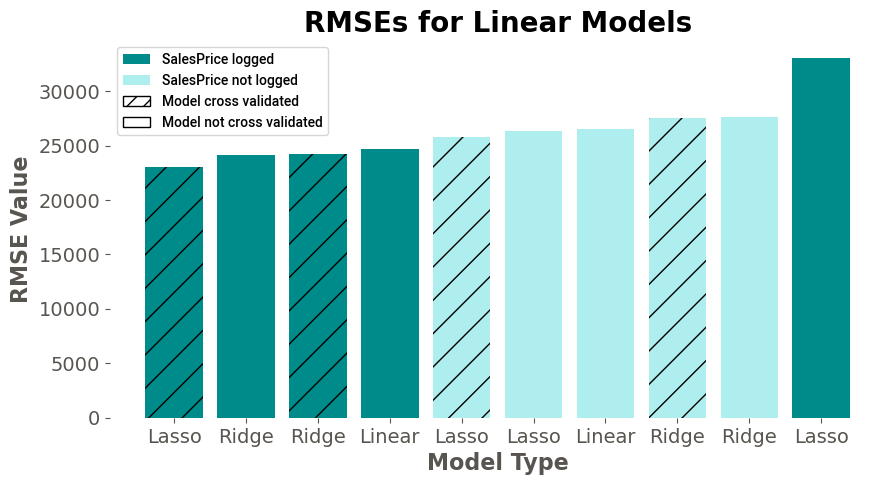

In [43]:
# Create a figure
fig, ax = plt.subplots(figsize = (10, 5))

# Remove the borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Plot the RMSE bars
bars = plt.bar(x = all_results_plot['Model'], height = all_results_plot['RMSE'], color = all_results_plot['color']);

# Redefine the xticks as the standardized model type
plt.xticks(all_results_plot['Model'], all_results_plot['Model Type']);

# Apply hatches to CV models
for i in range(all_results_plot.shape[1]):
    hatch_val = all_results_plot.loc[i, 'hatch']
    if hatch_val != '':
        bars[i].set(hatch = hatch_val)

# Define the legend, add legend to plot   
legend_elements = [Patch(facecolor='darkcyan',
                         label='SalesPrice logged'),
                   Patch(facecolor='paleturquoise',
                         label='SalesPrice not logged'),
                   Patch(facecolor='white', hatch = '//', edgecolor = 'black',
                         label='Model cross validated'),
                   Patch(facecolor='white', edgecolor = 'black',
                         label='Model not cross validated')]  
ax.legend(handles = legend_elements)

# Define plot font, change fonts of axis ticks
new_font = {'fontname':'Avenir'}
plt.xticks(**new_font, fontsize = 14)
plt.yticks(**new_font, fontsize = 14)

# Add title and axis label
plt.title('RMSEs for Linear Models',**new_font, fontsize = 20, fontweight = 'bold')
plt.xlabel('Model Type', **new_font, fontsize = 16, fontweight = 'bold')
plt.ylabel('RMSE Value', **new_font, fontsize = 16, fontweight = 'bold')

# Save figure and display in notebook
plt.savefig('linear_model_RMSEs.png', dpi = 100)
plt.show()

The best model on this particular seed is a Lasso Regression (with SalesPrice logged, using all variables, cross validated). Next, we'll vary the seed to see which model is most consistently the top performer.

In [44]:
# Run linear models with many random seeds to confirm that the best model was not found at random
# This code takes a while to run
all_RMSEs = []
all_total_model_type = []
all_best_alpha = []

for seed in range(100, 150):
    try:
        
        # Split the data into training, testing, and dev sets
        x_train, x_test, y_train, y_test = create_train_test_split(train_transformed, train['SalePrice'], 
                                                               0.15, seed)
        x_train, x_dev, y_train, y_dev = create_train_test_split(x_train, y_train, 0.15, seed)

        x_train_subset, x_test_subset, y_train_subset, y_test_subset = create_train_test_split(train_subset_transformed, train['SalePrice'],
                                                                                               0.15, seed)
        x_train_subset, x_dev_subset, y_train_subset, y_dev_subset = create_train_test_split(x_train_subset, y_train_subset, 
                                                                                             0.15, seed)

        # Run all linear models
        all_results = run_all_linear_models(x_train, y_train, x_dev, y_dev,
                                        x_train_subset, y_train_subset, x_dev_subset, y_dev_subset)
        
        # Sort and save results
        all_results = all_results.sort_values(by = 'RMSE').reset_index(drop = True)
        total_model_type = all_results.loc[0, 'Model Type'] + ' - ' + str(all_results.loc[0, 'Logged']) + ' - ' + all_results.loc[0, 'Variables'] + ' - ' + str(all_results.loc[0, 'CV Used'])
        all_total_model_type.append(total_model_type)
        all_RMSEs.append(all_results.loc[0, 'RMSE'])
        all_best_alpha.append(all_results.loc[0, 'Best Alpha'])
    
    except Exception as e:
        # Handle any errors that may come up
        print(e)
        continue

underflow encountered in exp
overflow encountered in exp
underflow encountered in exp
overflow encountered in exp
overflow encountered in exp
overflow encountered in exp
overflow encountered in exp
overflow encountered in exp


In [45]:
# Display results from many runs
# Sort by model with lowest average RMSE
pd.DataFrame(data = {'model_type' : all_total_model_type,
                     'RMSE' : all_RMSEs,
                     'alpha': all_best_alpha}).groupby(all_total_model_type).mean().sort_values(by = 'RMSE')

RMSE      alpha
Lasso Regression - 1 - all - 1        21224.516190   0.000100
Linear Regression - 1 - all - 0       24190.751593        NaN
Ridge Regression - 1 - all - 0        24552.540217        NaN
Linear Regression - 1 - selected - 0  32765.923931        NaN
Lasso Regression - 0 - selected - 1   36941.082835  18.583798
Linear Regression - 0 - selected - 0  46894.410522        NaN

In [46]:
# Display results from many runs
# Display count of models that performed best
pd.DataFrame(data = {'model_type' : all_total_model_type,
                     'RMSE' : all_RMSEs,
                     'alpha': all_best_alpha})['model_type'].value_counts()

Lasso Regression - 1 - all - 1          26
Linear Regression - 1 - all - 0          4
Ridge Regression - 1 - all - 0           4
Linear Regression - 1 - selected - 0     4
Linear Regression - 0 - selected - 0     3
Lasso Regression - 0 - selected - 1      1
Name: model_type, dtype: int64

When we run with many seeds, we find that a lasso regression is most frequently the top performer (about 50% of the time). Lasso performs best when SalePrice is logged, all X variables are used, and cross validation is utilized.

<a id='NonlinearModels'></a>
### Nonlinear Models

Now that we have run and evaluated several linear models, we will also test out various nonlinear models, including random forests, gradient boosted trees, K-nearest neighbors, and neural networks. We will compare their performance to the linear models' performance.

In [47]:
nonlinear_result_cols = ['RMSE', 'Model Type', 'Logged', 'Variables', 'CV Used']
nonlinear_results = pd.DataFrame(columns = nonlinear_result_cols)
nonlinear_model_types = ['Random Forest', 'Gradient Boosted', 'KNN', 'Neural Network']

#### Random Forest Models

Helper model for running random forest regressions:

In [48]:
def run_rf(x_train, y_train, x_dev, y_dev, logged):
    #### NO CROSS VALIDATION
    
    # Create and fit Ridge model on training data without optimized paramaters
    rf_mod = RandomForestRegressor()
    rf_mod.fit(x_train, y_train)
    
    # Make predictions on the dev set
    rf_mod_predictions = rf_mod.predict(x_dev)
    
    # Calculate and return RMSE (and transform preditions if y_train is logged)
    if logged:
        rf_mod_RMSE = np.sqrt(mean_squared_error(y_dev, np.exp(rf_mod_predictions)))
    else:
        rf_mod_RMSE = np.sqrt(mean_squared_error(y_dev, rf_mod_predictions))
        
        
    #### WITH CROSS VALIDATION
    
    hyperparms = dict(n_estimators = [50, 75, 100, 150, 200],
                     max_features = ['sqrt', 'log2', 0.6])
    
    # Define Randomized Search CV Object and fit the object to find best hyperparams
    cv_obj = RandomizedSearchCV(rf_mod, hyperparms, random_state = 123)
    search = cv_obj.fit(x_train, y_train)
    
    # Create and fit new RF object with new hyperparameters
    rf_mod_opt = RandomForestRegressor(n_estimators = search.best_params_['n_estimators'],
                                       max_features = search.best_params_['max_features'])
    rf_mod_opt.fit(x_train, y_train)
    
    
    # Make predictions on the dev set
    rf_mod_opt_predictions = rf_mod_opt.predict(x_dev)
    
    # Calculate and return RMSE (and transform preditions if y_train is logged)
    if logged:
        rf_mod_opt_RMSE = np.sqrt(mean_squared_error(y_dev, np.exp(rf_mod_opt_predictions)))
    else:
        rf_mod_opt_RMSE = np.sqrt(mean_squared_error(y_dev, rf_mod_opt_predictions))
        
    return rf_mod_RMSE, rf_mod_opt_RMSE

In [49]:
def rf_results(nonlinear_results, logged_options, variable_options):
    # Loop through options for logging SalePrice
    for logged in logged_options:
        # Loop through options for x variable set
        for variables in variable_options:

            # Select the proper set of variables to pass into the helper function
            if variables == 'all':
                x_train_use = x_train
                y_train_use = y_train
                x_dev_use = x_dev
                y_dev_use = y_dev
            else:
                x_train_use = x_train_subset
                y_train_use = y_train_subset
                x_dev_use = x_dev_subset
                y_dev_use = y_dev_subset

            # Log y_train_use if needed        
            if logged == 1:
                y_train_use = np.log(y_train_use)

            # Run the RF model type by passing the data into the helper function
            # Append results to the all_results data frame
            RMSE, RMSE_opt = run_rf(x_train_use, y_train_use, x_dev_use, y_dev_use, logged)
            nonlinear_results = nonlinear_results.append(pd.DataFrame([RMSE, 'Random Forest', logged, variables, 0],
                                                              index = nonlinear_result_cols).T)
            nonlinear_results = nonlinear_results.append(pd.DataFrame([RMSE_opt, 'Random Forest', logged, 
                                                                       variables, 1],
                                                              index = nonlinear_result_cols).T)
            
    return nonlinear_results

In [50]:
nonlinear_results = rf_results(nonlinear_results, logged_options, variable_options)

In [51]:
nonlinear_results.sort_values(by = 'RMSE')

RMSE     Model Type Logged Variables CV Used
0  22493.1  Random Forest      0  selected       1
0  22980.8  Random Forest      1  selected       1
0  23619.3  Random Forest      1       all       0
0  23638.6  Random Forest      1       all       1
0  24320.1  Random Forest      0       all       0
0  24758.4  Random Forest      0       all       1
0  25267.1  Random Forest      1  selected       0
0  25289.4  Random Forest      0  selected       0

#### Gradient Boosting Model

Helper model for Gradient Boosted Trees

In [52]:
# Create, fit, and evaluate Gradient Boosing Model using all covariates, no transformation to SalePrice
print("Gradient Boosting Model")

## Define a function which will determine a best GB (Gradient Boost) model
def run_gb_mod(x_train, y_train, x_dev, y_dev):

    ## Set all of the hyperparameters to loop through
    losses = ["ls",  ## Squared error
              "lad", ## Absolute error
              "huber", 
              "quantile"]
    criteria = ["friedman_mse", 
                "mse", 
                # "mae" ## do not run, takes too long and wasn't the best
                ]
    n_estimators_list = [25, 50, 100, 250, 500]
    max_depths = list(range(1, 5))
    max_features_list = ["auto", "sqrt", "log2"]

    ## Init some variables to keep track of the best configuration
    best_RMSE = sys.maxsize
    best_loss = None
    best_criterion = None
    best_max_depth = 0
    best_n_est = 0
    best_max_features = None

    ## Loop through all of the sets of hyperparameters
    for loss in losses:
        for criterion in criteria:
            for n_estimators in n_estimators_list:
                for max_depth in max_depths:
                    for max_features in max_features_list:

                        ## Print out the parameters for the current configuration
                        # print("loss={}, criterion={}, n_est={}, max_depth={}, max_features={}".format(loss, 
                        #                                                             criterion,
                        #                                                             n_estimators, 
                        #                                                             max_depth,
                        #                                                             max_features))

                        ## Create a GB model within the current hyperparameters
                        gb_mod = GradientBoostingRegressor(random_state=123,
                                                          loss=loss,
                                                          criterion=criterion,
                                                          n_estimators=n_estimators,
                                                          max_depth=max_depth,
                                                          max_features=max_features)
                        
                        ## Fit the model to the training set and retrieve some predictions
                        gb_mod.fit(x_train, y_train)
                        gb_mod_predictions = gb_mod.predict(x_dev)
                        
                        ## Calulate
                        RMSE = np.sqrt(mean_squared_error(y_dev, gb_mod_predictions))

                        ## If this is the lowest (best) RMSE value to date,
                        ## update our performance tracker variables to reflect this
                        if RMSE < best_RMSE:
                            best_RMSE = RMSE
                            best_loss = loss
                            best_criterion = criterion
                            best_n_est = n_estimators
                            best_max_depth = max_depth
                            best_max_features = max_features

    ## Print out the performance and associated parameters
    print('Best RMSE:\t\t', best_RMSE)
    print("Best GB Config: loss={}, criterion={}, n_ests={}, max_depth={}, max_features={}".format(best_loss, 
                                                                                                   best_criterion,
                                                                                                   best_n_est, 
                                                                                                   best_max_depth,
                                                                                                   best_max_features))
    return best_RMSE


        
print("Full dataset")
RMSE = run_gb_mod(x_train, y_train, x_dev, y_dev)
nonlinear_results = nonlinear_results.append(pd.DataFrame([RMSE, 'Gradient Boost', False, 'all', 0],
                                                              index = nonlinear_result_cols).T)
# print("Subset")
# run_gb_mod(x_train_subset, y_train_subset, x_dev_subset, y_dev_subset)

Gradient Boosting Model
Full dataset
Best RMSE:		 18390.035327059355
Best GB Config: loss=ls, criterion=friedman_mse, n_ests=500, max_depth=3, max_features=auto


#### K Nearest Neighbors Model

Helper model for KNN Regression:

In [53]:
## Create, fit, and evaluate a K-Nearest-Neighbours model 

## Define a function which will determine a best KNN (K Nearest Neighbours) model
def run_knn_mod(x_train, y_train, x_dev, y_dev):

    ## 
    k_values = list(range(1, 10))
    p_values = [1, ## Manhattan distance
                2, ## Euclidean distance
                3] ## l_p distance according to th Minkowski metric
    algorithms = ["ball_tree", 
                  "kd_tree", 
                  "brute"]
    weights = ["uniform",
               "distance"]

    ## Init some variables to keep track of the best configuration
    best_RMSE = sys.maxsize
    best_k = 0
    best_p = 0
    best_alg = None
    best_weight = None

    ## Loop through all hyperparameters
    for p_value in p_values:
        for k_value in k_values:
            for alg in algorithms:
                for weight in weights:
                    
                    ## Create a KNN model with the current hyperparameters
                    knn_mod = KNeighborsRegressor(n_neighbors=k_value, 
                                                p=p_value,
                                                algorithm=alg,
                                                weights=weight)

                    ## Fit said model and retrieve some predictions from it                            
                    knn_mod.fit(x_train, y_train)
                    knn_mod_predictions = knn_mod.predict(x_dev)

                    ## Calculate the RMSE for the current model configuration
                    knn_mod_RMSE = np.sqrt(mean_squared_error(y_dev, knn_mod_predictions))

                    ## If this is the lowest (best) RMSE value to date,
                    ## update our performance tracker variables to reflect this
                    if knn_mod_RMSE < best_RMSE:
                        best_RMSE = knn_mod_RMSE
                        best_k = k_value
                        best_p = p_value
                        best_alg = alg
                        best_weight = weight

    ## Print out the best RMSE and the associated hyperparameters
    print('Best RMSE:\t\t', best_RMSE)
    print("Best KNN Config: k={}, p={}, alg={}, weight={}".format(best_k, 
                                                                  best_p, 
                                                                  best_alg, 
                                                                  best_weight))
    return best_RMSE

print("Full dataset")
RMSE = run_knn_mod(x_train, y_train, x_dev, y_dev)
nonlinear_results = nonlinear_results.append(pd.DataFrame([RMSE, 'KNN', False, 'all', 0],
                                                            index = nonlinear_result_cols).T)
# print("Subset")
# run_knn_mod(x_train_subset, y_train_subset, x_dev_subset, y_dev_subset)

Full dataset
Best RMSE:		 37908.37275044066
Best KNN Config: k=7, p=1, alg=ball_tree, weight=distance


#### Neural Netowrk Model

In [54]:
# Create a Neural Network
nn_model = Sequential()

# Add layers to neural network and compile
nn_model.add(Dense(x_train.shape[1], activation = 'relu'))
nn_model.add(Dense(x_train_subset.shape[1], activation = 'relu'))
nn_model.add(Dense(100, activation = 'relu'))
nn_model.add(Dense(1))
nn_model.compile(optimizer = 'Adam', loss = 'mse')

# Fit the model with training data
nn_model.fit(x_train, y_train, validation_data = (x_dev, y_dev),
          batch_size = 128,
          epochs = 500)

# Make predictions using neural network model
nn_predictions = nn_model.predict(x_dev)

# Calculate RMSE
nn_RMSE = np.sqrt(mean_squared_error(y_dev, nn_predictions))

# Print RMSE
nn_RMSE

# Append RMSE to results dataframe
nonlinear_results = nonlinear_results.append(pd.DataFrame([nn_RMSE, 'Neural Network', 0, 'all', 0],
                                                              index = nonlinear_result_cols).T)

Epoch 1/500
9/9 [==============================] - 1s 24ms/step - loss: 37835808768.0000 - val_loss: 35766530048.0000
Epoch 2/500
9/9 [==============================] - 0s 6ms/step - loss: 35166015488.0000 - val_loss: 31691687936.0000
Epoch 3/500
9/9 [==============================] - 0s 5ms/step - loss: 29623547904.0000 - val_loss: 23870949376.0000
Epoch 4/500
9/9 [==============================] - 0s 5ms/step - loss: 19426355200.0000 - val_loss: 14217732096.0000
Epoch 5/500
9/9 [==============================] - 0s 6ms/step - loss: 10164718592.0000 - val_loss: 14909816832.0000
Epoch 6/500
9/9 [==============================] - 0s 5ms/step - loss: 9505184768.0000 - val_loss: 14292508672.0000
Epoch 7/500
9/9 [==============================] - 0s 6ms/step - loss: 7338608128.0000 - val_loss: 9806716928.0000
Epoch 8/500
9/9 [==============================] - 0s 6ms/step - loss: 6395723264.0000 - val_loss: 7819628032.0000
Epoch 9/500
9/9 [==============================] - 0s 6ms/step - los

Finally we can compare all nonlinear models:

In [56]:
nonlinear_results.sort_values(by = 'RMSE').reset_index(drop = True)

RMSE      Model Type Logged Variables CV Used
0     18390  Gradient Boost  False       all       0
1   22493.1   Random Forest      0  selected       1
2   22980.8   Random Forest      1  selected       1
3   23619.3   Random Forest      1       all       0
4   23638.6   Random Forest      1       all       1
5   24320.1   Random Forest      0       all       0
6   24758.4   Random Forest      0       all       1
7   25267.1   Random Forest      1  selected       0
8   25289.4   Random Forest      0  selected       0
9   27422.2  Neural Network      0       all       0
10  37908.4             KNN  False       all       0

Plot the nonlinear model results:

In [62]:
# Prepare data for plotting

# Copy the results dataframe
nonlinear_results_plot = nonlinear_results[nonlinear_results['Variables'] == 'all'].copy()

# Define 1 variable as the unique model type for each run
nonlinear_results_plot['Model'] = nonlinear_results_plot["Model Type"] + \
                                  nonlinear_results_plot["Logged"].astype(str) + \
                                  nonlinear_results_plot['CV Used'].astype(str)

# Sort the models by RMSE
nonlinear_results_plot = nonlinear_results_plot.sort_values(by = 'RMSE').reset_index(drop = True)

# Define plotting variables: standardized model type, hatching value based on CV, color based on logged
nonlinear_results_plot['Model Type'] = nonlinear_results_plot['Model Type'].str.split(' ').str[0]
nonlinear_results_plot['hatch'] = np.where(nonlinear_results_plot['CV Used'] == 1, '/', '')
nonlinear_results_plot['color'] = np.where(nonlinear_results_plot['Logged'] == 1, 'darkcyan', 'paleturquoise')
nonlinear_results_plot = nonlinear_results_plot[nonlinear_results_plot["CV Used"] == 0] 
nonlinear_results_plot = nonlinear_results_plot[nonlinear_results_plot["Logged"] == 0] 

nonlinear_results_plot

RMSE Model Type Logged Variables CV Used                 Model hatch  \
0    18390   Gradient  False       all       0  Gradient BoostFalse0         
3  24320.1     Random      0       all       0       Random Forest00         
5  27422.2     Neural      0       all       0      Neural Network00         
6  37908.4        KNN  False       all       0             KNNFalse0         

           color  
0  paleturquoise  
3  paleturquoise  
5  paleturquoise  
6  paleturquoise

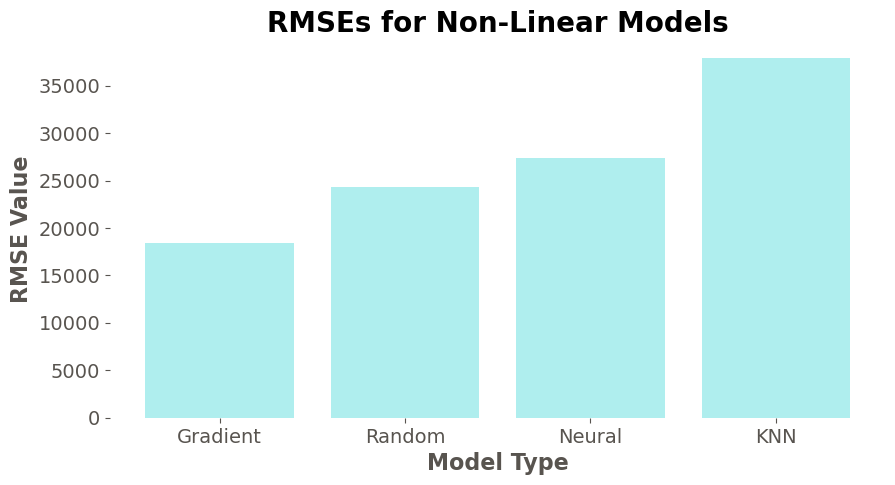

In [69]:
# Create a figure
fig, ax = plt.subplots(figsize = (10, 5))

# Remove the borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Plot the RMSE bars
bars = plt.bar(x = nonlinear_results_plot['Model'], 
               height = nonlinear_results_plot['RMSE'], 
               color = nonlinear_results_plot['color']);

# Redefine the xticks as the standardized model type
plt.xticks(nonlinear_results_plot['Model'], nonlinear_results_plot['Model Type']);

## Apply hatches to CV models
# for i in range(nonlinear_results_plot.shape[1]):
#     hatch_val = nonlinear_results_plot.loc[i, 'hatch']
#     if hatch_val != '':
#         bars[i].set(hatch = hatch_val)

# Define the legend, add legend to plot   
# legend_elements = [Patch(facecolor='darkcyan',
#                          label='SalesPrice logged'),
#                    Patch(facecolor='paleturquoise',
#                          label='SalesPrice not logged'),
#                    Patch(facecolor='white', hatch = '//', edgecolor = 'black',
#                          label='Model cross validated'),
#                    Patch(facecolor='white', edgecolor = 'black',
#                          label='Model not cross validated')]  
# ax.legend(handles = legend_elements)

# Define plot font, change fonts of axis ticks
new_font = {'fontname':'Avenir'}
plt.xticks(**new_font, fontsize = 14)
plt.yticks(**new_font, fontsize = 14)

# Add title and axis label
plt.title('RMSEs for Non-Linear Models',**new_font, fontsize = 20, fontweight = 'bold')
plt.xlabel('Model Type', **new_font, fontsize = 16, fontweight = 'bold')
plt.ylabel('RMSE Value', **new_font, fontsize = 16, fontweight = 'bold')

# Save figure and display in notebook
plt.savefig('nonlinear_model_RMSEs.png', dpi = 100)
plt.show()

<a id='NextSteps'></a>
## Final Predictions & Conclusions

After going through the creation, optimization, and evaluation of both linear and nonlinear models, we select the best-performing model from each to evaluate on our "test" data set (that was created in the train-test split) and test data set provided by Kaggle for submission to Kaggle.

### Best Linear Model

Our best linear model was a Lasso Regression using the cross-validated alpha of 0.001. The test RMSE is 17,332, and the test RMLSE (root mean squared log error) is 0.087. We evaluate on the RMLSE in addition to the RMSE because this is the metric that Kaggle uses to score submissions.

In [71]:
final_mod = Lasso(alpha = 0.0001, max_iter = 100000, tol = 1e-2)
final_mod.fit(train_transformed, np.log(train['SalePrice']))
test_predictions = np.exp(final_mod.predict(x_test))
print("Test RMSE:\t", np.sqrt(mean_squared_error(y_test, test_predictions)))
print("Test RMSLE:\t", np.sqrt(mean_squared_log_error(y_test, test_predictions)))

kaggle_predictions = np.exp(final_mod.predict(test_transformed))
pd.DataFrame(data = {'Id' : test['Id'],
                     'SalePrice' : kaggle_predictions,}).to_csv('linear_predictions.csv', index = False)

Test RMSE:	 17574.12999823964
Test RMSLE:	 0.08866524696333083


### Best Nonlinear Model

Our best nonlinear model was the Gradient Boosted Regressor. We found that the best model used the following hyperparameters: loss=ls, criterion=friedman_mse, n_ests=500, max_depth=3, max_features=auto. The RMSE is 6664.52, and the RMLSE is 0.04467.

In [72]:
final_mod = GradientBoostingRegressor(random_state=123,
                                   loss='ls',
                                   criterion='friedman_mse',
                                   n_estimators=500,
                                   max_depth=3,
                                   max_features='auto')
final_mod.fit(train_transformed, train['SalePrice'])
test_predictions = final_mod.predict(x_test)
print("Test RMSE:\t", np.sqrt(mean_squared_error(y_test, test_predictions)))
print("Test RMSLE:\t", np.sqrt(mean_squared_log_error(y_test, test_predictions)))

test_predictions = final_mod.predict(test_transformed)
pd.DataFrame(data = {'Id' : test['Id'],
                     'SalePrice' : test_predictions,}).to_csv('nonlinear_predictions.csv', index = False)

Test RMSE:	 6664.522884475971
Test RMSLE:	 0.04467061679467662


When we submitted each to Kaggle, the Gradient Boosted Regressor ended up performing better, with a final RMLSE of __fill in number___, compared to ___fill in number___ for the Lasso model. This score ended up being in the 72nd percentile of Kaggle submissions. 

<a id='Appendix'></a>
## Appendix

<a id='AdditionalEDA'></a>
### Additional EDA

<a id='MSSubClass'></a>
#### MSSubClass

* Identifies the type of dwelling involved in the sale.
* Categorical variable

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
sns.histplot(train['MSSubClass'], kde = 'True');

In [ ]:
sns.histplot(train['MSSubClass'].astype('category'), kde = 'True');

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["MSSubClass"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["MSSubClass"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over MSSubClass', size = 14);

<a id='MSZoning'></a>
#### MSZoning

* Identifies the general zoning classification of the sale.
* Categorical variable
* zone seems to have a pretty large influence on house price

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["MSZoning"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["MSZoning"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over MSZoning', size = 14);

<a id='LotFrontage'></a>
#### LotFrontage

* Linear feet of street connected to property
* Lot frontage is positively correlated with sale price

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
sns.histplot(train['LotFrontage'], kde = 'True');

In [ ]:
sns.scatterplot(x = train['LotFrontage'], y = train['SalePrice']);

<a id='LotArea'></a>
#### LotArea

* Lot size in square feet
* Very right skewed, long right tail

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5));
sns.histplot(train['LotArea'], kde = 'True', ax = axes[0]);
sns.histplot(np.log(train['LotArea']), kde = 'True', ax = axes[1]);

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (15, 10));
sns.scatterplot(x = train['LotArea'], y = train['SalePrice'], ax = axes[0][0]);
sns.scatterplot(x = np.log(train['LotArea']), y = train['SalePrice'], ax = axes[0][1]);
axes[0][1].set_xlabel('log(LotArea)');
sns.scatterplot(x = train['LotArea'], y = np.log(train['SalePrice']), ax = axes[1][0]);
axes[1][0].set_ylabel('log(SalePrice)');
sns.scatterplot(x = np.log(train['LotArea']), y = np.log(train['SalePrice']), ax = axes[1][1]);
plt.xlabel('log(LotArea)');
plt.ylabel('log(SalePrice)');

<a id='Street'></a>
#### Street

* Type of road access to property
* categorical variable
* Gravel streets tend to have a smaller range than paved
* No houses with gravel street sell for more than $300k

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["Street"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["Street"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over Street', size = 14);

<a id='Alley'></a>
#### Alley

* Type of alley access to property

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["Alley"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["Alley"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over Alley', size = 14);

<a id='LotShape'></a>
#### LotShape

* General shape of property

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["LotShape"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["LotShape"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over LotShape', size = 14);

<a id='LandContour'></a>
#### LandContour

* Flatness of the property

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["LandContour"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["LandContour"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over LandContour', size = 14);

<a id='Utilities'></a>
#### Utilities

* Type of utilities available
* Probably not a good predictor

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["Utilities"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["Utilities"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over Utilities', size = 14);

<a id='LotConfig'></a>
#### LotConfig

* Lot configuration
* Not a lot of variation over lot configurations

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["LotConfig"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["LotConfig"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over LotConfig', size = 14);

<a id='LandSlope'></a>
#### LandSlope

* Slope of property
* Not a lot of variation over different land slopes

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["LandSlope"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["LandSlope"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over LandSlope', size = 14);

<a id='Neighborhood'></a>
#### Neighborhood

* Physical locations within Ames city limits
* A lot of variation between different neighborhoods, likely a good predictor to use

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["Neighborhood"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["Neighborhood"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over Neighborhood', size = 14);

<a id='Condition1'></a>
#### Condition1

* Proximity to various conditions

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["Condition1"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["Condition1"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over Condition1', size = 14);

<a id='Condition2'></a>
#### Condition2
* Proximity to various conditions (if more than one is present)

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["Condition2"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["Condition2"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over Condition2', size = 14);

<a id='BldgType'></a>
#### BldgType

* Type of dwelling

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["BldgType"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["BldgType"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over BldgType', size = 14);

<a id='HouseStyle'></a>
#### HouseStyle
* Style of dwelling
* Probably a good predictor

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["HouseStyle"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["HouseStyle"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over HouseStyle', size = 14);

<a id='OverallQual'></a>
#### OverallQual
* Rates the overall material and finish of the house
* Good predictor to use

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["OverallQual"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["OverallQual"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over OverallQual', size = 14);

<a id='OverallCond'></a>
#### OverallCond
* Rates the overall condition of the house
* Probably a good covariate, surprisingly not as good as expected

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["OverallCond"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["OverallCond"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over OverallCond', size = 14);

<a id='YearBuilt'></a>
#### YearBuilt
* Original construction date

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5));
sns.scatterplot(x = train['YearBuilt'], y = train['SalePrice'], ax = axes[0]);
sns.scatterplot(x = train['YearBuilt'], y = np.log(train['SalePrice']), ax = axes[1]);
axes[1].set_ylabel('log(SalePrice)');

<a id='YearRemodAdd'></a>
#### YearRemodAdd
* Remodel date (same as construction date if no remodeling or additions)

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5));
sns.scatterplot(x = train['YearRemodAdd'], y = train['SalePrice'], ax = axes[0]);
sns.scatterplot(x = train['YearRemodAdd'], y = np.log(train['SalePrice']), ax = axes[1]);
axes[1].set_ylabel('log(SalePrice)');

<a id='RoofStyle'></a>
#### RoofStyle
* Type of roof
* Not a lot of variation between roof types

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["RoofStyle"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["RoofStyle"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over RoofStyle', size = 14);

<a id='RoofMatl'></a>
#### RoofMatl
* Roof material

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["RoofMatl"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["RoofMatl"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over RoofMatl', size = 14);

<a id='Exterior1st'></a>
#### Exterior1st
* Exterior covering on house

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["Exterior1st"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["Exterior1st"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over Exterior1st', size = 14);

<a id='Exterior2nd'></a>
#### Exterior2nd
* Exterior covering on house (if more than one material)

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["Exterior2nd"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["Exterior2nd"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over Exterior2nd', size = 14);

<a id='MasVnrType'></a>
#### MasVnrType
* Masonry veneer type

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["MasVnrType"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["MasVnrType"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over MasVnrType', size = 14);

<a id='MasVnrArea'></a>
#### MasVnrArea
* Masonry veneer area in square feet

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (15, 10));
sns.scatterplot(x = train['MasVnrArea'], y = train['SalePrice'], ax = axes[0][0]);
sns.scatterplot(x = np.log(train['MasVnrArea']), y = train['SalePrice'], ax = axes[0][1]);
axes[0][1].set_xlabel('log(MasVnrArea)');
sns.scatterplot(x = train['MasVnrArea'], y = np.log(train['SalePrice']), ax = axes[1][0]);
axes[1][0].set_ylabel('log(SalePrice)');
sns.scatterplot(x = np.log(train['MasVnrArea']), y = np.log(train['SalePrice']), ax = axes[1][1]);
plt.xlabel('log(MasVnrArea)');
plt.ylabel('log(SalePrice)');

<a id='ExterQual'></a>
#### ExterQual
* Evaluates the quality of the material on the exterior 
* No "Poor"
* Seems to be a good predictor

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["ExterQual"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["ExterQual"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over ExterQual', size = 14);

<a id='ExterQual'></a>

#### ExterCond
* Evaluates the present condition of the material on the exterior
* alright but not as good as ExterQual

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["ExterCond"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["ExterCond"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over ExterCond', size = 14);

<a id='Foundation'></a>
#### Foundation
* Type of foundation

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["Foundation"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["Foundation"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over Foundation', size = 14);

<a id='BsmtQual'></a>
#### BsmtQual
* Evaluates the height of the basement

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["BsmtQual"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["BsmtQual"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over BsmtQual', size = 14);

<a id='BsmtCond'></a>
#### BsmtCond
* Evaluates the general condition of the basement

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["BsmtCond"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["BsmtCond"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over BsmtCond', size = 14);

<a id='BsmtExposure'></a>
#### BsmtExposure
* Refers to walkout or garden level walls

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["BsmtExposure"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["BsmtExposure"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over BsmtExposure', size = 14);

<a id='BsmtFinType1'></a>
#### BsmtFinType1
* Rating of basement finished area
* Seems to be pretty nonpredictive

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["BsmtFinType1"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["BsmtFinType1"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over BsmtFinType1', size = 14);

<a id='BsmtFinSF1'></a>
#### BsmtFinSF1
* Type 1 finished square feet

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (15, 10));
sns.scatterplot(x = train['BsmtFinSF1'], y = train['SalePrice'], ax = axes[0][0]);
sns.scatterplot(x = np.log(train['BsmtFinSF1']), y = train['SalePrice'], ax = axes[0][1]);
axes[0][1].set_xlabel('log(BsmtFinSF1)');
sns.scatterplot(x = train['BsmtFinSF1'], y = np.log(train['SalePrice']), ax = axes[1][0]);
axes[1][0].set_ylabel('log(BsmtFinSF1)');
sns.scatterplot(x = np.log(train['BsmtFinSF1']), y = np.log(train['SalePrice']), ax = axes[1][1]);
plt.xlabel('log(BsmtFinSF1)');
plt.ylabel('log(SalePrice)');

<a id='BsmtFinType2'></a>
#### BsmtFinType2
* Rating of basement finished area (if multiple types)
* Seems to be pretty nonpredictive

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["BsmtFinType2"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["BsmtFinType2"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over BsmtFinType2', size = 14);

<a id='BsmtFinSF2'></a>
#### BsmtFinSF2
* Type 2 finished square feet

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (15, 10));
sns.scatterplot(x = train['BsmtFinSF2'], y = train['SalePrice'], ax = axes[0][0]);
sns.scatterplot(x = np.log(train['BsmtFinSF2']), y = train['SalePrice'], ax = axes[0][1]);
axes[0][1].set_xlabel('log(BsmtFinSF2)');
sns.scatterplot(x = train['BsmtFinSF2'], y = np.log(train['SalePrice']), ax = axes[1][0]);
axes[1][0].set_ylabel('log(BsmtFinSF2)');
sns.scatterplot(x = np.log(train['BsmtFinSF2']), y = np.log(train['SalePrice']), ax = axes[1][1]);
plt.xlabel('log(BsmtFinSF2)');
plt.ylabel('log(SalePrice)');

<a id='BsmtUnfSF'></a>
#### BsmtUnfSF
* Unfinished square feet of basement area

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (15, 10));
sns.scatterplot(x = train['BsmtUnfSF'], y = train['SalePrice'], ax = axes[0][0]);
sns.scatterplot(x = np.log(train['BsmtUnfSF']), y = train['SalePrice'], ax = axes[0][1]);
axes[0][1].set_xlabel('log(BsmtUnfSF)');
sns.scatterplot(x = train['BsmtUnfSF'], y = np.log(train['SalePrice']), ax = axes[1][0]);
axes[1][0].set_ylabel('log(BsmtUnfSF)');
sns.scatterplot(x = np.log(train['BsmtUnfSF']), y = np.log(train['SalePrice']), ax = axes[1][1]);
plt.xlabel('log(BsmtUnfSF)');
plt.ylabel('log(SalePrice)');

<a id='TotalBsmtSF'></a>
#### TotalBsmtSF
* Total square feet of basement area
* Pretty good predictor when both are logged

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (15, 10));
sns.scatterplot(x = train['TotalBsmtSF'], y = train['SalePrice'], ax = axes[0][0]);
sns.scatterplot(x = np.log(train['TotalBsmtSF']), y = train['SalePrice'], ax = axes[0][1]);
axes[0][1].set_xlabel('log(TotalBsmtSF)');
sns.scatterplot(x = train['TotalBsmtSF'], y = np.log(train['SalePrice']), ax = axes[1][0]);
axes[1][0].set_ylabel('log(TotalBsmtSF)');
sns.scatterplot(x = np.log(train['TotalBsmtSF']), y = np.log(train['SalePrice']), ax = axes[1][1]);
plt.xlabel('log(TotalBsmtSF)');
plt.ylabel('log(SalePrice)');

<a id='Heating'></a>
#### Heating
* Type of Heating

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["Heating"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["Heating"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over Heating', size = 14);

<a id='HeatingQC'></a>
#### HeatingQC
* Heating quality and condition
* Pretty good covariate, better than heating type

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["HeatingQC"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["HeatingQC"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over HeatingQC', size = 14);

<a id='CentralAir'></a>
#### CentralAir
* Central air conditioning
* Pretty good covariate

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["CentralAir"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["CentralAir"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over CentralAir', size = 14);

<a id='Electrical'></a>
#### Electrical
* Electrical system
* Okay when SalePrice is logged

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["Electrical"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["Electrical"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over Electrical', size = 14);

<a id='1stFlrSF'></a>
#### 1stFlrSF
* First Floor square feet
* pretty good when both logged

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (15, 10));
sns.scatterplot(x = train['1stFlrSF'], y = train['SalePrice'], ax = axes[0][0]);
sns.scatterplot(x = np.log(train['1stFlrSF']), y = train['SalePrice'], ax = axes[0][1]);
axes[0][1].set_xlabel('log(1stFlrSF)');
sns.scatterplot(x = train['1stFlrSF'], y = np.log(train['SalePrice']), ax = axes[1][0]);
axes[1][0].set_ylabel('log(1stFlrSF)');
sns.scatterplot(x = np.log(train['1stFlrSF']), y = np.log(train['SalePrice']), ax = axes[1][1]);
plt.xlabel('log(1stFlrSF)');
plt.ylabel('log(SalePrice)');

<a id='2ndFlrSF'></a>
#### 2ndFlrSF
* Second Floor square feet
* pretty good when both logged
* concern about not all houses having second floors

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (15, 10));
sns.scatterplot(x = train['2ndFlrSF'], y = train['SalePrice'], ax = axes[0][0]);
sns.scatterplot(x = np.log(train['2ndFlrSF']), y = train['SalePrice'], ax = axes[0][1]);
axes[0][1].set_xlabel('log(2ndFlrSF)');
sns.scatterplot(x = train['2ndFlrSF'], y = np.log(train['SalePrice']), ax = axes[1][0]);
axes[1][0].set_ylabel('log(2ndFlrSF)');
sns.scatterplot(x = np.log(train['2ndFlrSF']), y = np.log(train['SalePrice']), ax = axes[1][1]);
plt.xlabel('log(2ndFlrSF)');
plt.ylabel('log(SalePrice)');

<a id='LowQualFinSF'></a>
#### LowQualFinSF
* Low quality finished square feet (all floors)
* not a very good covariate

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (15, 10));
sns.scatterplot(x = train['LowQualFinSF'], y = train['SalePrice'], ax = axes[0][0]);
sns.scatterplot(x = np.log(train['LowQualFinSF']), y = train['SalePrice'], ax = axes[0][1]);
axes[0][1].set_xlabel('log(LowQualFinSF)');
sns.scatterplot(x = train['LowQualFinSF'], y = np.log(train['SalePrice']), ax = axes[1][0]);
axes[1][0].set_ylabel('log(LowQualFinSF)');
sns.scatterplot(x = np.log(train['LowQualFinSF']), y = np.log(train['SalePrice']), ax = axes[1][1]);
plt.xlabel('log(LowQualFinSF)');
plt.ylabel('log(SalePrice)');

<a id='GrLivArea'></a>
#### GrLivArea
* Above grade (ground) living area square feet

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (15, 10));
sns.scatterplot(x = train['GrLivArea'], y = train['SalePrice'], ax = axes[0][0]);
sns.scatterplot(x = np.log(train['GrLivArea']), y = train['SalePrice'], ax = axes[0][1]);
axes[0][1].set_xlabel('log(GrLivArea)');
sns.scatterplot(x = train['GrLivArea'], y = np.log(train['SalePrice']), ax = axes[1][0]);
axes[1][0].set_ylabel('log(GrLivArea)');
sns.scatterplot(x = np.log(train['GrLivArea']), y = np.log(train['SalePrice']), ax = axes[1][1]);
plt.xlabel('log(GrLivArea)');
plt.ylabel('log(SalePrice)');

<a id='BsmtFullBath'></a>
#### BsmtFullBath
* Basement full bathrooms
* not a very good covariate

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5));
sns.scatterplot(x = train['BsmtFullBath'], y = train['SalePrice'], ax = axes[0]);
sns.scatterplot(x = train['BsmtFullBath'], y = np.log(train['SalePrice']), ax = axes[1]);
axes[1].set_ylabel('log(SalePrice)');

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["BsmtFullBath"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["BsmtFullBath"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over BsmtFullBath', size = 14);

<a id='BsmtHalfBath'></a>
#### BsmtHalfBath
* Basement half bathrooms
* bad covariate

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["BsmtHalfBath"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["BsmtHalfBath"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over BsmtHalfBath', size = 14);

<a id='FullBath'></a>
#### FullBath
* Full bathrooms above grade

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["FullBath"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["FullBath"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over FullBath', size = 14);

<a id='HalfBath'></a>
#### HalfBath
* Half baths above grade
* not a very good covariate

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["HalfBath"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["HalfBath"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over HalfBath', size = 14);

<a id='Bedroom'></a>
#### Bedroom (? BedroomAbvGr)
* Bedrooms above grade (does NOT include basement bedrooms)
* Surprisingly not very good

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["BedroomAbvGr"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["BedroomAbvGr"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over BedroomAbvGr', size = 14);

<a id='Kitchen'></a>
#### Kitchen (? KitchenAbvGr)
* Kitchens above grade
* Not good covariate
* Seems like most households have 1 kitchen

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["KitchenAbvGr"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["KitchenAbvGr"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over KitchenAbvGr', size = 14);

<a id='KitchenQual'></a>
#### KitchenQual
* Kitchen quality
* Good covariate

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["KitchenQual"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["KitchenQual"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over KitchenQual', size = 14);

<a id='TotRmsAbvGrd'></a>
#### TotRmsAbvGrd
* Total rooms above grade (does not include bathrooms)
* Good covariate

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["TotRmsAbvGrd"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["TotRmsAbvGrd"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over TotRmsAbvGrd', size = 14);

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5));
sns.scatterplot(x = train['TotRmsAbvGrd'], y = train['SalePrice'], ax = axes[0]);
sns.scatterplot(x = train['TotRmsAbvGrd'], y = np.log(train['SalePrice']), ax = axes[1]);
axes[1].set_ylabel('log(SalePrice)');

<a id='Functional'></a>
#### Functional
* Home functionality (Assume typical unless deductions are warranted)
* Surprisingly not a lot of variation

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["Functional"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["Functional"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over Functional', size = 14);

<a id='Fireplaces'></a>
#### Fireplaces
* Number of fireplaces
* Okay covariate

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["Fireplaces"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["Fireplaces"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over Fireplaces', size = 14);

<a id='FireplaceQu'></a>
#### FireplaceQu
* Fireplace quality
* Not a great covariate

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["FireplaceQu"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["FireplaceQu"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over FireplaceQu', size = 14);

<a id='GarageType'></a>
#### GarageType
* Garage location
* Not a great covariate

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["GarageType"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["GarageType"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over GarageType', size = 14);

<a id='GarageYrBlt'></a>
#### GarageYrBlt
* Year garage was built
* Okay covariate

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5));
sns.scatterplot(x = train['GarageYrBlt'], y = train['SalePrice'], ax = axes[0]);
sns.scatterplot(x = train['GarageYrBlt'], y = np.log(train['SalePrice']), ax = axes[1]);
axes[1].set_ylabel('log(SalePrice)');

<a id='GarageFinish'></a>
#### GarageFinish
* Interior finish of the garage
* Not a great covariate

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["GarageFinish"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["GarageFinish"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over GarageFinish', size = 14);

<a id='GarageCars'></a>
#### GarageCars
* Size of garage in car capacity
* Okay covariate -- probably better as a qualitative variable

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["GarageCars"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["GarageCars"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over GarageCars', size = 14);

<a id='GarageArea'></a>
#### GarageArea
* Size of garage in square feet
* Not great ?

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5));
sns.scatterplot(x = train['GarageArea'], y = train['SalePrice'], ax = axes[0]);
sns.scatterplot(x = train['GarageArea'], y = np.log(train['SalePrice']), ax = axes[1]);
axes[1].set_ylabel('log(SalePrice)');

<a id='GarageQual'></a>
#### GarageQual
* Garage quality
* Surprisingly not as good as expected

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["GarageQual"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["GarageQual"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over GarageQual', size = 14);

<a id='GarageCond'></a>
#### GarageCond
* Garage condition
* Not very good

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["GarageCond"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["GarageCond"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over GarageCond', size = 14);

<a id='PavedDrive'></a>
#### PavedDrive
* Paved driveway
* not very good

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["PavedDrive"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["PavedDrive"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over PavedDrive', size = 14);

<a id='WoodDeckSF'></a>
#### WoodDeckSF
* Wood deck area in square feet
* Not great, a lot of zeroes

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5));
sns.scatterplot(x = train['WoodDeckSF'], y = train['SalePrice'], ax = axes[0]);
sns.scatterplot(x = train['WoodDeckSF'], y = np.log(train['SalePrice']), ax = axes[1]);
axes[1].set_ylabel('log(SalePrice)');

<a id='OpenPorchSF'></a>
#### OpenPorchSF
* Open porch area in square feet
* Not great, a lot of zeroes

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5));
sns.scatterplot(x = train['OpenPorchSF'], y = train['SalePrice'], ax = axes[0]);
sns.scatterplot(x = train['OpenPorchSF'], y = np.log(train['SalePrice']), ax = axes[1]);
axes[1].set_ylabel('log(SalePrice)');

<a id='EnclosedPorch'></a>
#### EnclosedPorch
* Enclosed porch area in square feet
* Not good, a lot of zeroes

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5));
sns.scatterplot(x = train['EnclosedPorch'], y = train['SalePrice'], ax = axes[0]);
sns.scatterplot(x = train['EnclosedPorch'], y = np.log(train['SalePrice']), ax = axes[1]);
axes[1].set_ylabel('log(SalePrice)');

<a id='3SsnPorch'></a>
#### 3SsnPorch
* Three season porch area in square feet
* Bad

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5));
sns.scatterplot(x = train['3SsnPorch'], y = train['SalePrice'], ax = axes[0]);
sns.scatterplot(x = train['3SsnPorch'], y = np.log(train['SalePrice']), ax = axes[1]);
axes[1].set_ylabel('log(SalePrice)');

<a id='ScreenPorch'></a>
#### ScreenPorch
* Screen porch area in square feet
* Not very good

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5));
sns.scatterplot(x = train['ScreenPorch'], y = train['SalePrice'], ax = axes[0]);
sns.scatterplot(x = train['ScreenPorch'], y = np.log(train['SalePrice']), ax = axes[1]);
axes[1].set_ylabel('log(SalePrice)');

<a id='PoolArea'></a>
#### PoolArea
* Pool area in square feet
* Bad

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5));
sns.scatterplot(x = train['PoolArea'], y = train['SalePrice'], ax = axes[0]);
sns.scatterplot(x = train['PoolArea'], y = np.log(train['SalePrice']), ax = axes[1]);
axes[1].set_ylabel('log(SalePrice)');

<a id='PoolQC'></a>
#### PoolQC
* Pool quality
* So few pools, bad covariate

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5));
sns.scatterplot(x = train['PoolQC'], y = train['SalePrice'], ax = axes[0]);
sns.scatterplot(x = train['PoolQC'], y = np.log(train['SalePrice']), ax = axes[1]);
axes[1].set_ylabel('log(SalePrice)');

<a id='Fence'></a>
#### Fence
* Fence quality
* not very good

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["Fence"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["Fence"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over Fence', size = 14);

<a id='MiscFeature'></a>
#### MiscFeature
* Miscellaneous feature not covered in other categories
* hard to tell, might need further EDA

       Elev	Elevator

       Gar2	2nd Garage (if not described in garage section)
       
       Othr	Other
       
       Shed	Shed (over 100 SF)
       
       TenC	Tennis Court
       
       NA	None

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["MiscFeature"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["MiscFeature"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over MiscFeature', size = 14);

<a id='MiscVal'></a>
#### MiscVal
* $Value of miscellaneous feature
* So few non-zero values, this might not actually be helpful

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5));
sns.scatterplot(x = train['MiscVal'], y = train['SalePrice'], ax = axes[0]);
sns.scatterplot(x = train['MiscVal'], y = np.log(train['SalePrice']), ax = axes[1]);
axes[1].set_ylabel('log(SalePrice)');

<a id='MoSold'></a>
#### MoSold
* Month Sold
* Minimal variation, not a good covariate

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["MoSold"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["MoSold"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over MoSold', size = 14);

<a id='YrSold'></a>
#### YrSold
* Year Sold
* Minimal variation, not a good covariate

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["YrSold"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["YrSold"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over YrSold', size = 14);

<a id='SaleType'></a>
#### SaleType
* Type of sale
* Has some variation, could be an okay covariate

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["SaleType"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["SaleType"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over SaleType', size = 14);

<a id='SaleCondition'></a>
#### SaleCondition
* Condition of sale
* Less variation than SaleType

[Hop to Project Intro](#ProjectIntro)

[Hop to top of Appendix](#Appendix)

In [ ]:
f, axes = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x=train["SaleCondition"], y=train["SalePrice"], ax = axes[0]);
sns.boxplot(x=train["SaleCondition"], y=np.log(train["SalePrice"]), ax = axes[1]);
axes[1].set_ylabel('Log(SalePrice)');
plt.suptitle('Distribution of SalePrice over SaleCondition', size = 14);